In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from apyori import apriori

In [2]:
with_infertility= './PCOS_infertility.csv' 
without_infertility= './PCOS_data_without_infertility.xlsx'

In [3]:
data1= pd.read_csv(with_infertility)
data2= pd.read_excel(without_infertility, sheet_name='Full_new')

In [4]:
data = pd.merge(data2,data1, on='Patient File No.', suffixes={'','_y'},how='left')
print(len(data))
data.head()

541


C:\Users\User\AppData\Local\Temp\ipykernel_15020\3628497298.py:1: FutureWarning: Passing 'suffixes' as a <class 'set'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  data = pd.merge(data2,data1, on='Patient File No.', suffixes={'','_y'},how='left')


Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)   \
0       1                 1           0          28         44.6        152.0   
1       2                 2           0          36         65.0        161.5   
2       3                 3           1          33         68.8        165.0   
3       4                 4           0          37         65.0        148.0   
4       5                 5           0          25         52.0        161.0   

         BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  \
0  19.300000           15                78                22  ...   
1  24.921163           15                74                20  ...   
2  25.270891           11                72                18  ...   
3  29.674945           13                72                20  ...   
4  20.060954           11                72                18  ...   

   Follicle No. (R)  Avg. F size (L) (mm)  Avg. F size (R) (mm)  \
0                 3                  18.0                  18.0   
1                 5                  15.0                  14.0   
2                15                  18.0                  20.0   
3                 2                  15.0                  14.0   
4                 4                  16.0                  14.0   

   Endometrium (mm)  Unnamed: 44  Sl. No_y  PCOS (Y/N)_y  \
0               8.5          NaN       NaN           NaN   
1               3.7          NaN       NaN           NaN   
2              10.0          NaN       NaN           NaN   
3               7.5          NaN       NaN           NaN   
4               7.0          NaN       NaN           NaN   

    I   beta-HCG(mIU/mL)_y  II    beta-HCG(mIU/mL)_y  AMH(ng/mL)_y  
0                      NaN                       NaN           NaN  
1                      NaN                       NaN           NaN  
2                      NaN                       NaN           NaN  
3                      NaN                       NaN           NaN  
4                      NaN                       NaN           NaN  

[5 rows x 50 columns]

In [5]:
data.to_excel("output.xlsx") 

In [6]:
data["AMH(ng/mL)"]= pd.to_numeric(data["AMH(ng/mL)"], errors='coerce')
data['II    beta-HCG(mIU/mL)']= pd.to_numeric(data['II    beta-HCG(mIU/mL)'], errors='coerce')

In [7]:
data.drop(['Unnamed: 44', 'Sl. No_y', 'PCOS (Y/N)_y', '  I   beta-HCG(mIU/mL)_y',
       'II    beta-HCG(mIU/mL)_y', 'AMH(ng/mL)_y',"Sl. No","Patient File No."], axis=1, inplace= True)

In [8]:
data['Fast food (Y/N)']= data['Fast food (Y/N)'].fillna(0)
data['AMH(ng/mL)']= data['AMH(ng/mL)'].fillna(0)
data['II    beta-HCG(mIU/mL)']= data['II    beta-HCG(mIU/mL)'].fillna(0)
data['Marraige Status (Yrs)']= data['Marraige Status (Yrs)'].fillna(0)


In [9]:
print(len(data))
data.head()

541


PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)         BMI  Blood Group  \
0           0          28         44.6        152.0  19.300000           15   
1           0          36         65.0        161.5  24.921163           15   
2           1          33         68.8        165.0  25.270891           11   
3           0          37         65.0        148.0  29.674945           13   
4           0          25         52.0        161.0  20.060954           11   

   Pulse rate(bpm)   RR (breaths/min)  Hb(g/dl)  Cycle(R/I)  ...  \
0                78                22     10.48           2  ...   
1                74                20     11.70           2  ...   
2                72                18     11.80           2  ...   
3                72                20     12.00           2  ...   
4                72                18     10.00           2  ...   

   Pimples(Y/N)  Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0             0              1.0                  0                  110   
1             0              0.0                  0                  120   
2             1              1.0                  0                  120   
3             0              0.0                  0                  120   
4             0              0.0                  0                  120   

   BP _Diastolic (mmHg)  Follicle No. (L)  Follicle No. (R)  \
0                    80                 3                 3   
1                    70                 3                 5   
2                    80                13                15   
3                    70                 2                 2   
4                    80                 3                 4   

   Avg. F size (L) (mm)  Avg. F size (R) (mm)  Endometrium (mm)  
0                  18.0                  18.0               8.5  
1                  15.0                  14.0               3.7  
2                  18.0                  20.0              10.0  
3                  15.0                  14.0               7.5  
4                  16.0                  14.0               7.0  

[5 rows x 42 columns]

In [10]:
from mlxtend.frequent_patterns import apriori, association_rules
#nanColumn = ['AMH(ng/mL)','Fast food (Y/N)','II    beta-HCG(mIU/mL)','Marraige Status (Yrs)']
nanColumn = ['AMH(ng/mL)','Fast food (Y/N)','II    beta-HCG(mIU/mL)','Marraige Status (Yrs)']
columnIndexes = []
columns =  data.columns
for i in range (0,len(nanColumn)):
    columnIndexes.append(columns.get_loc(nanColumn[i]))
uniques = []
for (colname,colval) in data.iteritems():
    uniques.append(data[colname].unique())
    
print(columnIndexes)

for i in range (0,len(columnIndexes)):
    encoded_vals = []
    for index, row in data.iterrows(): 
        labels = {}
        uncommons = list(set(uniques[i]) - set(row))
        commons = list(set(uniques[i]).intersection(row))
        for uc in uncommons:
            labels[uc] = 0
        for com in commons:
            labels[com] = 1
        encoded_vals.append(labels)

    
    ohe_df = pd.DataFrame(encoded_vals)
    print('Association for column : %s' % nanColumn[i])
    #print(ohe_df)
    freq_items = apriori(ohe_df, min_support = 0.05, use_colnames = True, verbose = 1)
    freq_items.head()
    greter50 = []
    name = []
    for j in range (0,len(freq_items)):
        if freq_items.support[j] > 0.1:
            greter50.append(freq_items.support[j])
            name.append(freq_items.itemsets[j])
    print(greter50)
    print(columnIndexes[i])
    print(max(greter50))
    print(data[nanColumn[i]][name[greter50.index(max(greter50))]])
    print(";;;;;;;;;;;;;;;;;;;")
    print(data[nanColumn[i]][0])
    data[nanColumn[i]]= data[nanColumn[i]].fillna(data[nanColumn[i]][name[greter50.index(max(greter50))]])


C:\Users\User\AppData\Local\Temp\ipykernel_15020\3051700755.py:9: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (colname,colval) in data.iteritems():
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


[23, 33, 15, 11]
Association for column : AMH(ng/mL)
Processing 2 combinations | Sampling itemset size 2
[1.0, 0.9186691312384473, 0.9186691312384473]
23
1.0
0    2.07
Name: AMH(ng/mL), dtype: float64
;;;;;;;;;;;;;;;;;;;
2.07
Association for column : Fast food (Y/N)


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Processing 201 combinations | Sampling itemset size 3
[0.4269870609981516, 0.10166358595194085, 0.2735674676524954, 0.13863216266173753, 0.2643253234750462, 0.22181146025878004, 0.12384473197781885, 0.29390018484288355, 0.14048059149722736, 0.1645101663585952, 0.12384473197781885, 0.1478743068391867, 0.19408502772643252, 0.14417744916820702, 0.27171903881700554, 0.1256931608133087, 0.12384473197781885, 0.10351201478743069, 0.12939001848428835, 0.12199630314232902]
33
0.4269870609981516
20    0.0
Name: Fast food (Y/N), dtype: float64
;;;;;;;;;;;;;;;;;;;
1.0
Association for column : II    beta-HCG(mIU/mL)
Processing 40 combinations | Sampling itemset size 43
[0.2735674676524954, 0.13863216266173753, 0.2643253234750462, 0.22181146025878004, 0.29390018484288355, 0.1645101663585952, 0.12384473197781885, 0.5101663585951941, 0.19408502772643252, 0.3807763401109057, 0.7504621072088724, 0.11829944547134935, 0.27171903881700554, 0.1478743068391867, 0.11275415896487985, 0.19408502772643252, 0.103

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [11]:
data.isnull().sum()

PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     0
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           0
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg) 

In [12]:
print(len(data))

541


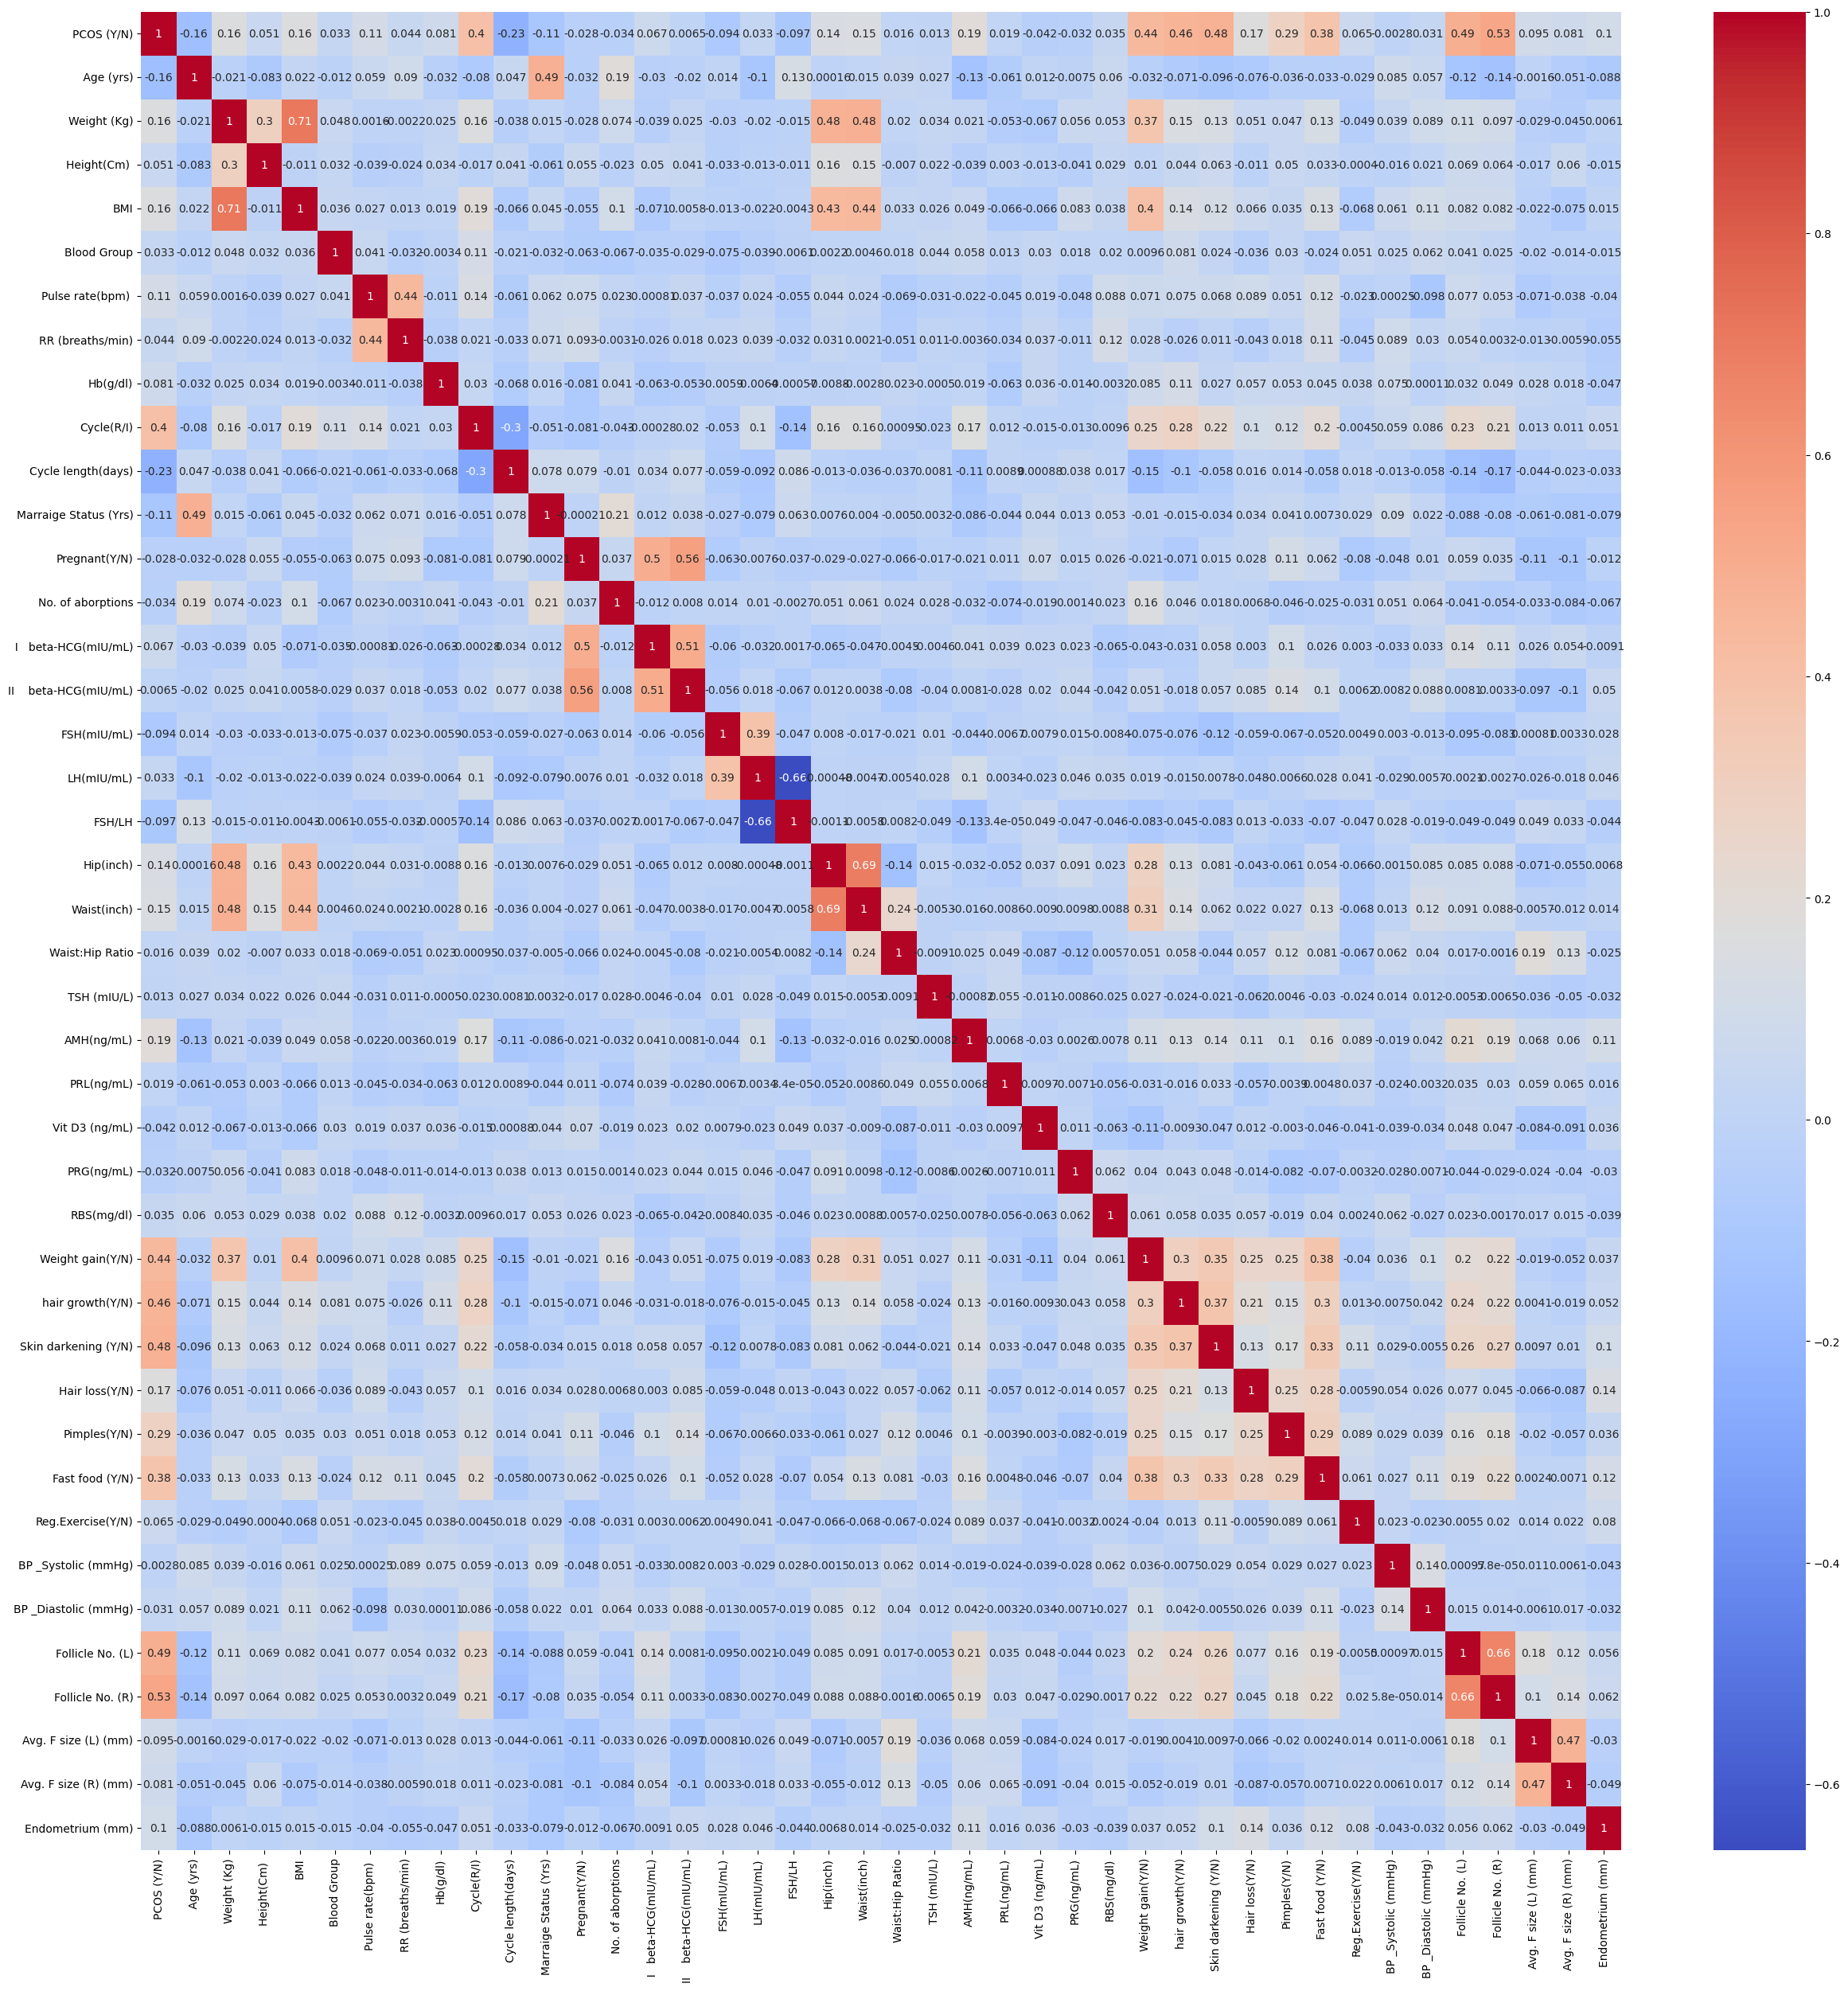

In [13]:
corr= data.corr(method ='kendall')
plt.figure(figsize=(30,30))
sns.heatmap(corr, cmap='coolwarm', annot = True)
plt.show()

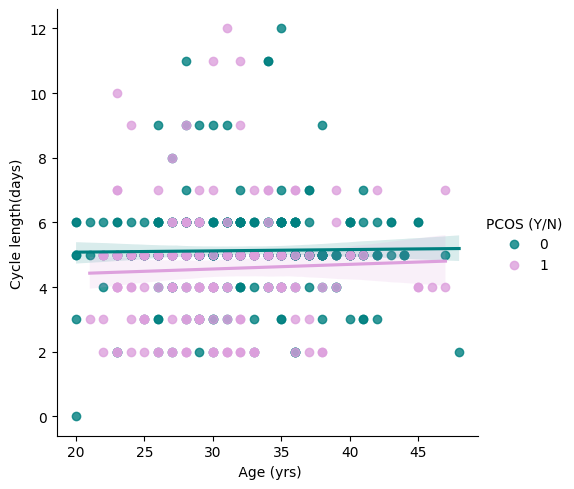

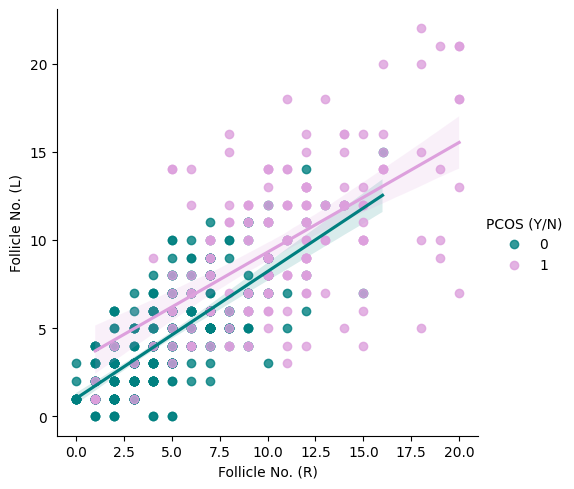

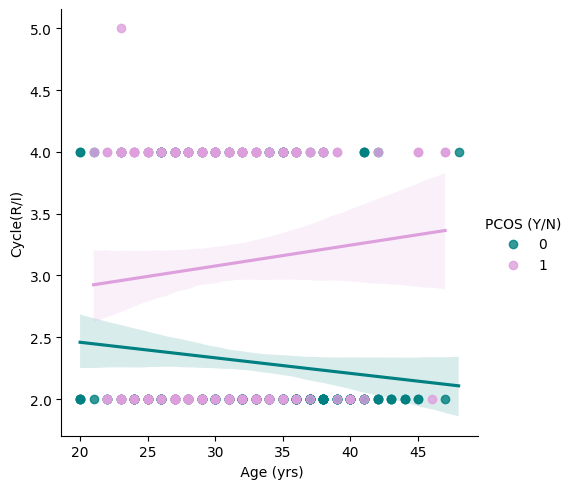

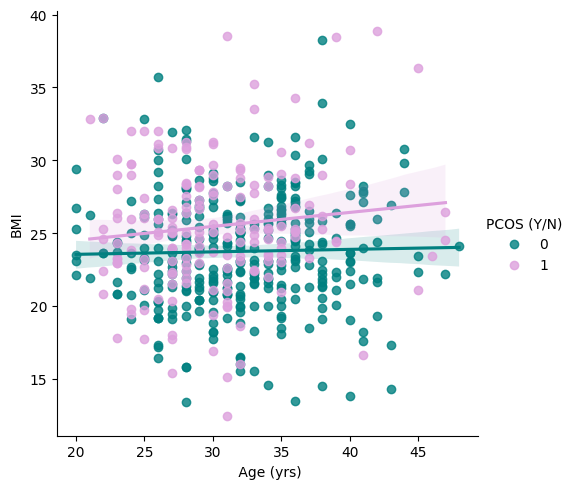

In [14]:
color = ["teal", "plum"]
fig=sns.lmplot(data=data,x=" Age (yrs)",y="Cycle length(days)", hue="PCOS (Y/N)",palette=color)
plt.show(fig)
sns.lmplot(data =data,x='Follicle No. (R)',y='Follicle No. (L)', hue="PCOS (Y/N)",palette=color)
plt.show()
sns.lmplot(data =data,x=" Age (yrs)",y="Cycle(R/I)", hue="PCOS (Y/N)",palette=color)
plt.show()
fig= sns.lmplot(data =data,x=" Age (yrs)",y="BMI", hue="PCOS (Y/N)", palette= color )
plt.show(fig)

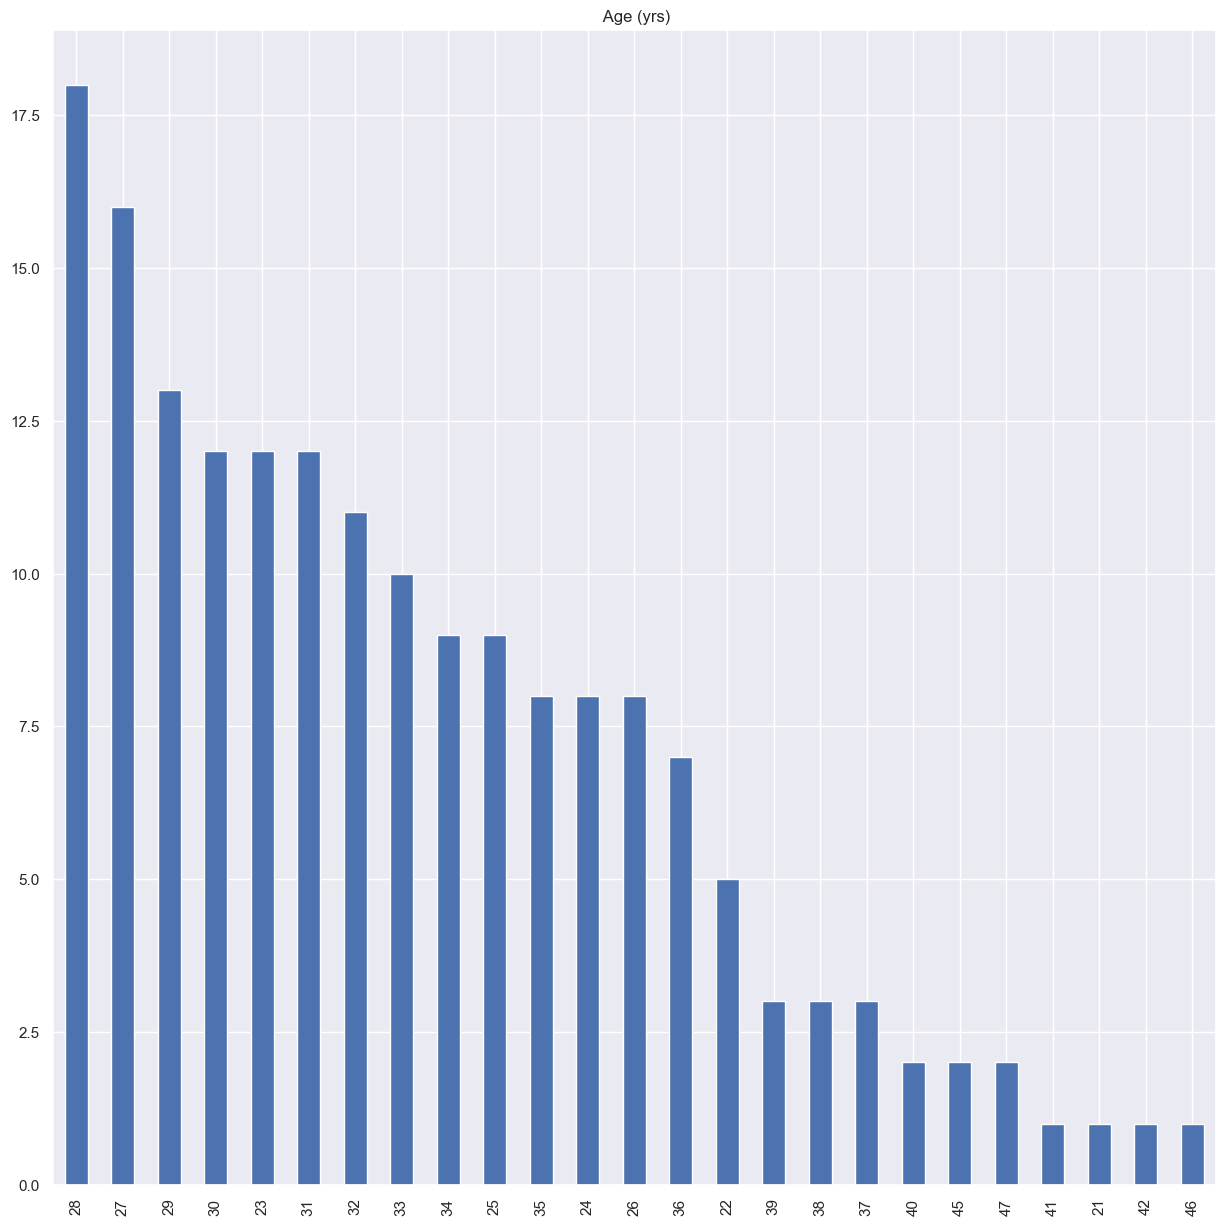

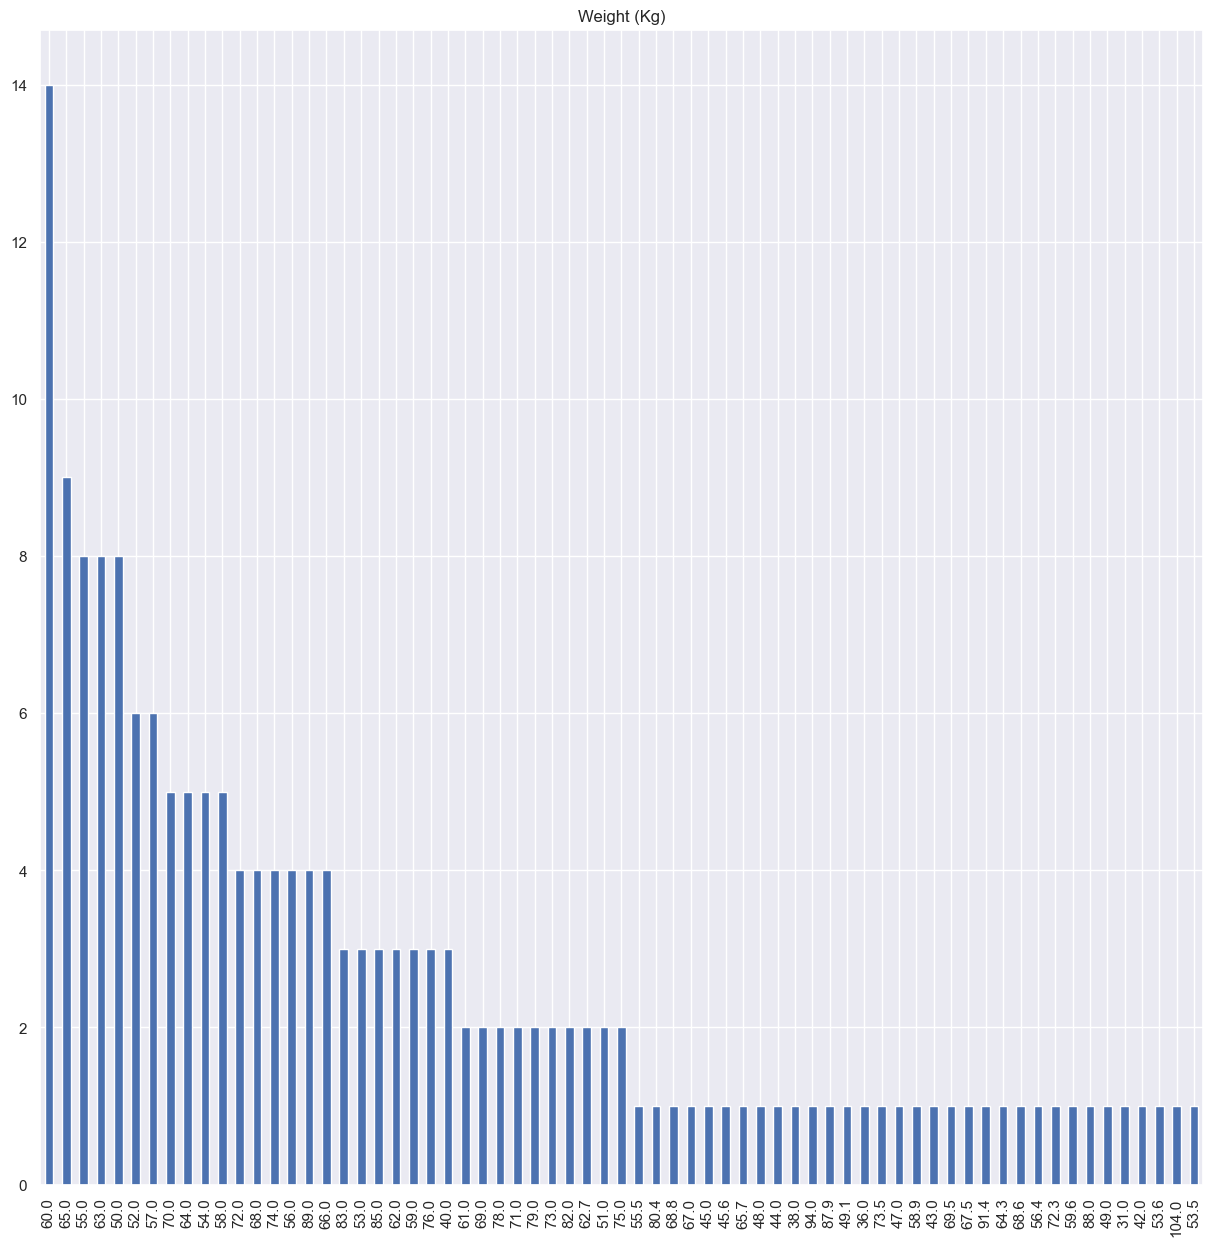

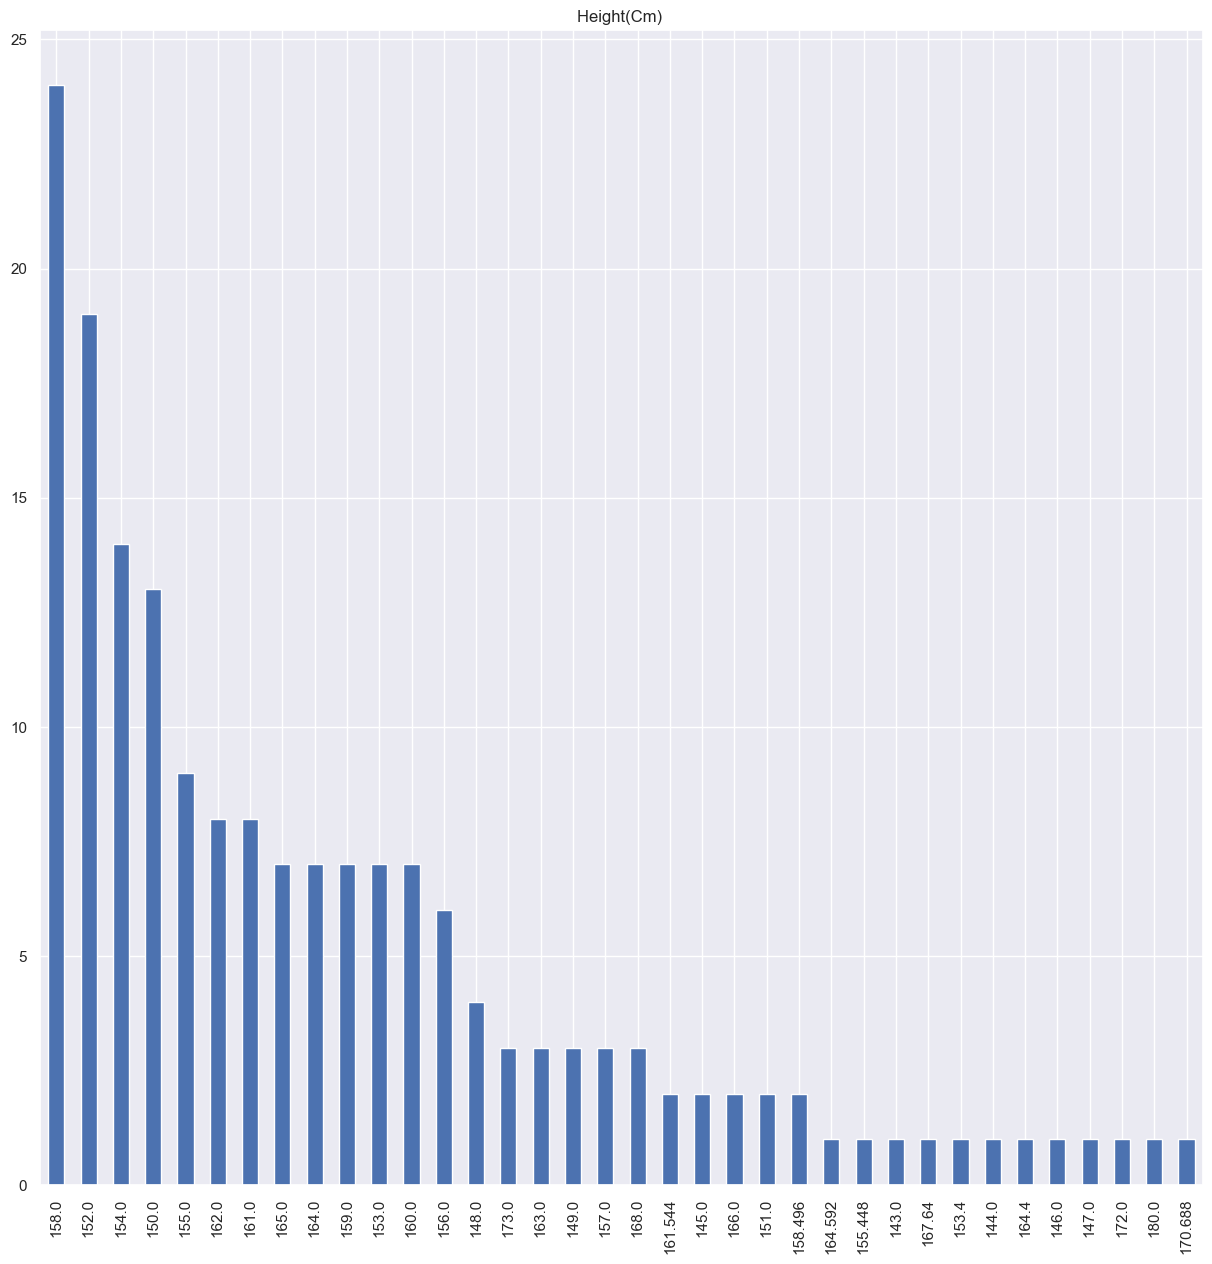

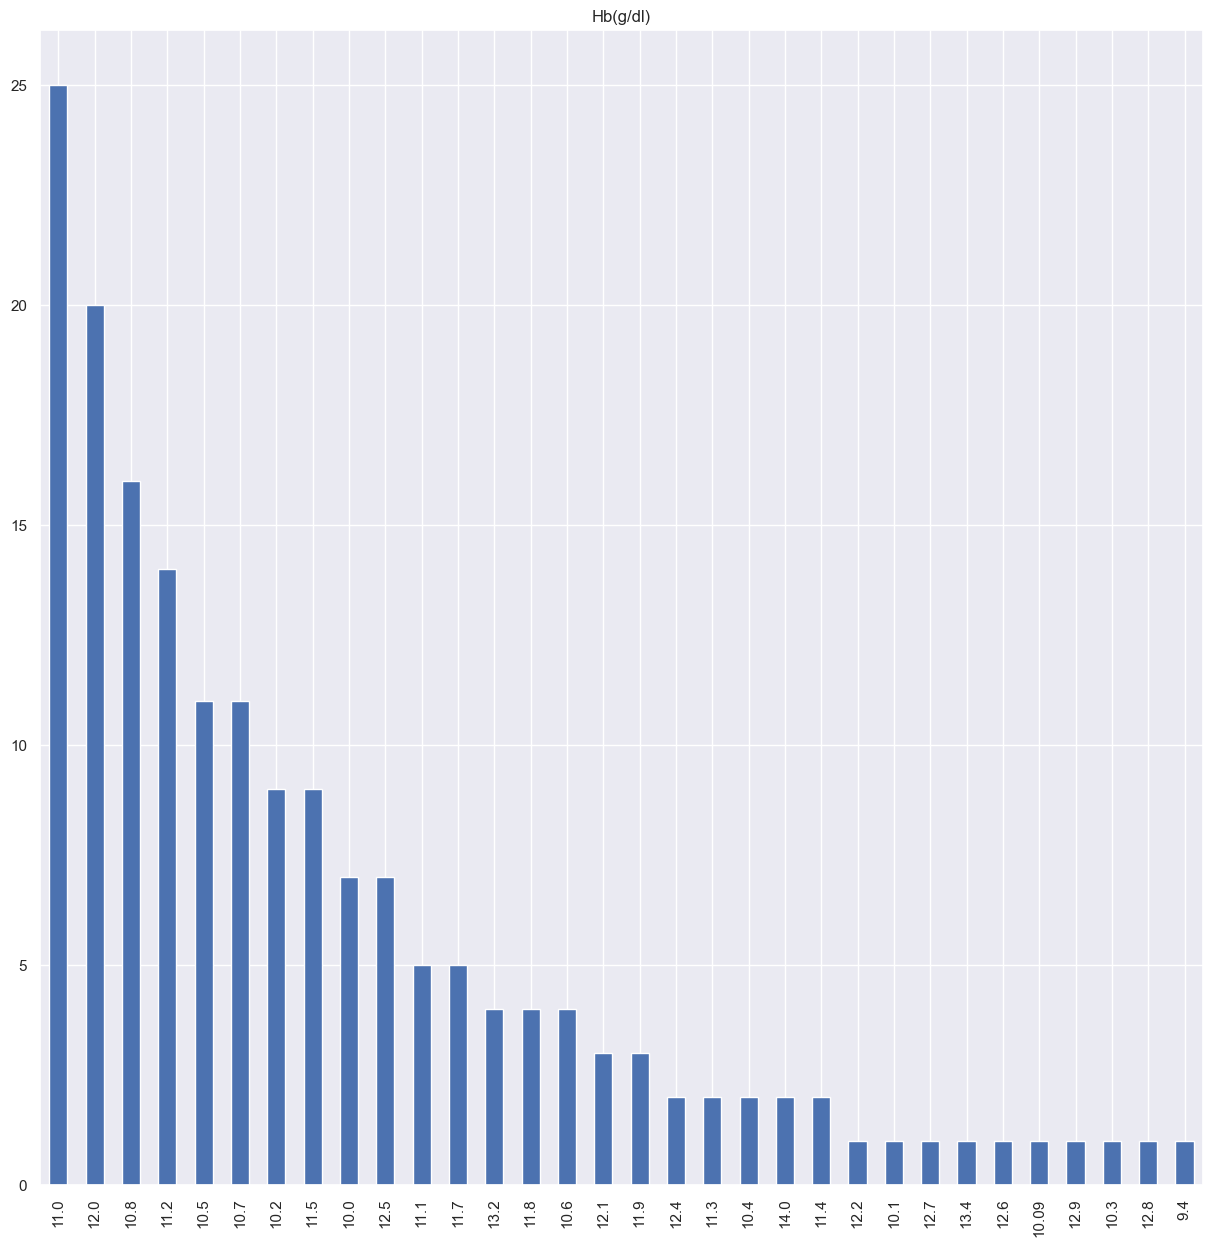

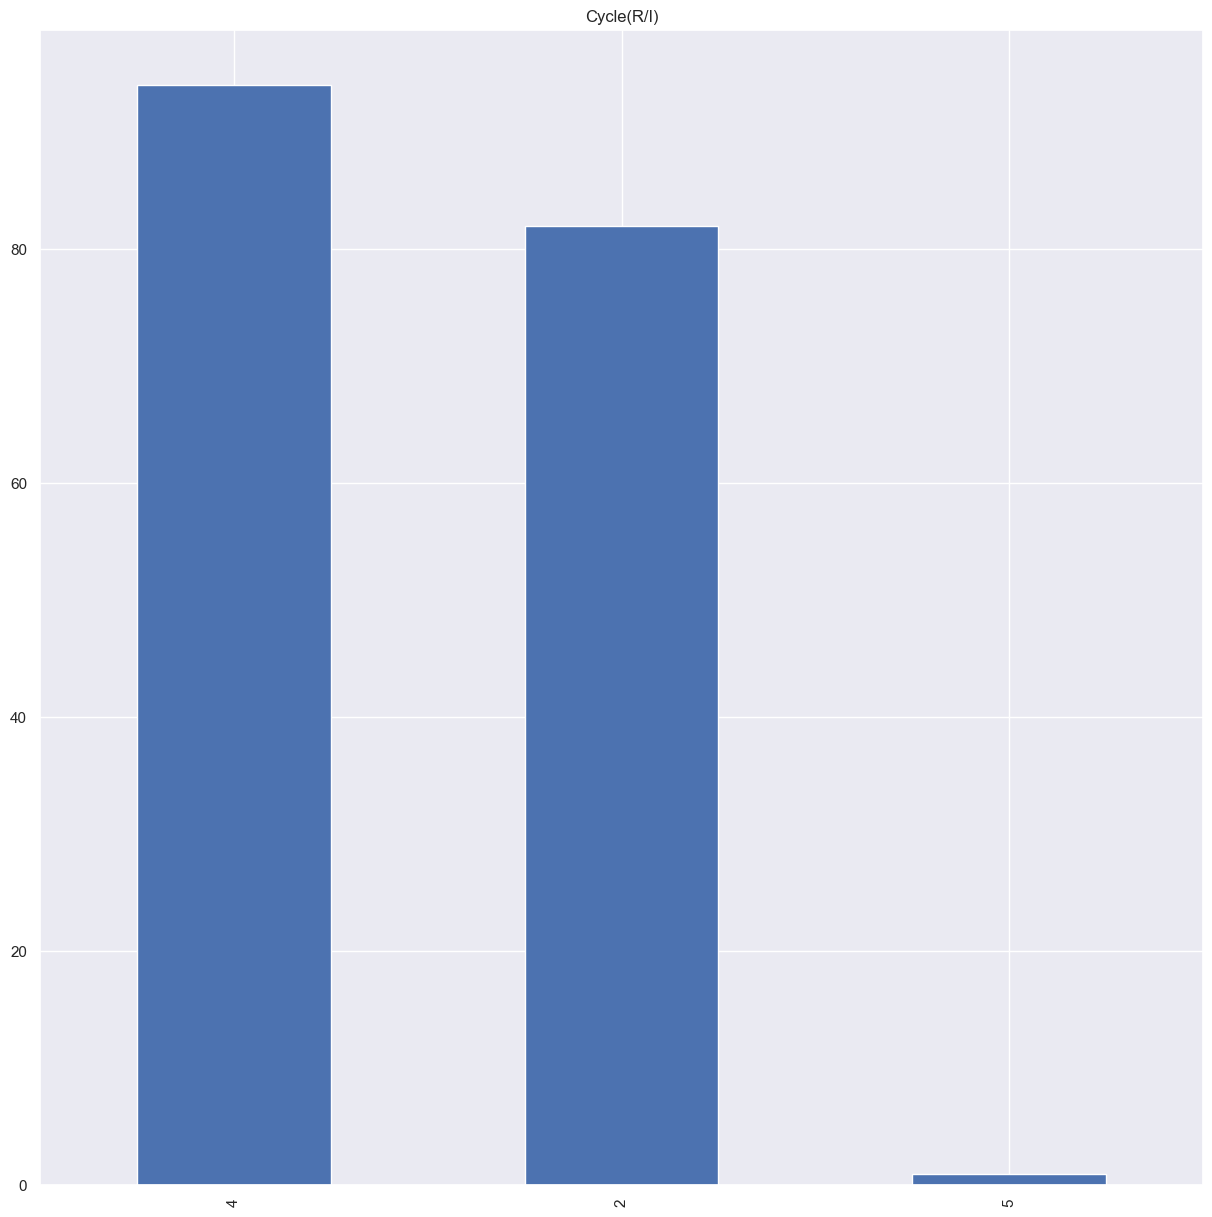

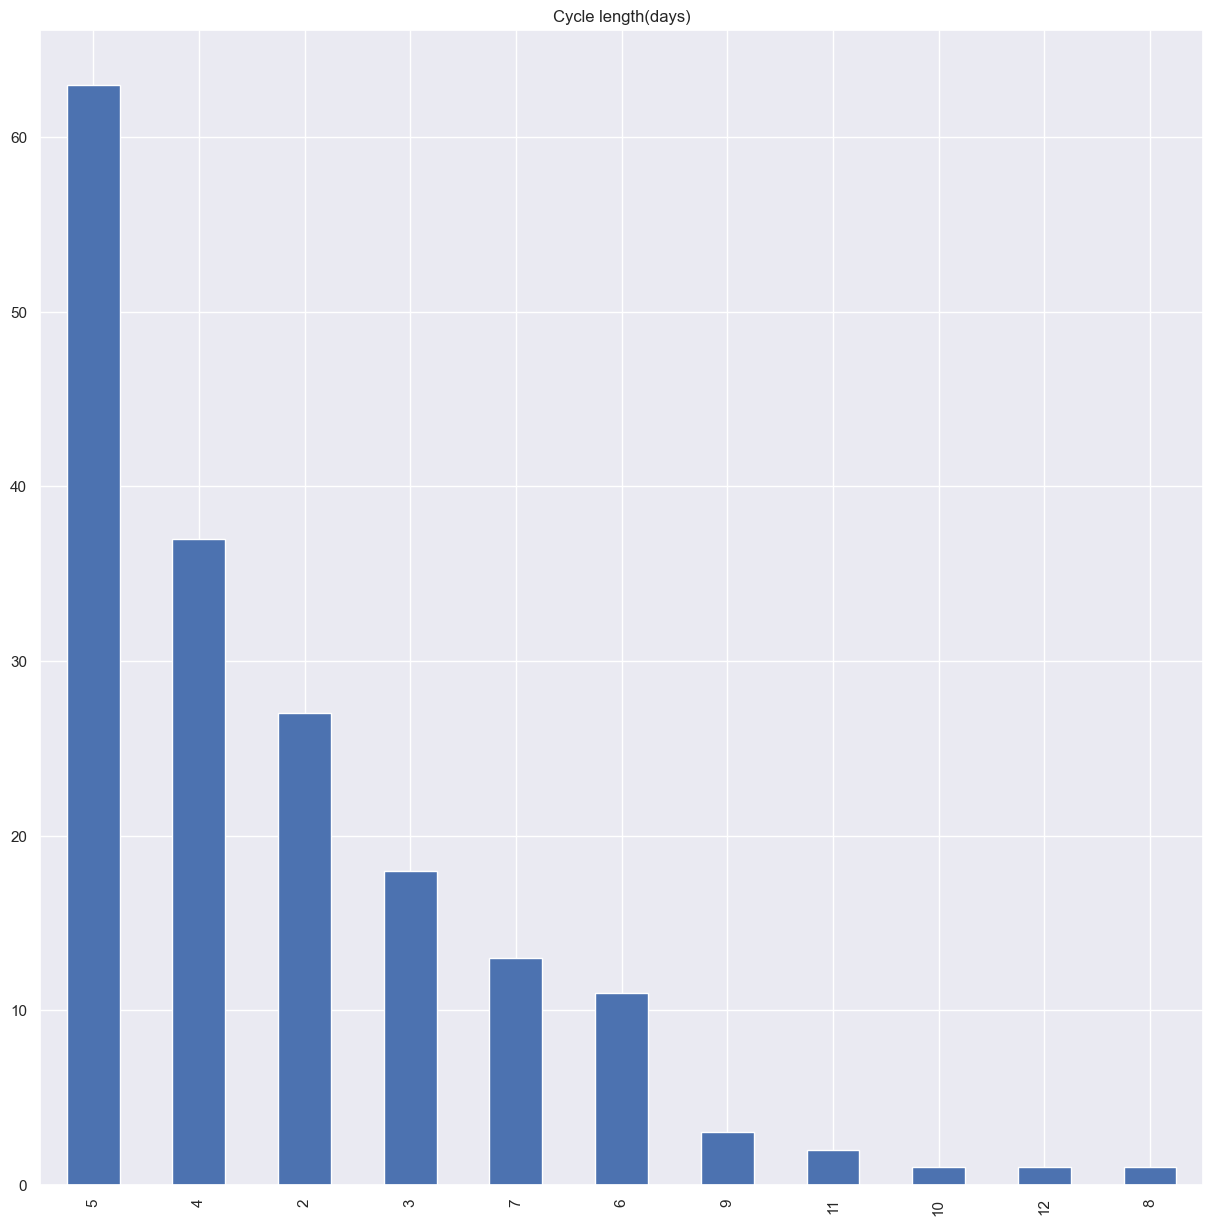

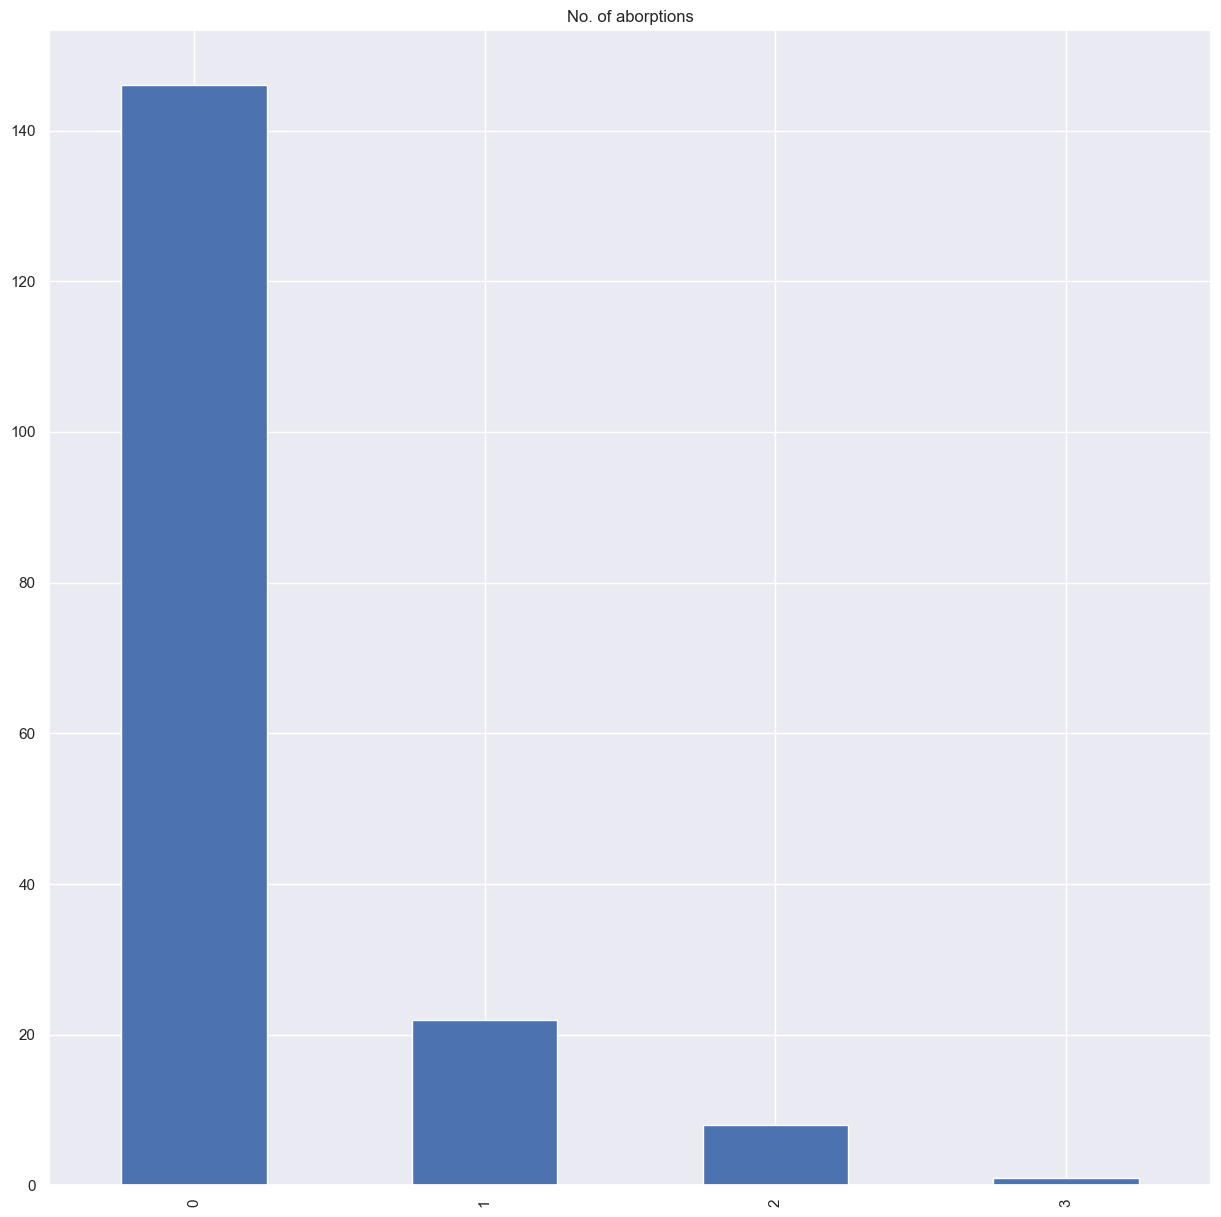

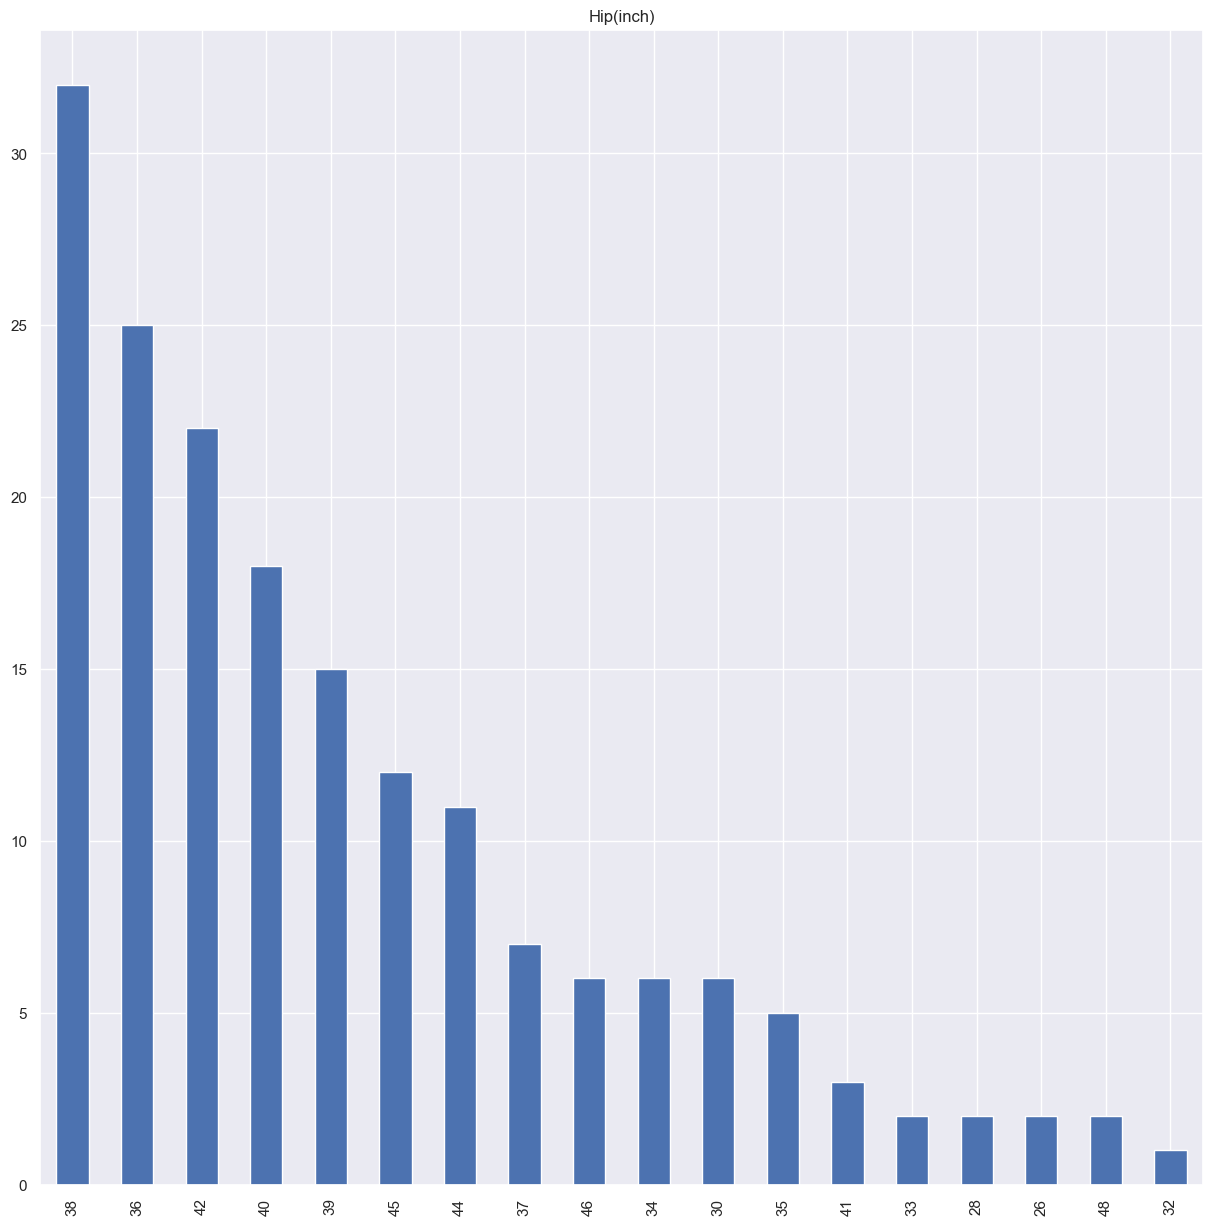

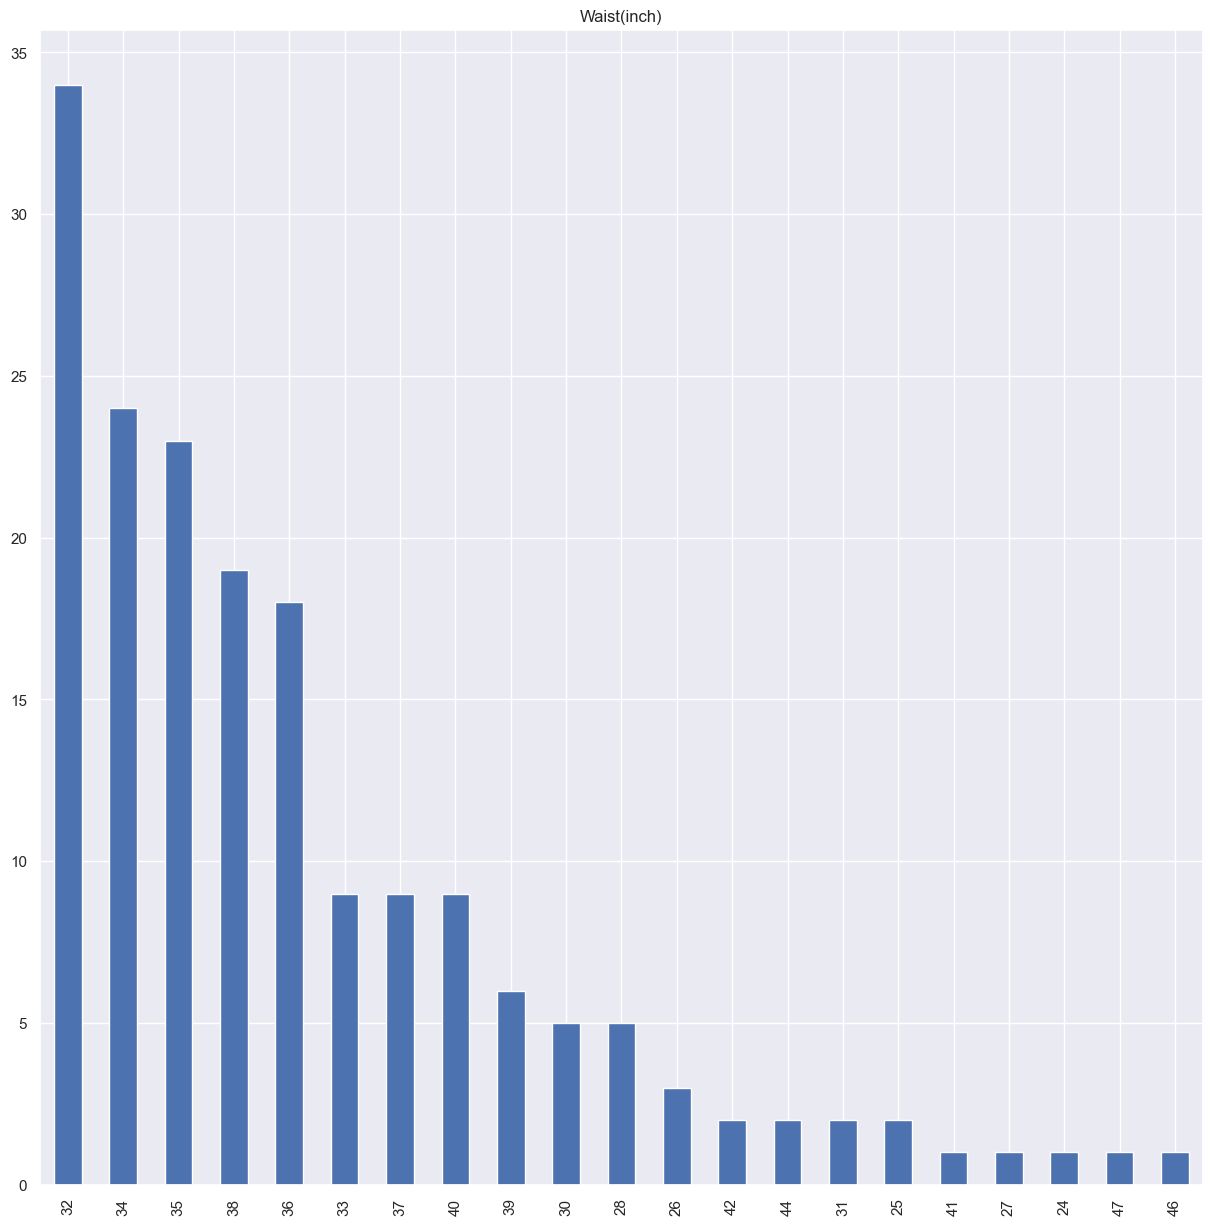

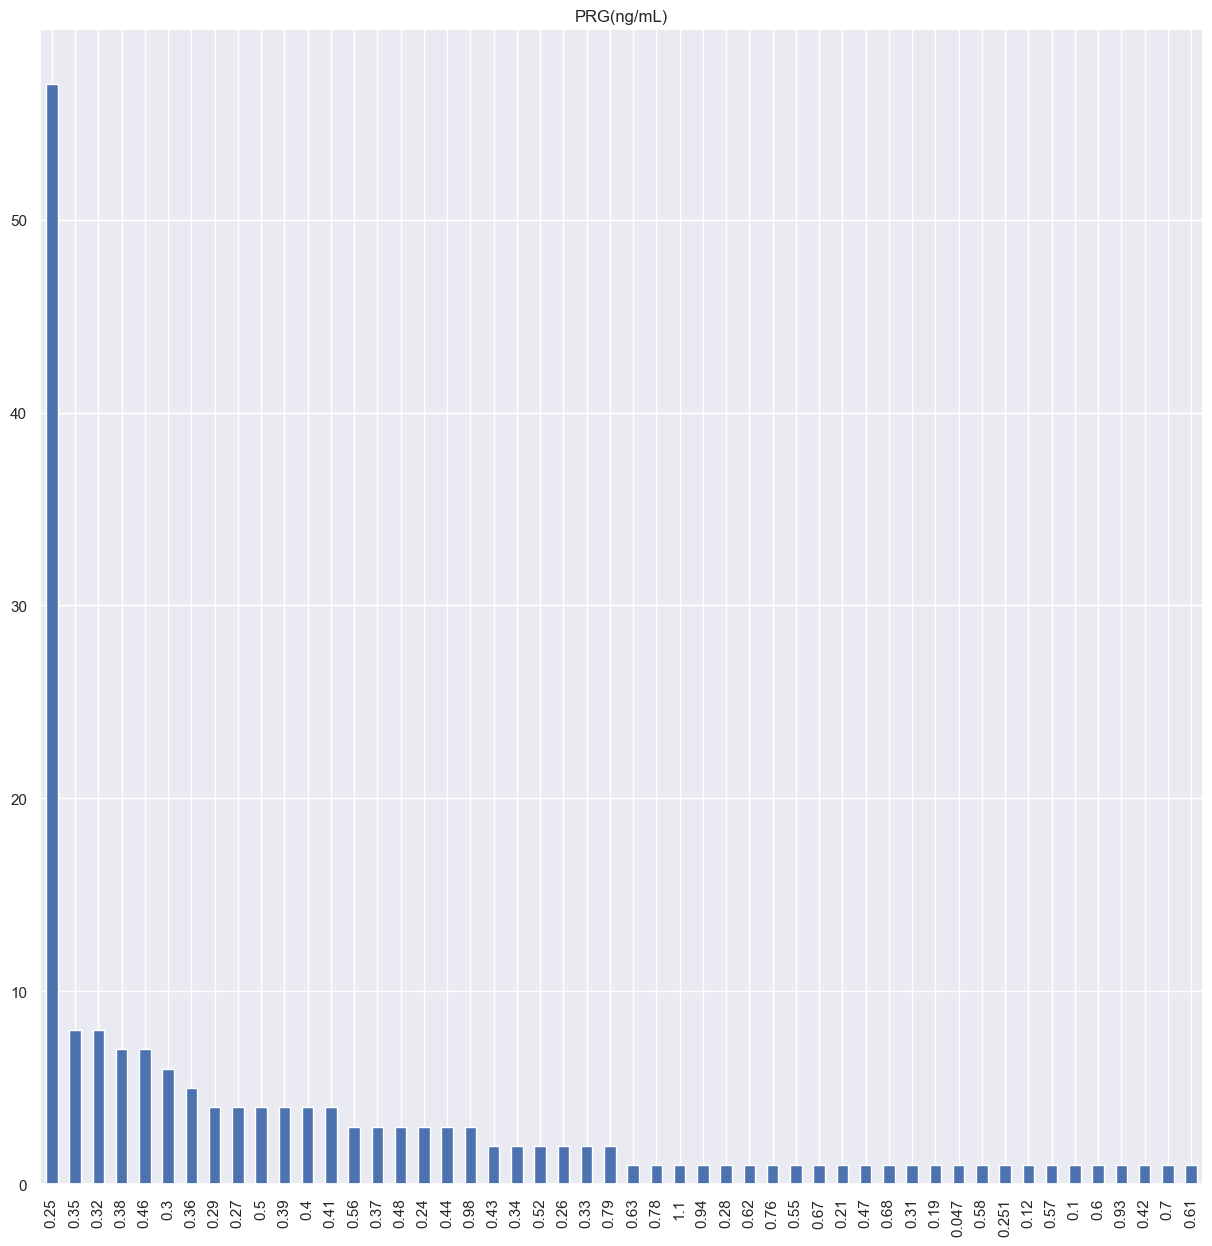

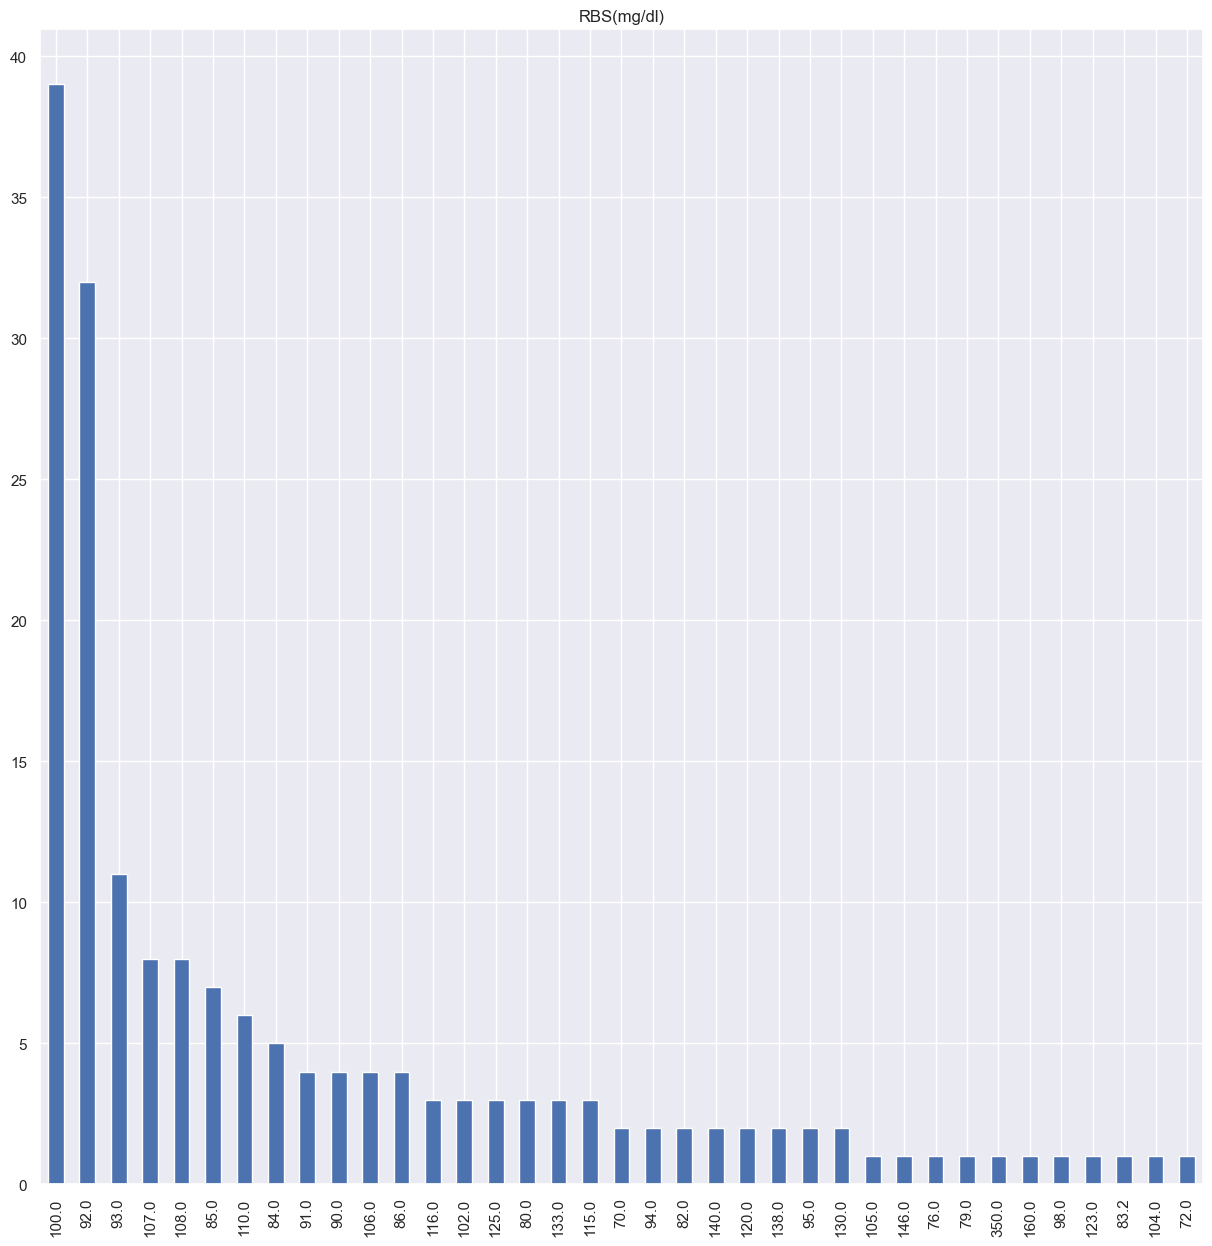

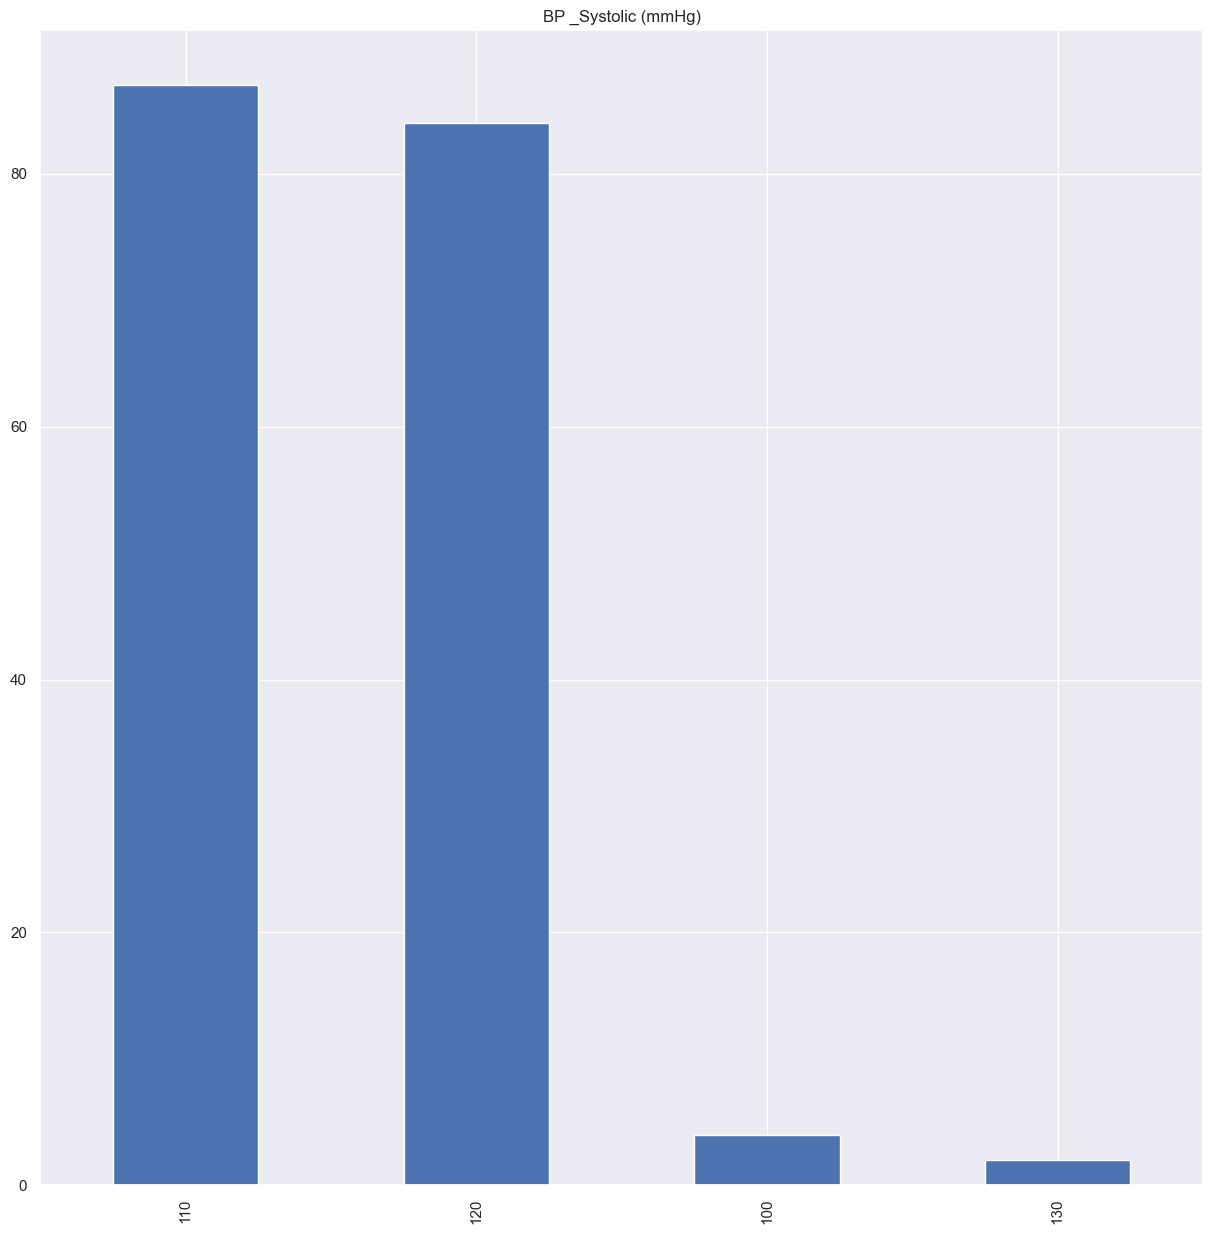

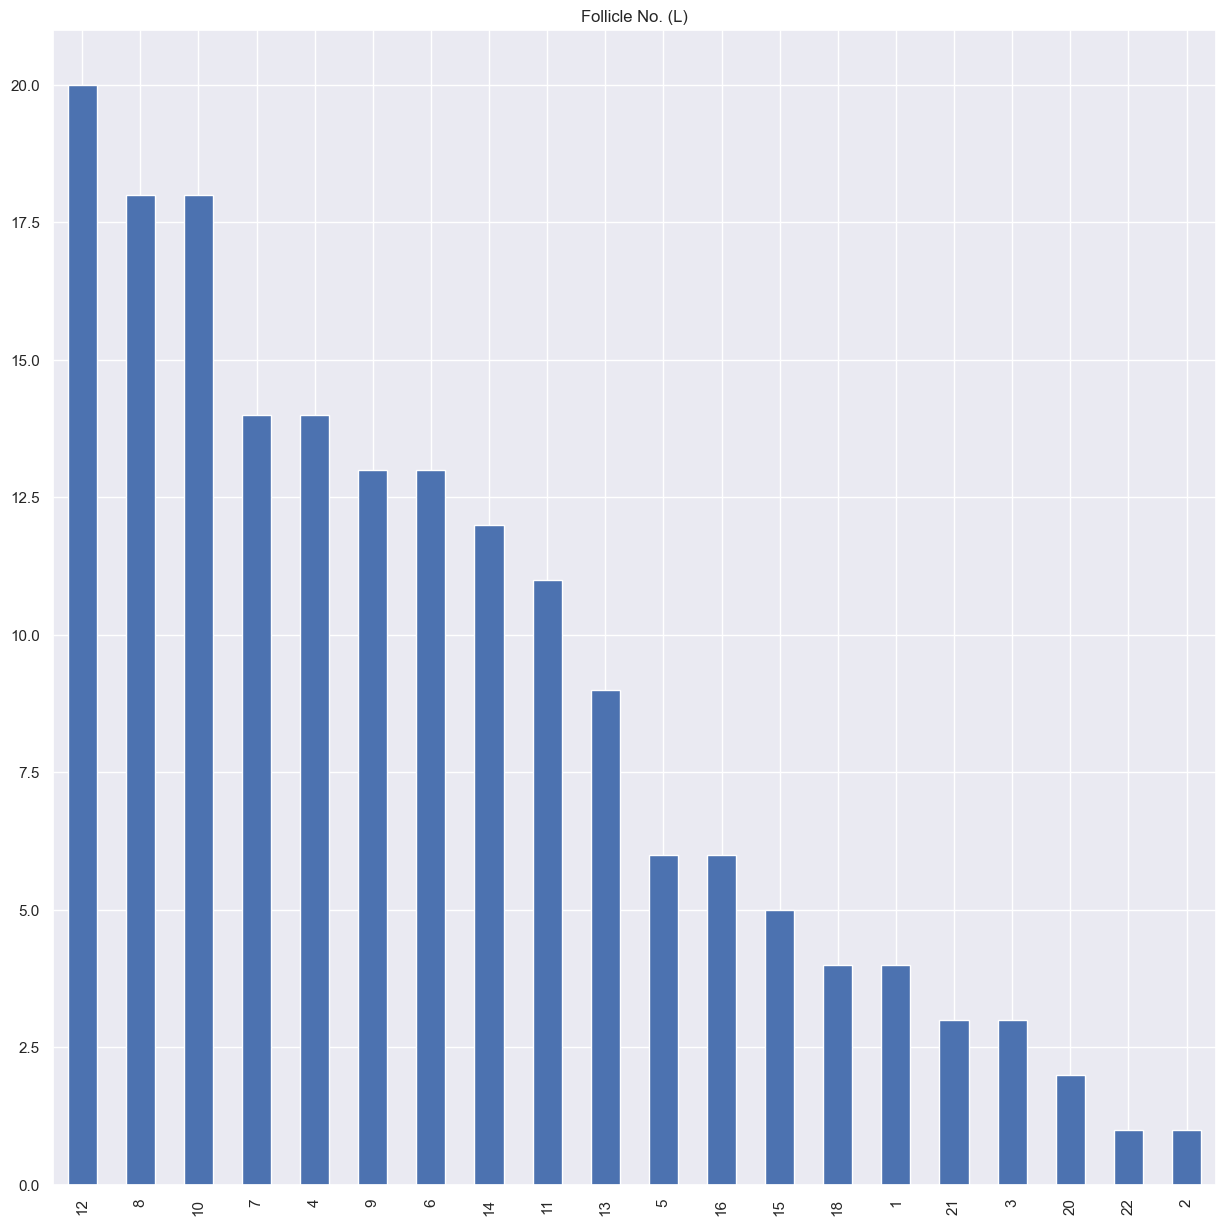

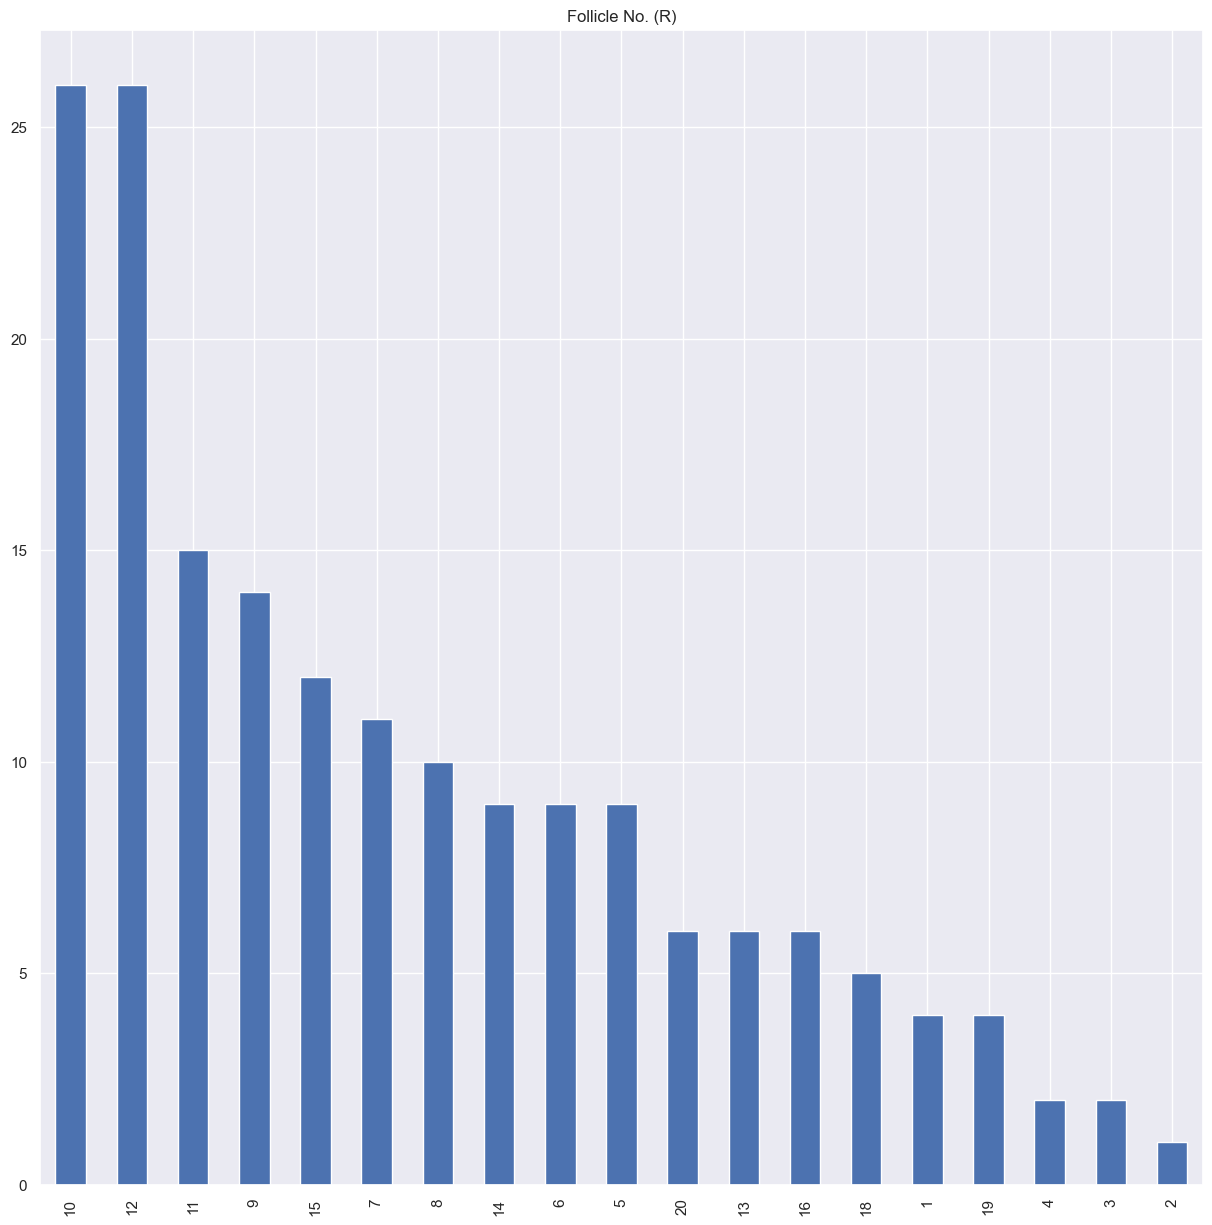

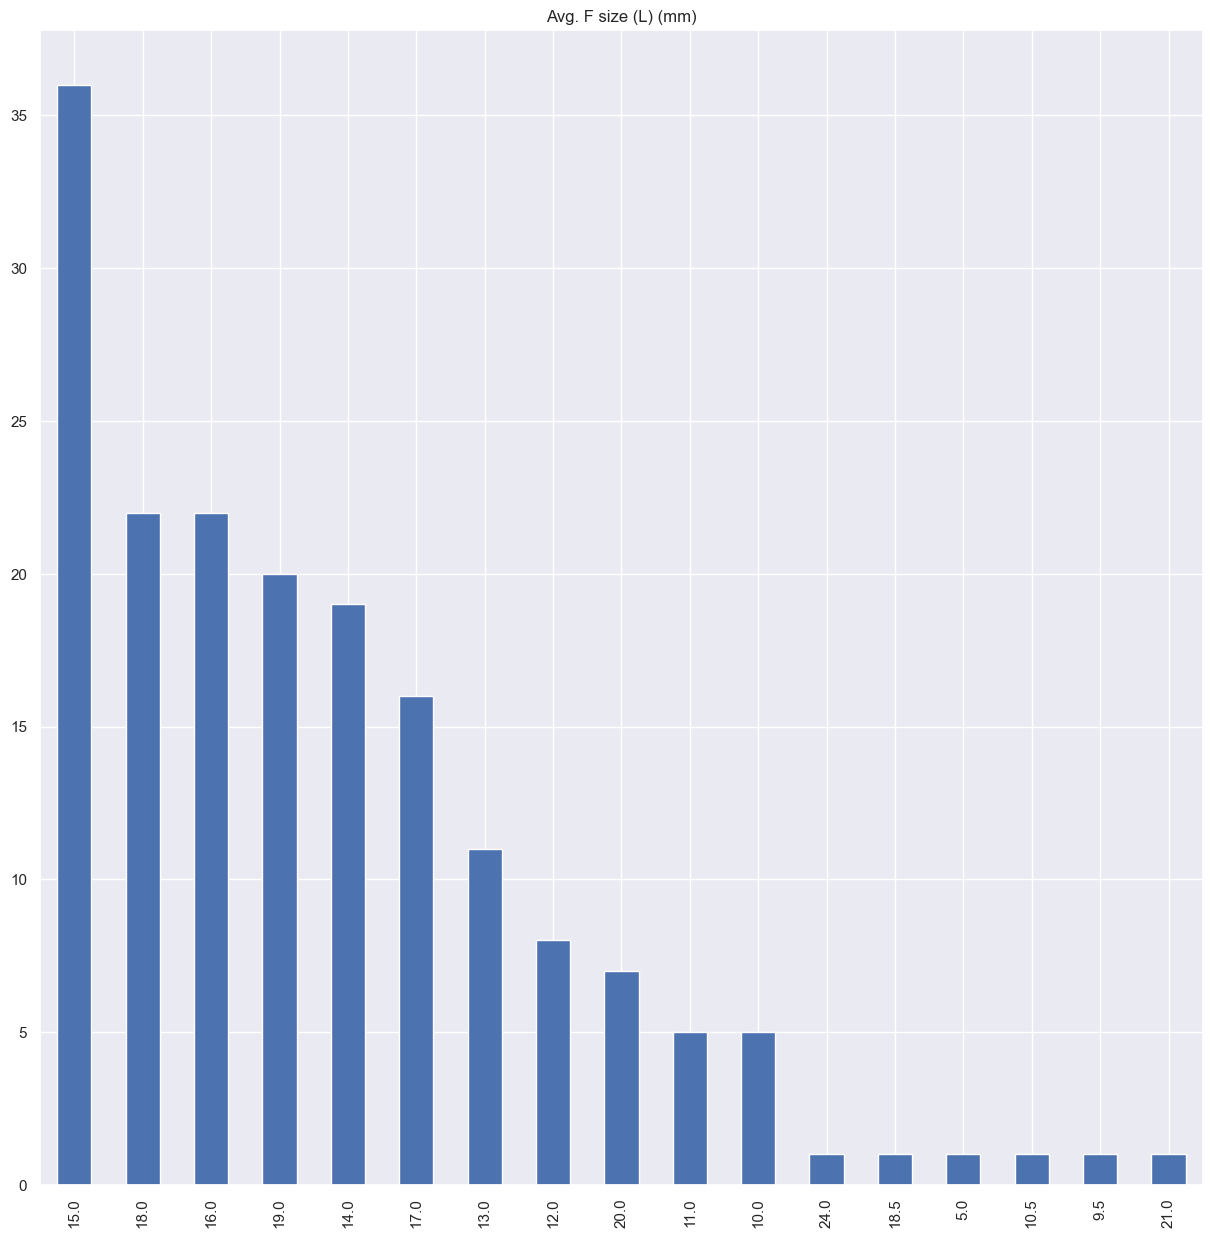

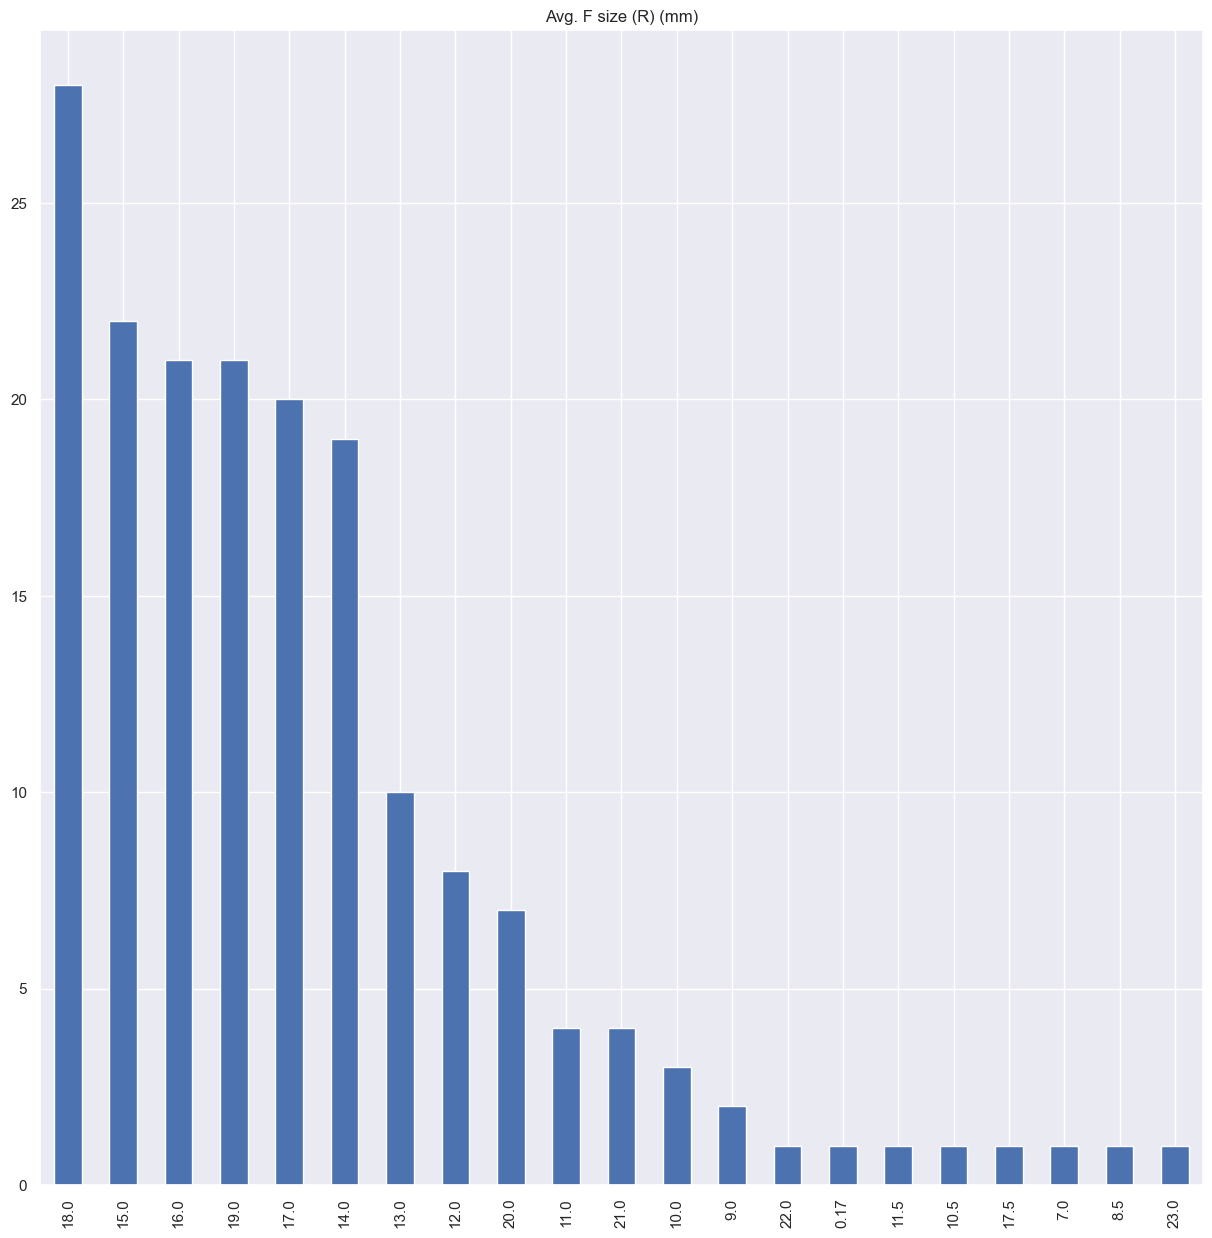

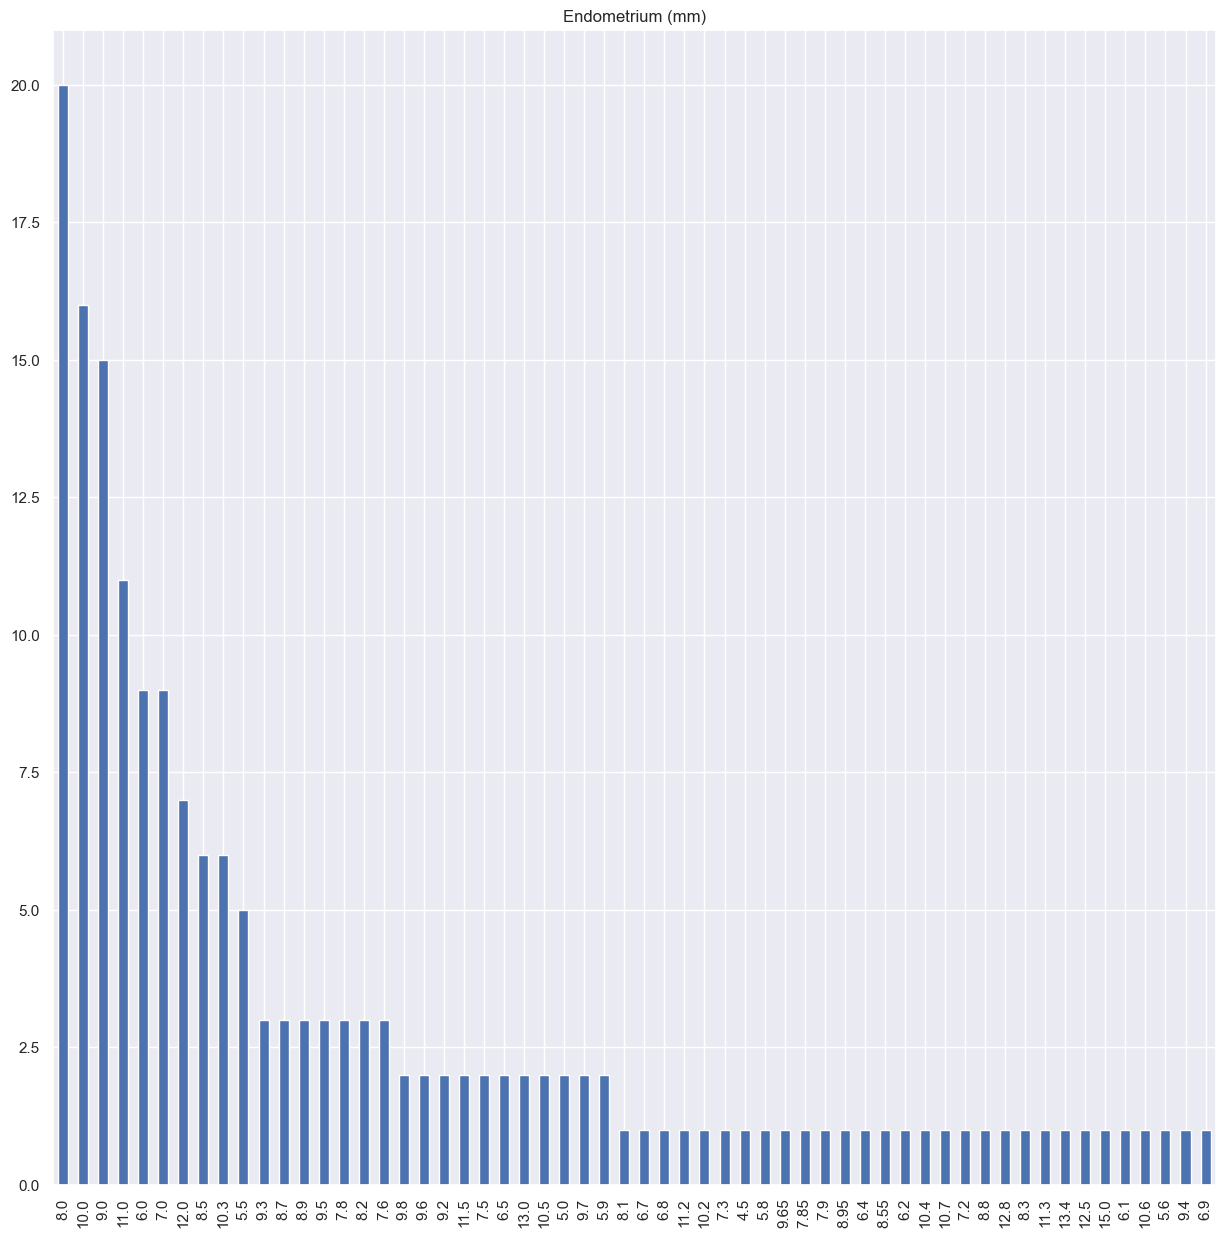

In [15]:
#now that that's done, let us try to get a little more intimate with the data
import matplotlib.pyplot as plt #for plotting simple graphs
import seaborn as sns #another plotting library
for i in [' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)', 'No. of aborptions',
        'Hip(inch)', 'Waist(inch)', 
       'PRG(ng/mL)', 'RBS(mg/dl)', 'BP _Systolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']:
  sns.set(rc = {'figure.figsize':(15,15)})
  data[data['PCOS (Y/N)'] == 1][i].value_counts().plot.bar()
  plt.title(i)
  plt.show()

In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
#Creating subplot of each column with its own scale
red_circle = dict(markerfacecolor='red', marker='o')

In [17]:
import pandas as pd
import numpy as np
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.boxplot(data=data)

plt.rcParams["figure.dpi"] = 300
plt.xlabel("Subjects", size=12)
plt.ylabel("Test Scores", size=12)
plt.show()

ModuleNotFoundError: No module named 'plotly'

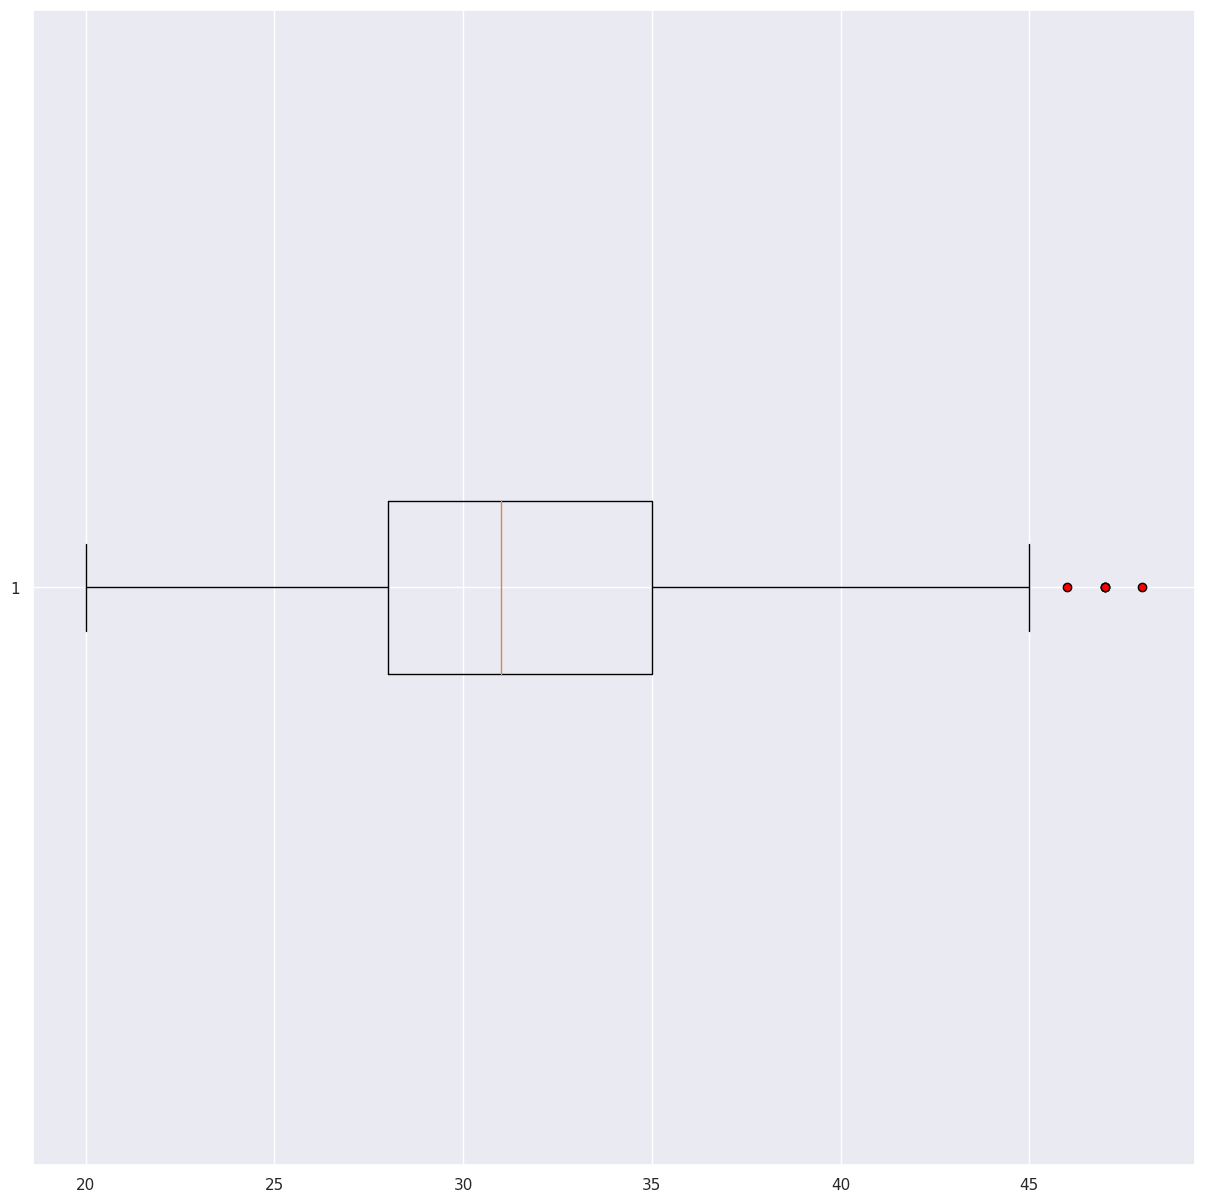

In [15]:
plt.boxplot(x=data[' Age (yrs)'], vert=False, flierprops=red_circle);

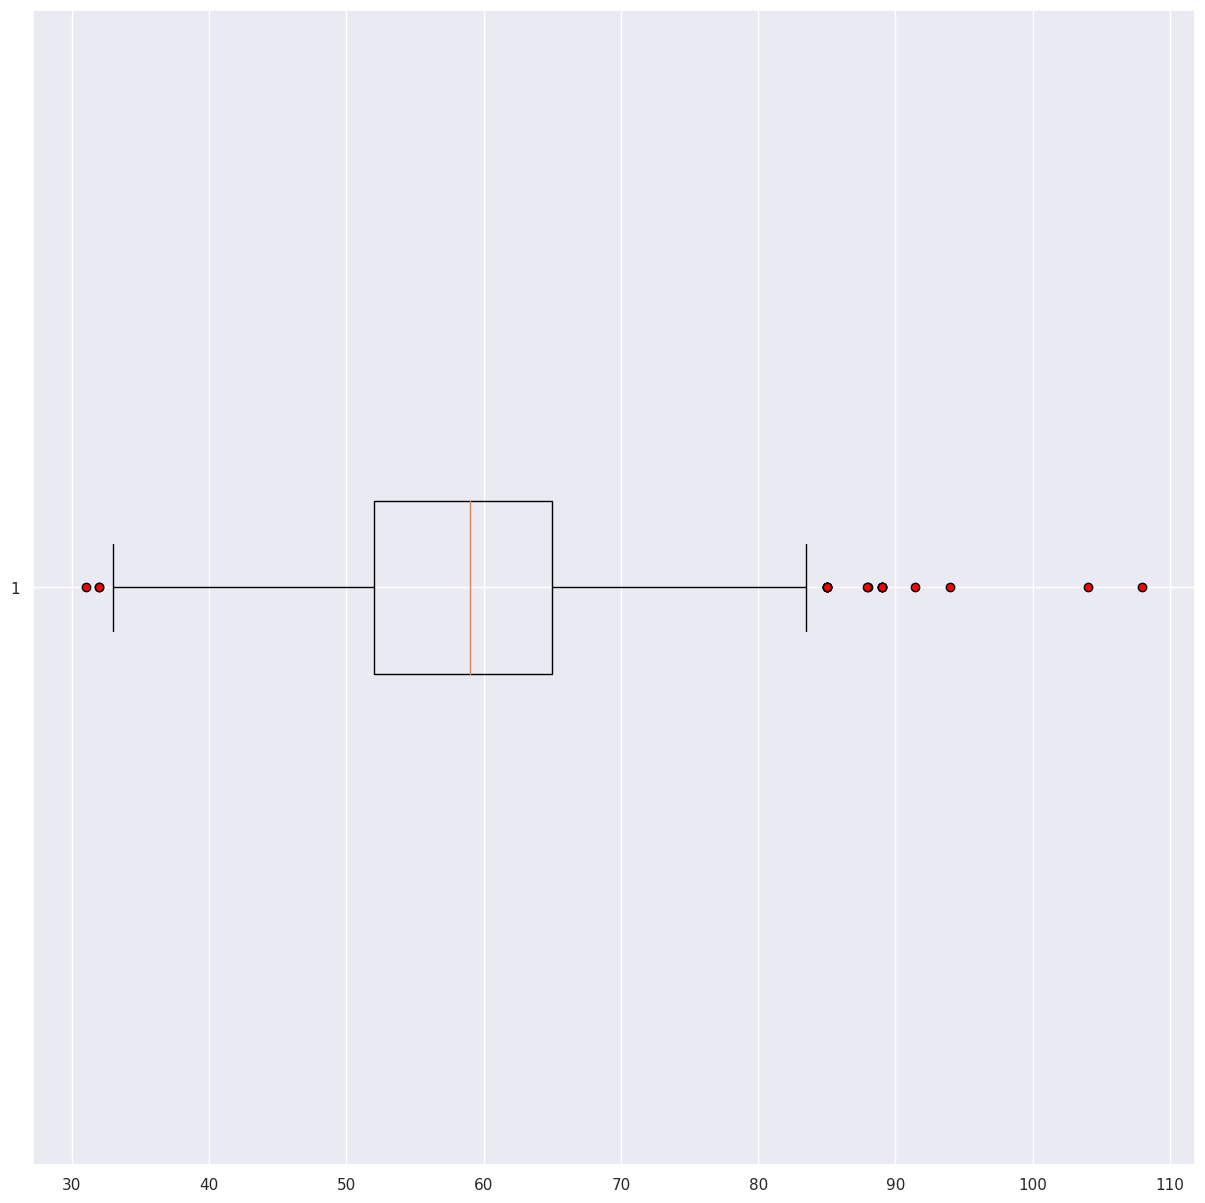

In [16]:
plt.boxplot(x=data['Weight (Kg)'], vert=False, flierprops=red_circle);

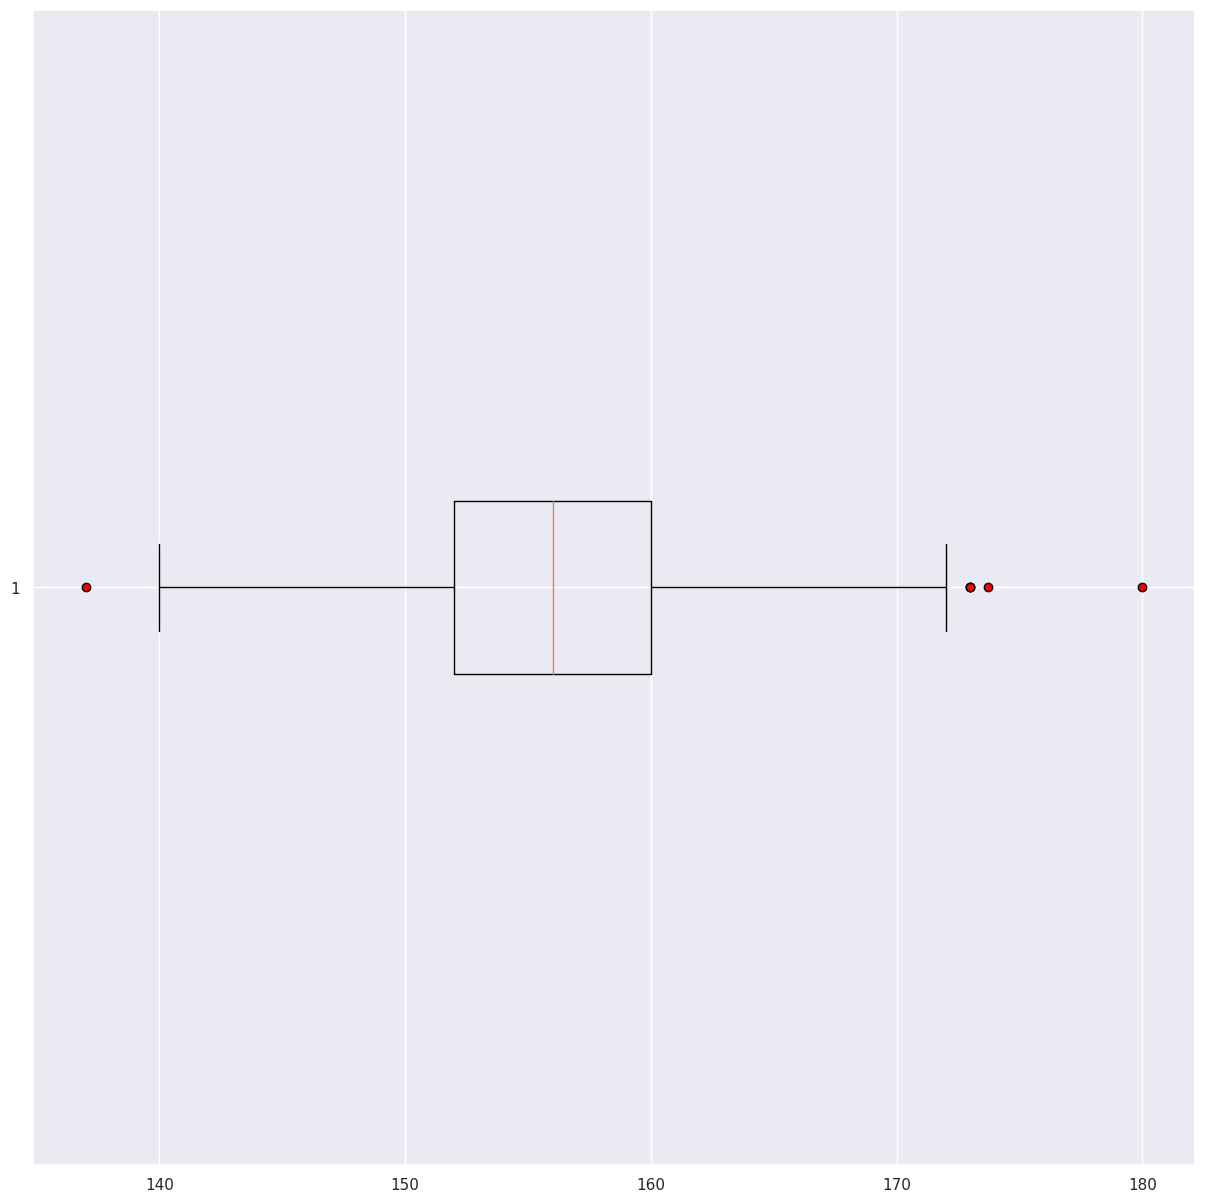

In [17]:
plt.boxplot(x=data['Height(Cm) '], vert=False, flierprops=red_circle);

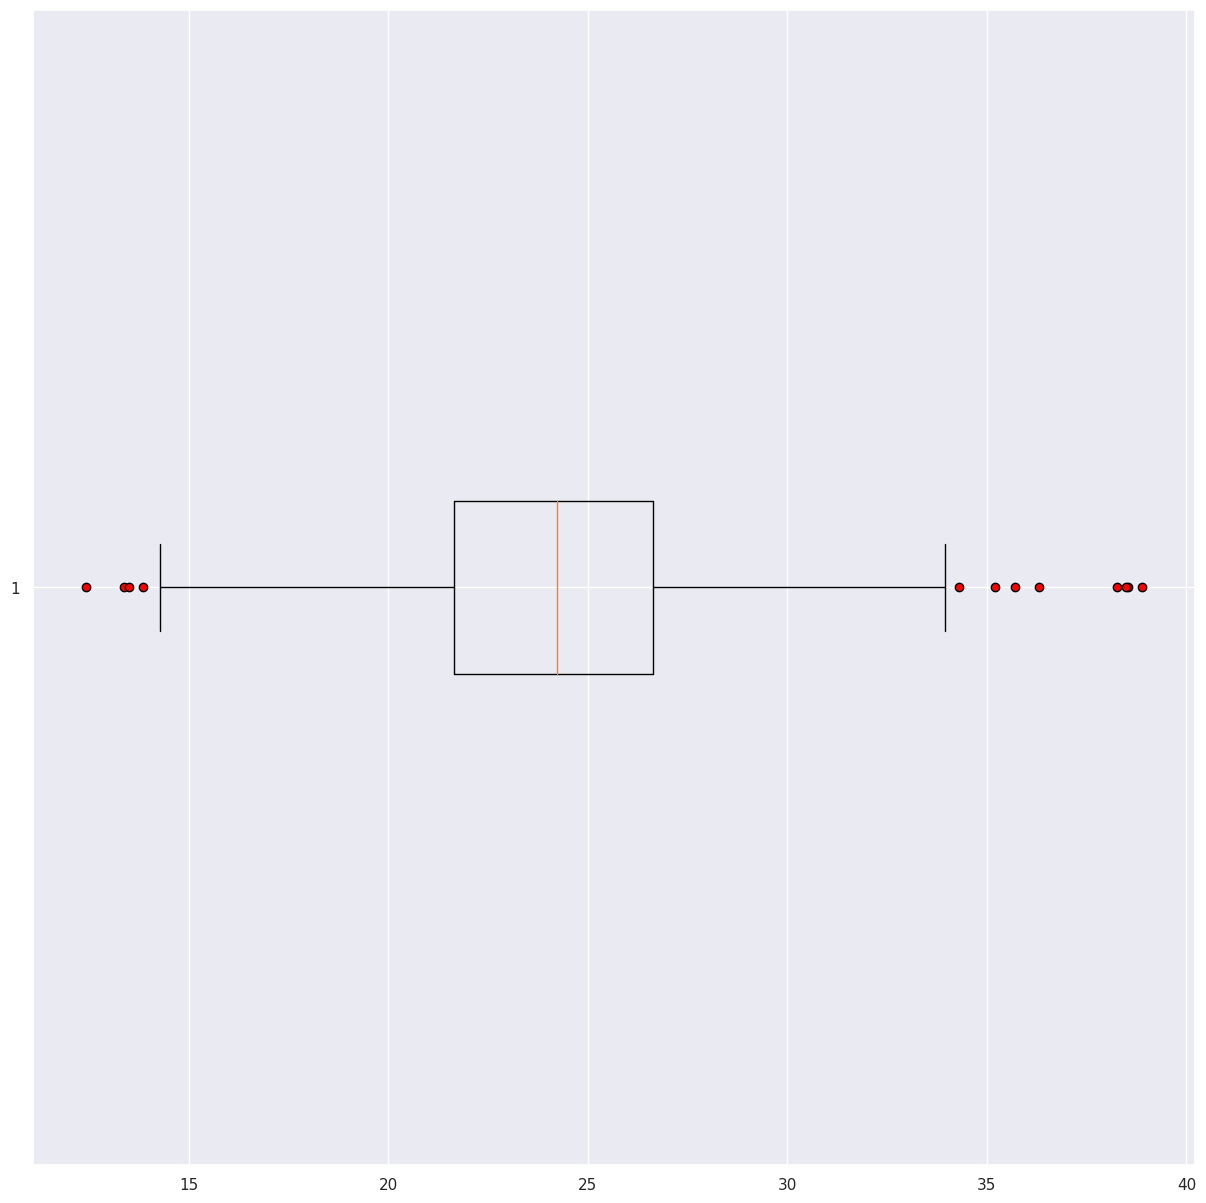

In [18]:
plt.boxplot(x=data['BMI'], vert=False, flierprops=red_circle);

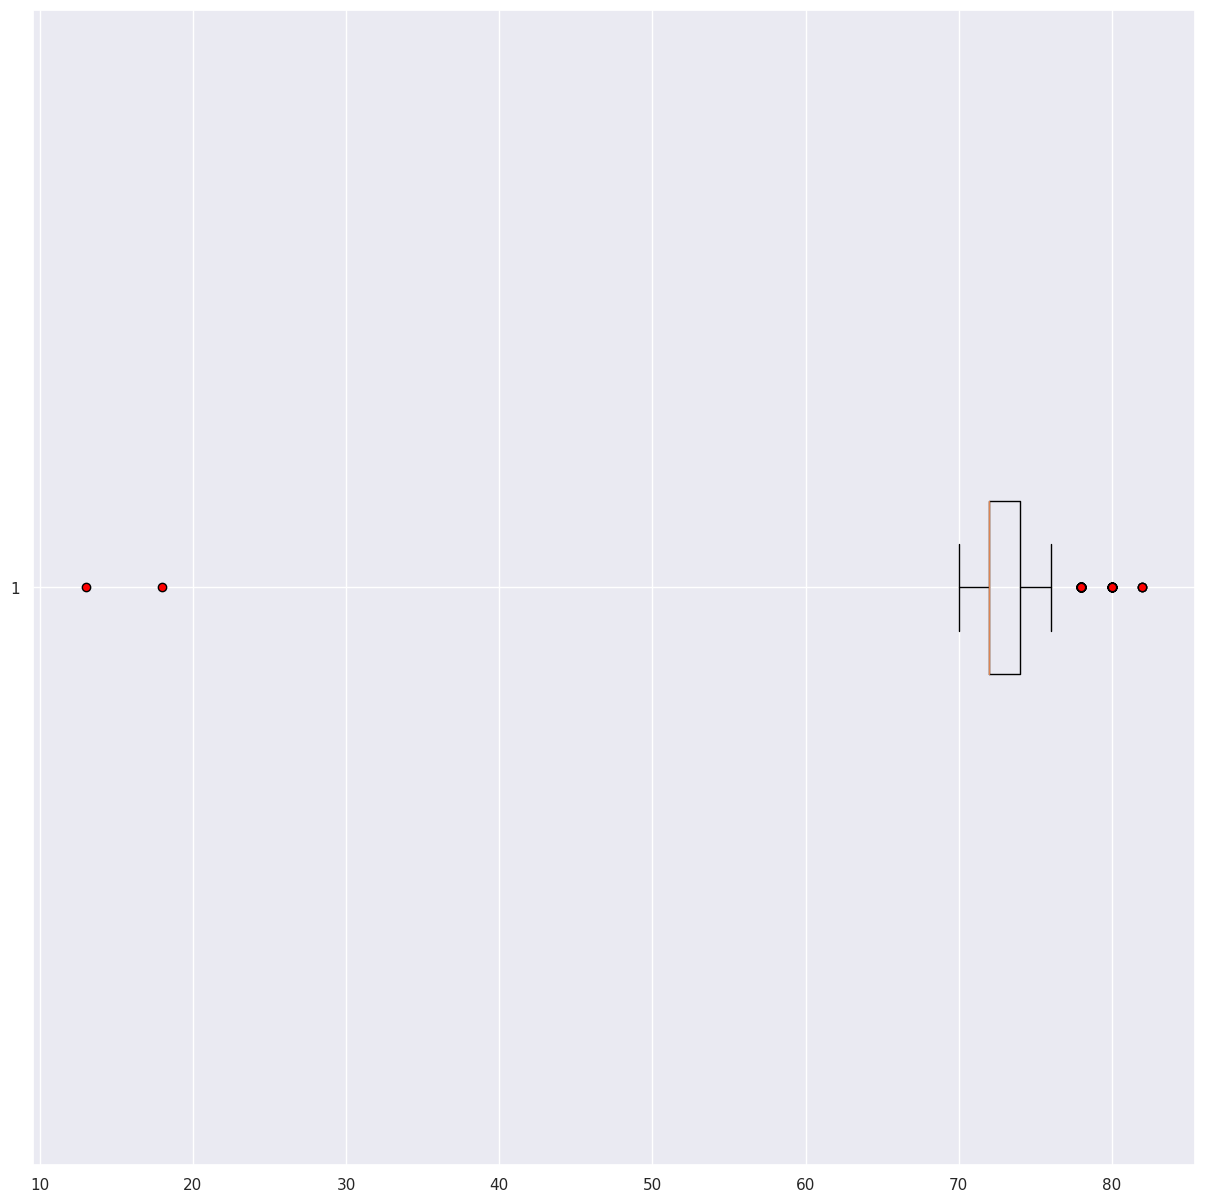

In [19]:
plt.boxplot(x=data['Pulse rate(bpm) '], vert=False, flierprops=red_circle);

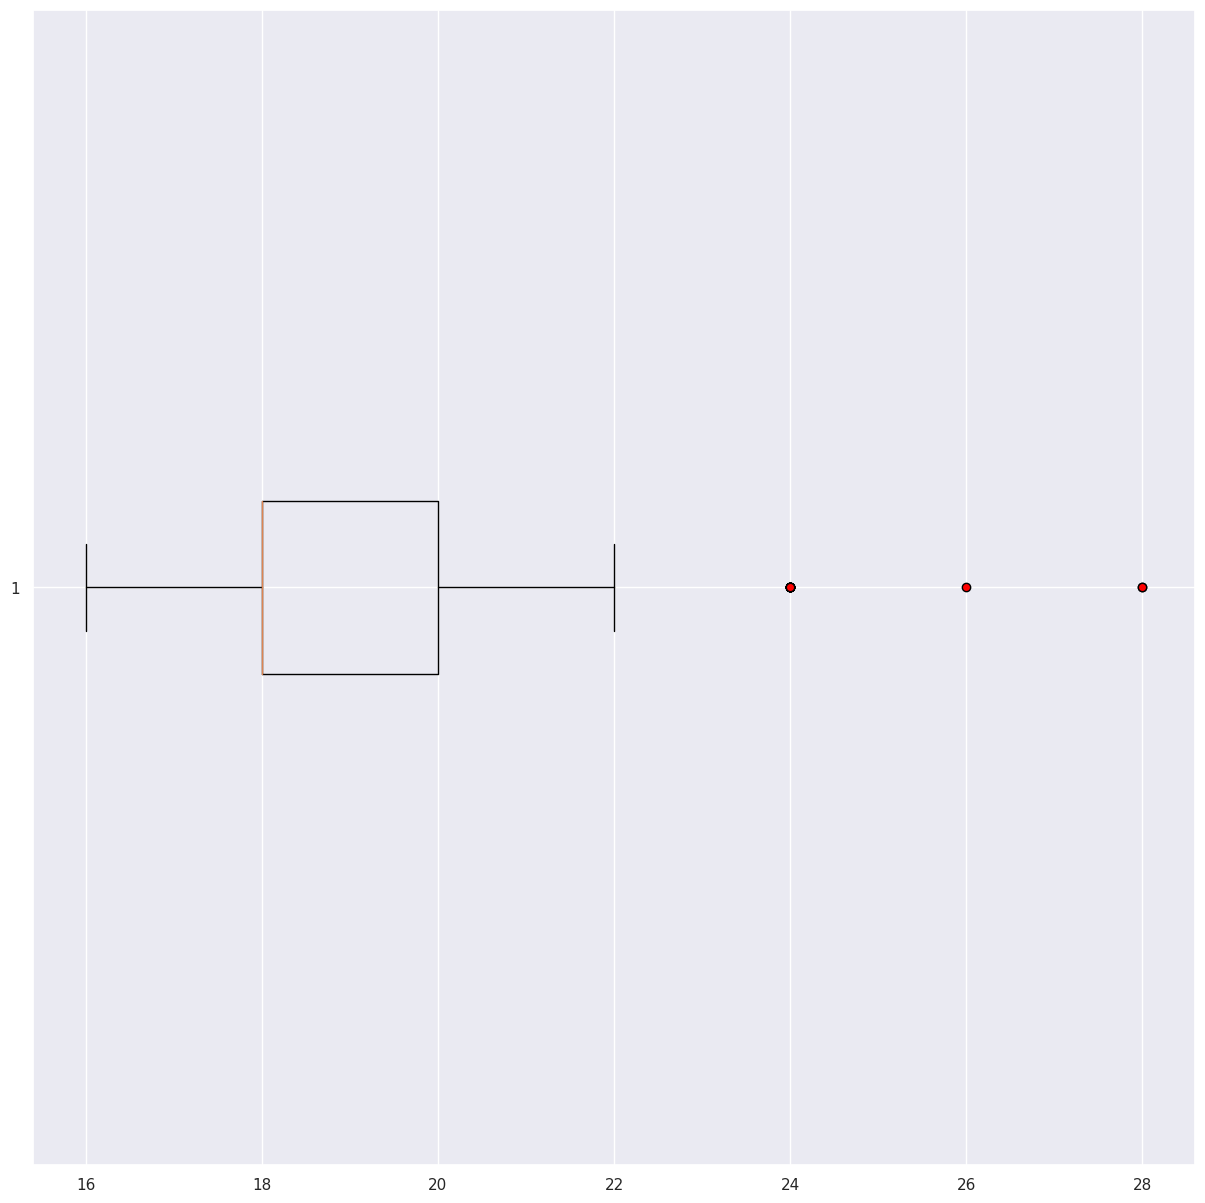

In [20]:
plt.boxplot(x=data['RR (breaths/min)'], vert=False, flierprops=red_circle);

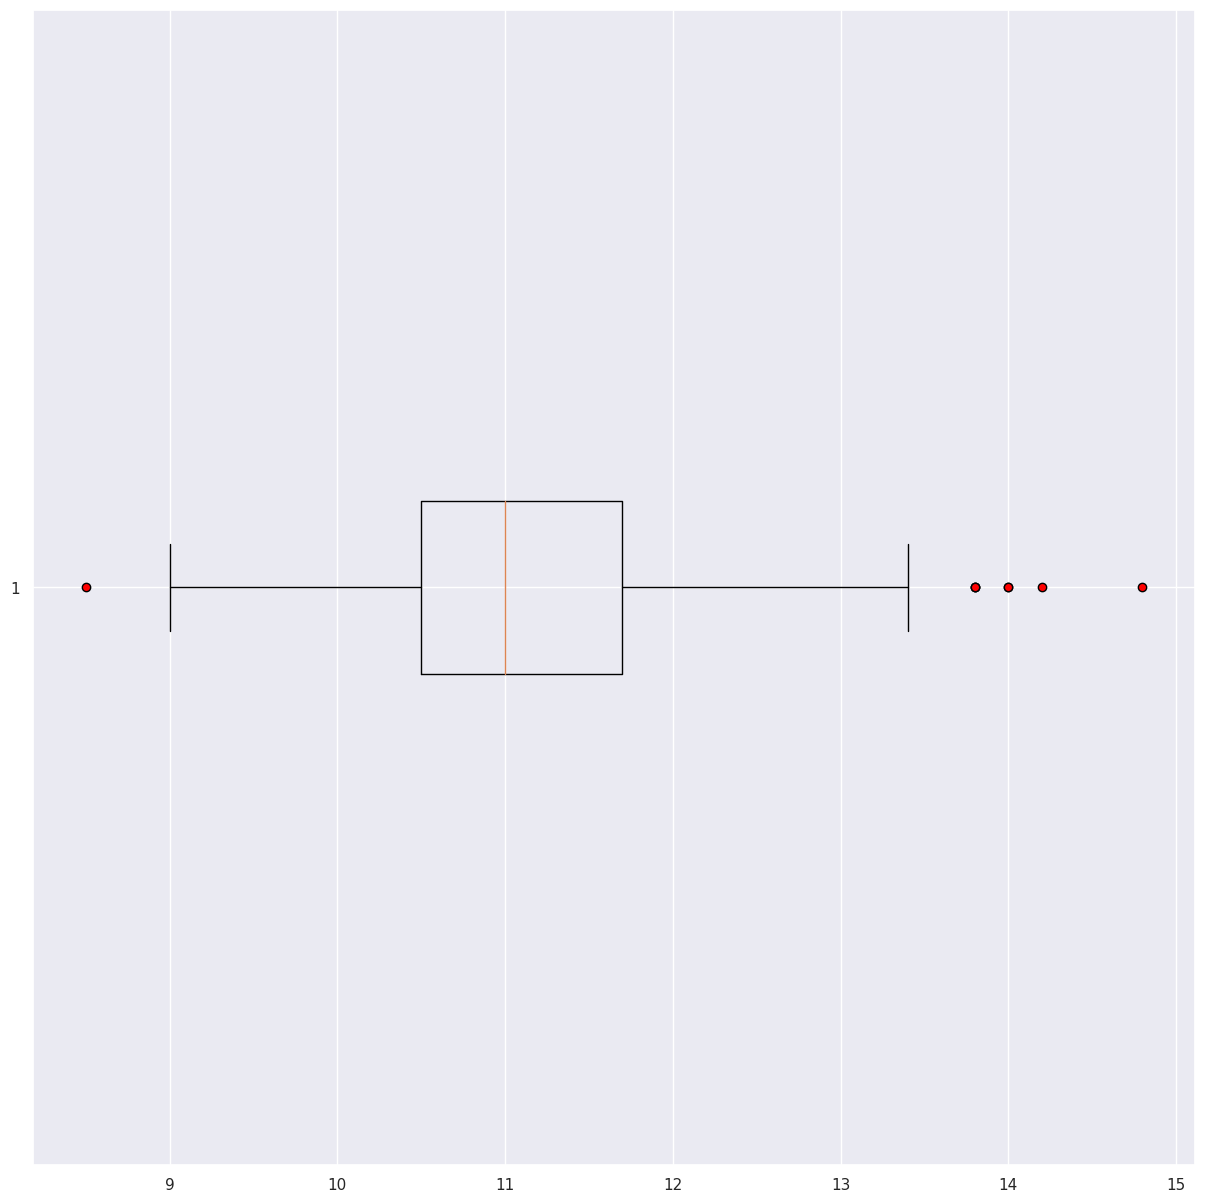

In [21]:
plt.boxplot(x=data['Hb(g/dl)'], vert=False, flierprops=red_circle);

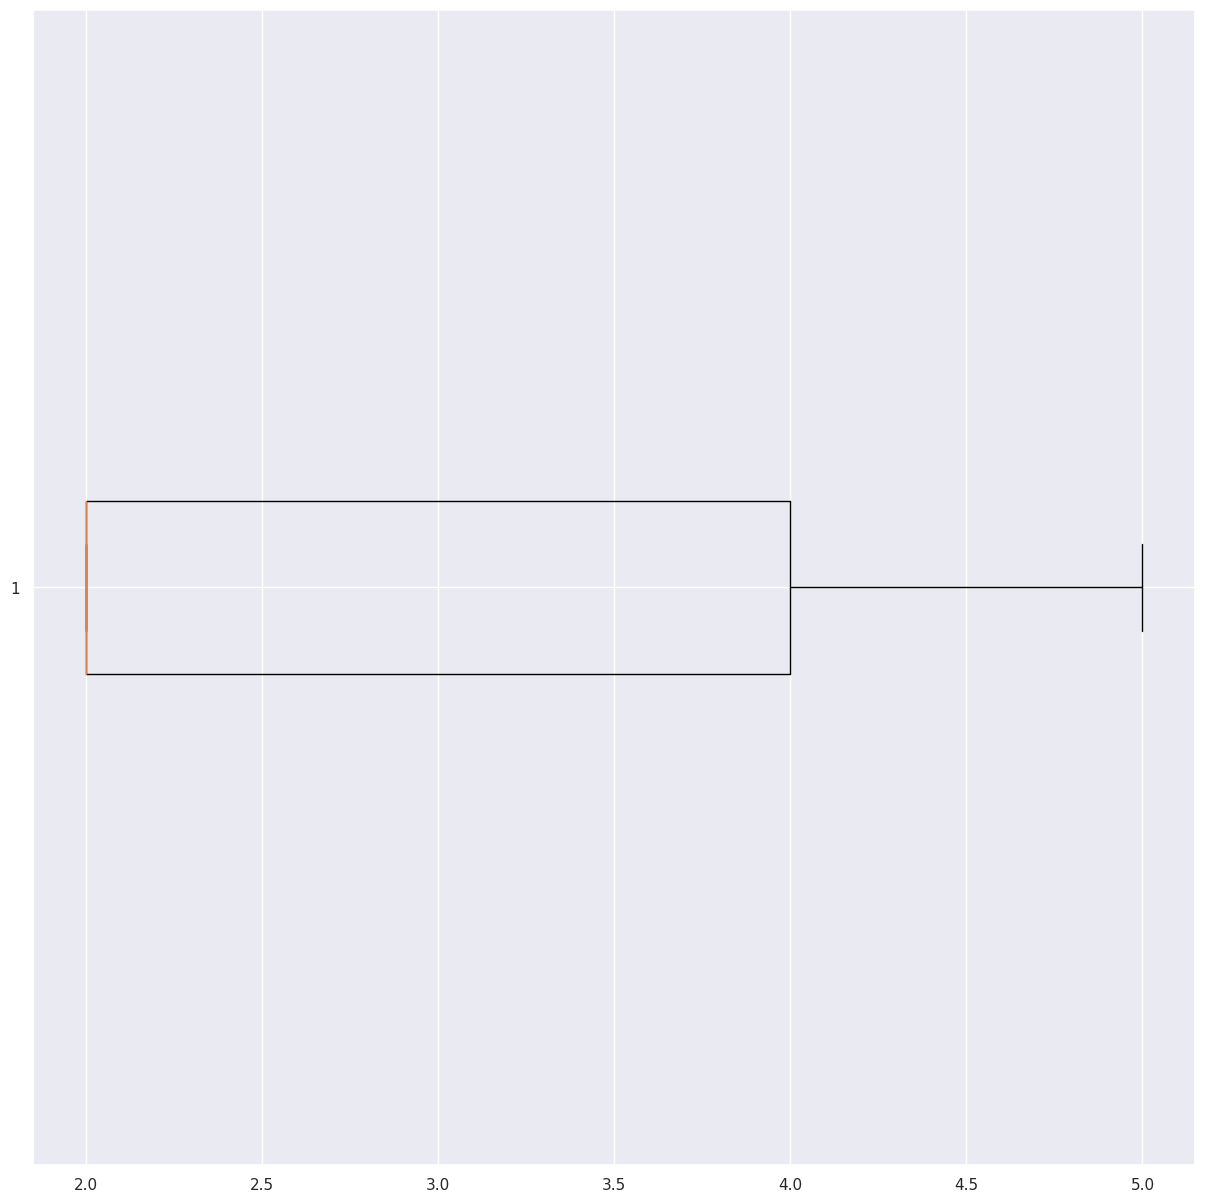

In [22]:
plt.boxplot(x=data['Cycle(R/I)'], vert=False, flierprops=red_circle);

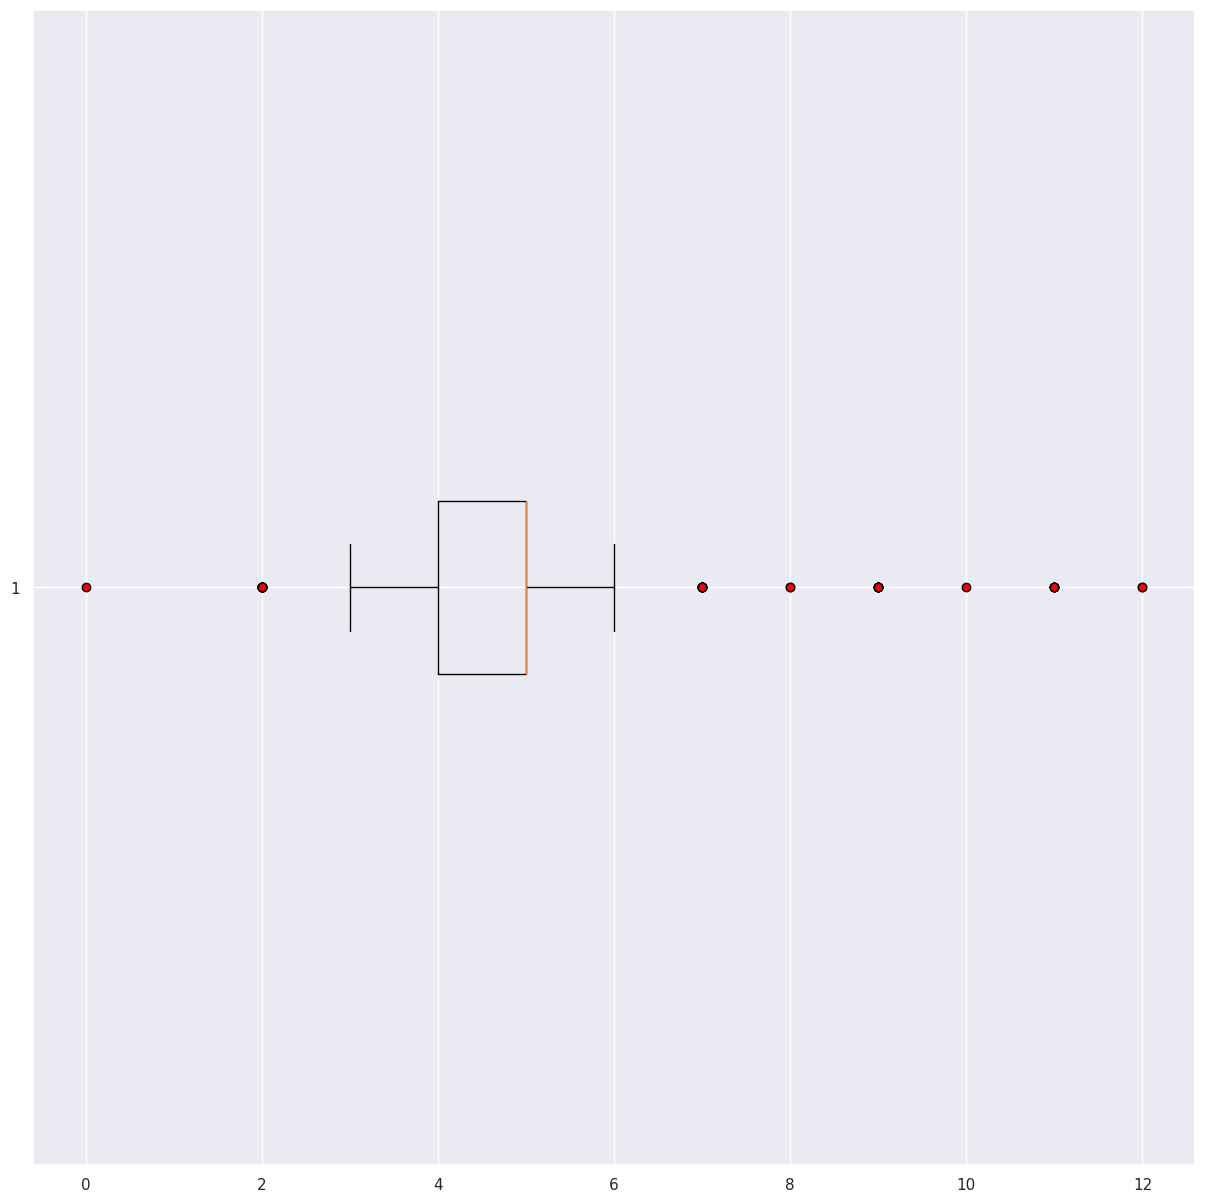

In [23]:
plt.boxplot(x=data['Cycle length(days)'], vert=False, flierprops=red_circle);

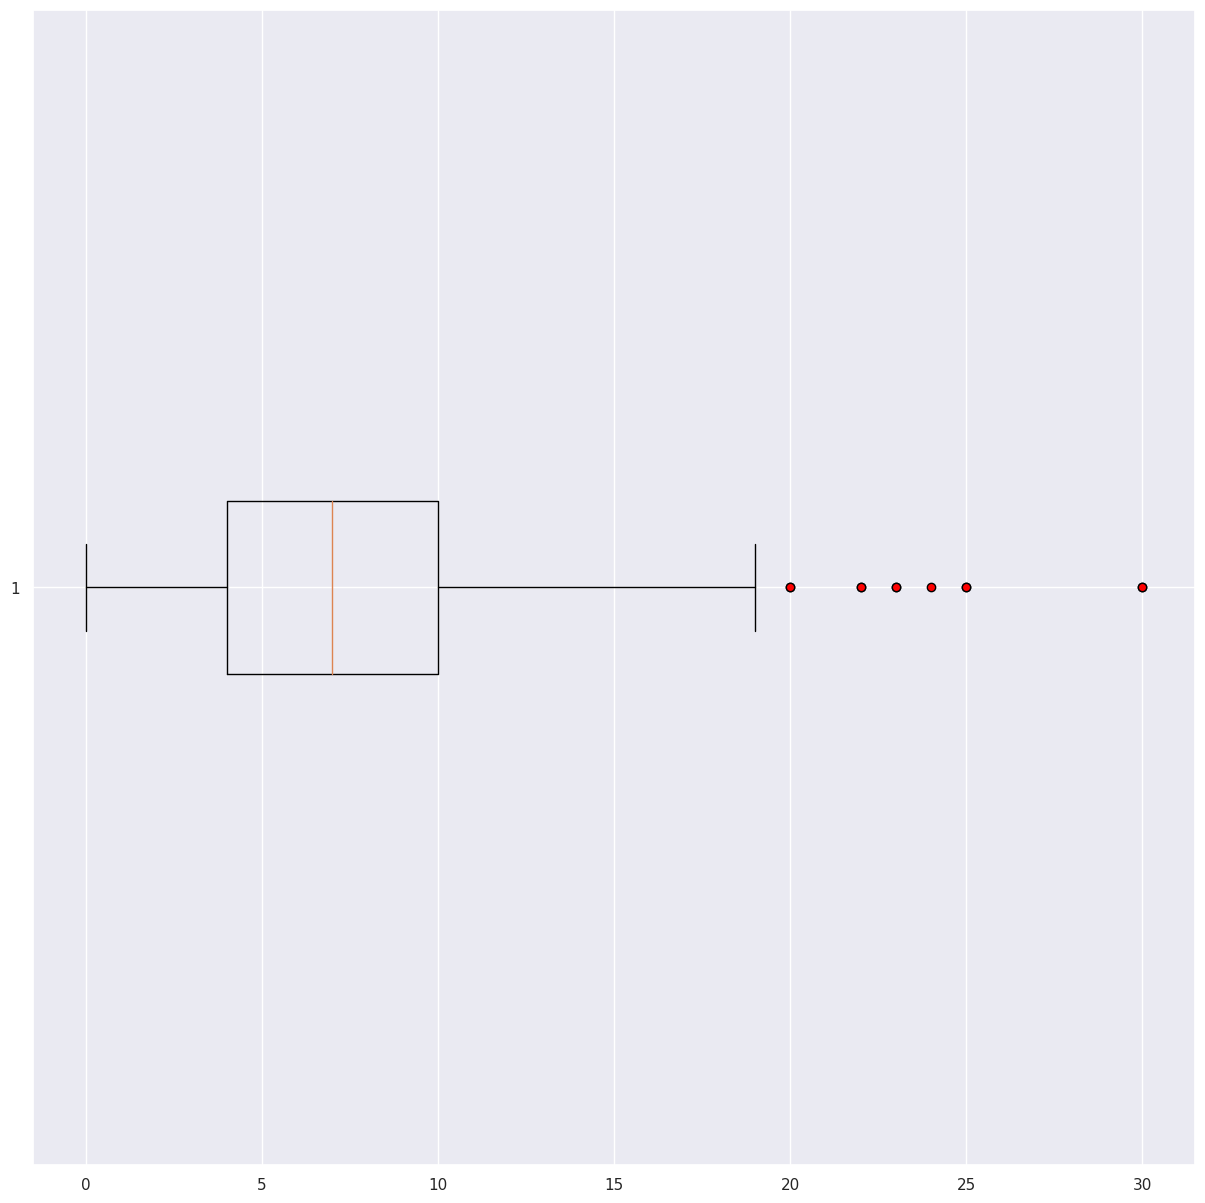

In [24]:
plt.boxplot(x=data['Marraige Status (Yrs)'], vert=False, flierprops=red_circle);

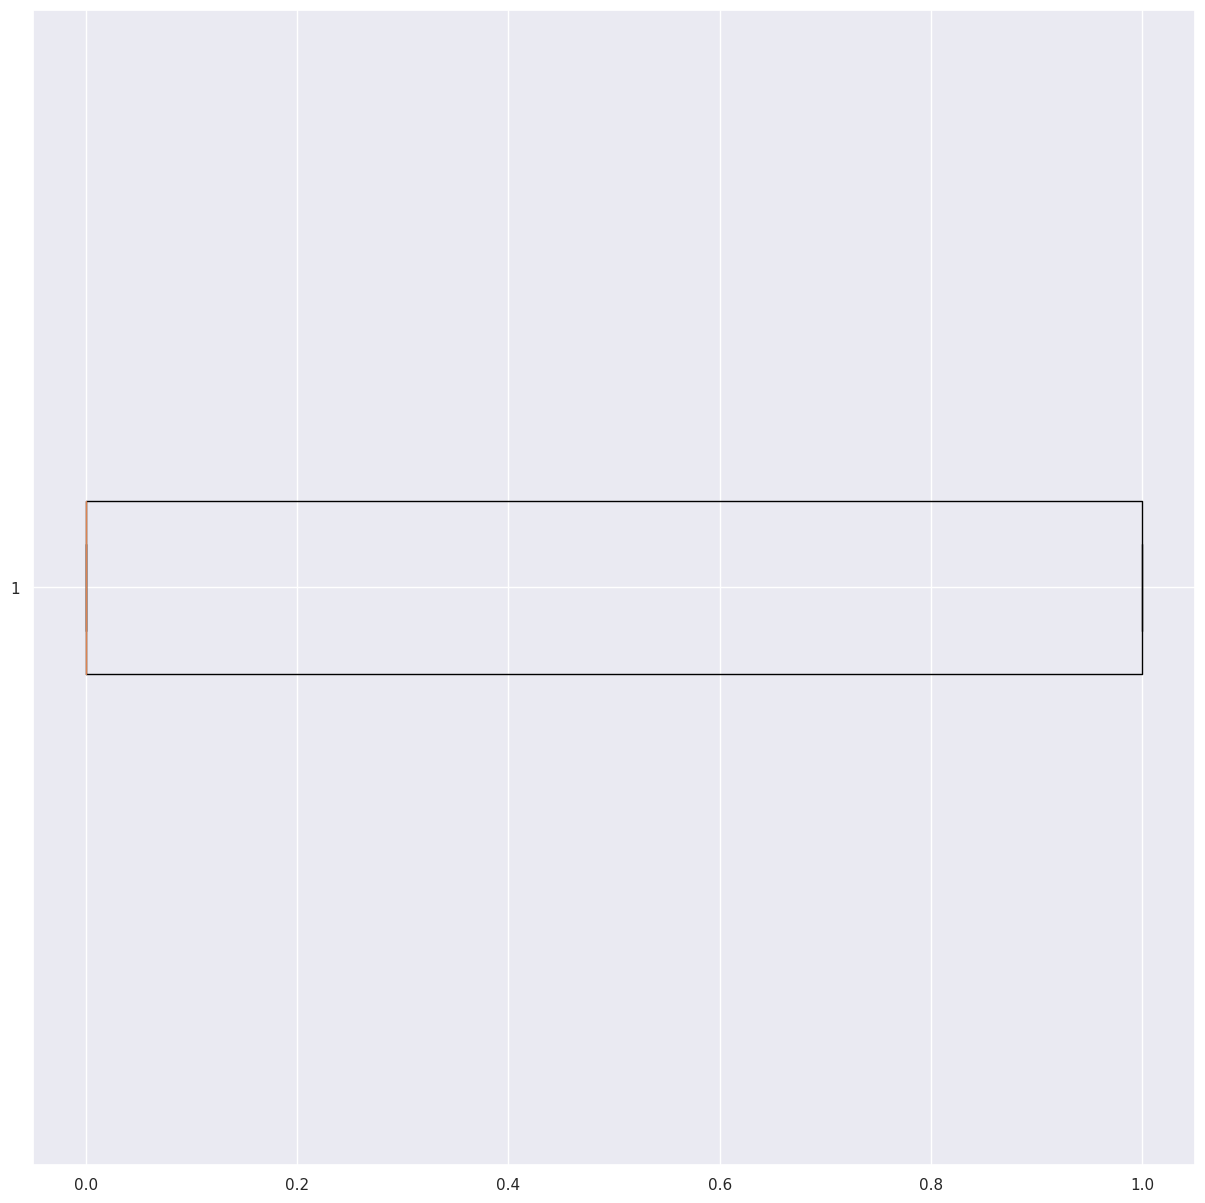

In [25]:
plt.boxplot(x=data['Pregnant(Y/N)'], vert=False, flierprops=red_circle);

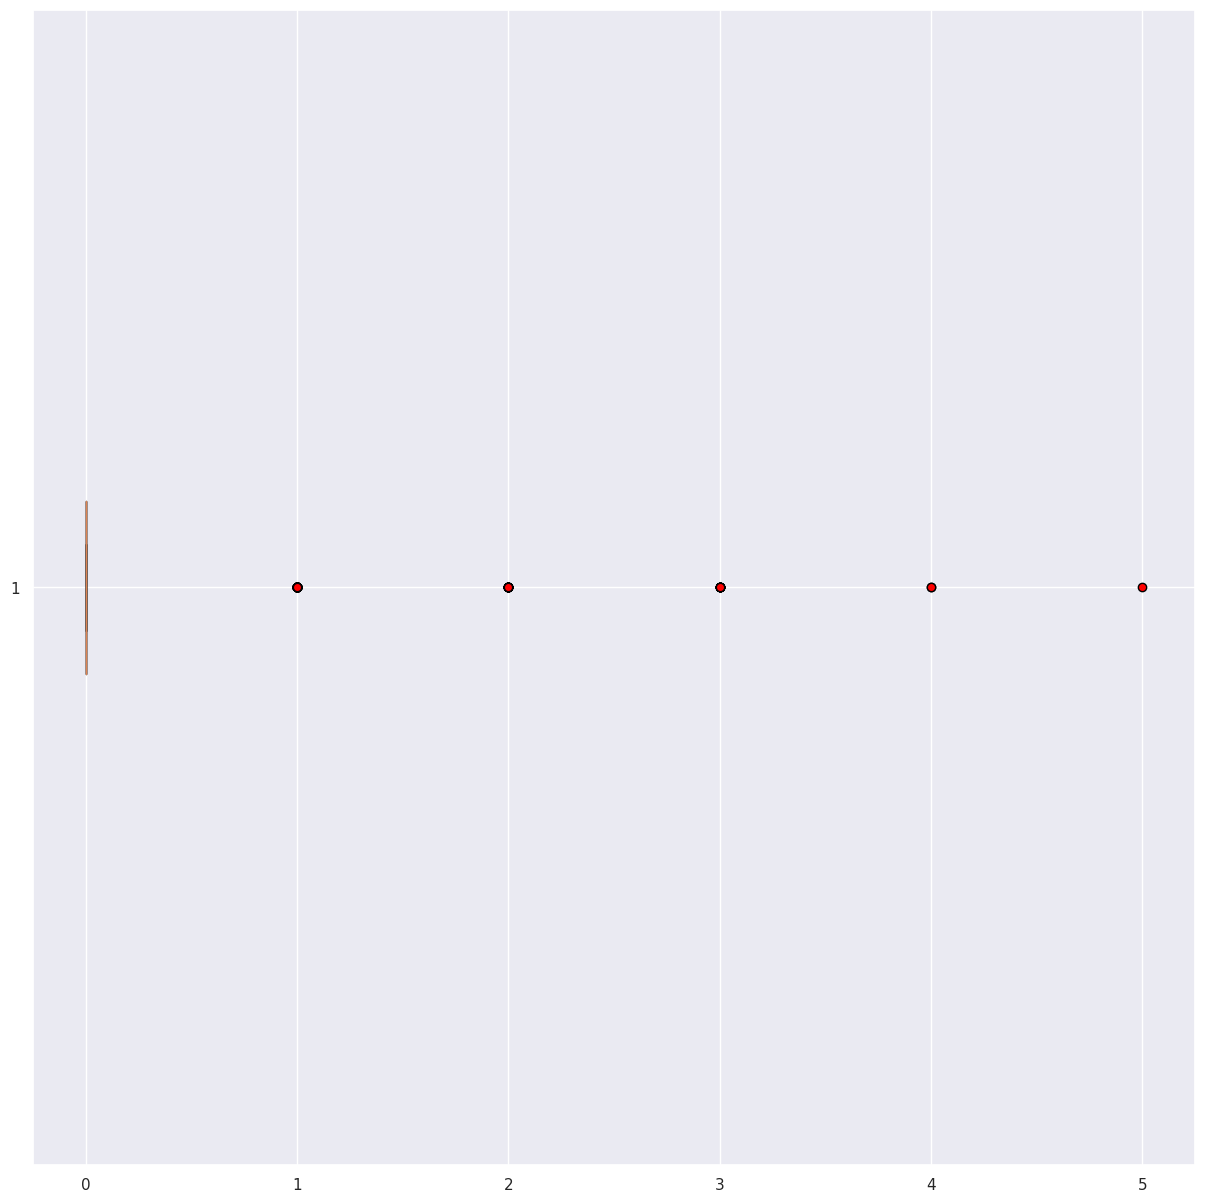

In [26]:
plt.boxplot(x=data['No. of aborptions'], vert=False, flierprops=red_circle);

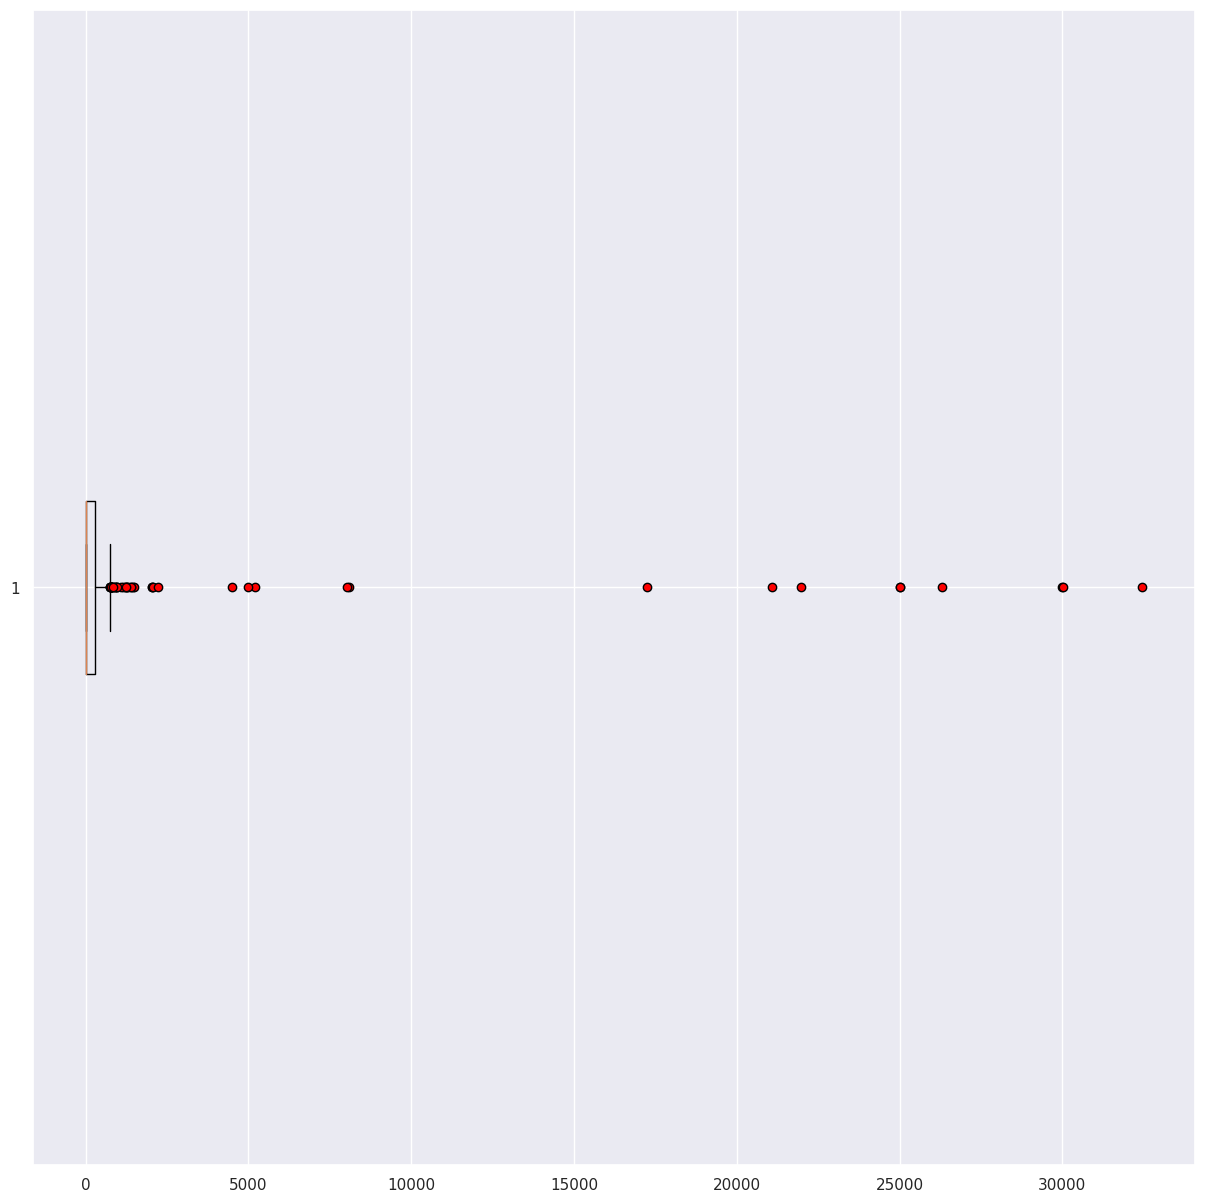

In [27]:
plt.boxplot(x=data['  I   beta-HCG(mIU/mL)'], vert=False, flierprops=red_circle);

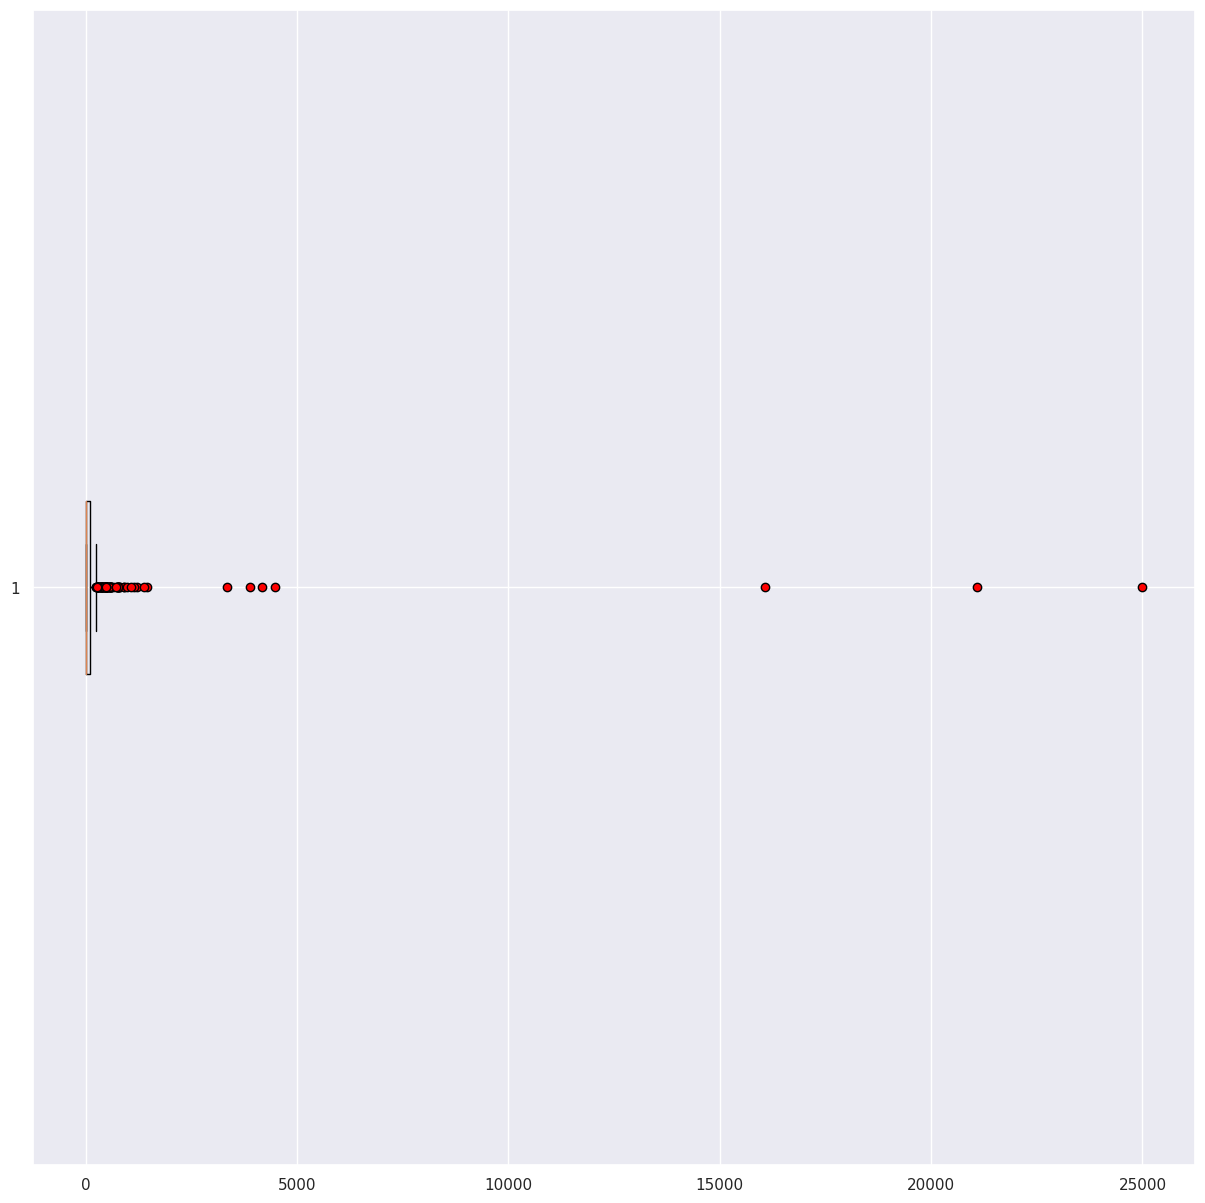

In [28]:
plt.boxplot(x=data['II    beta-HCG(mIU/mL)'], vert=False, flierprops=red_circle);

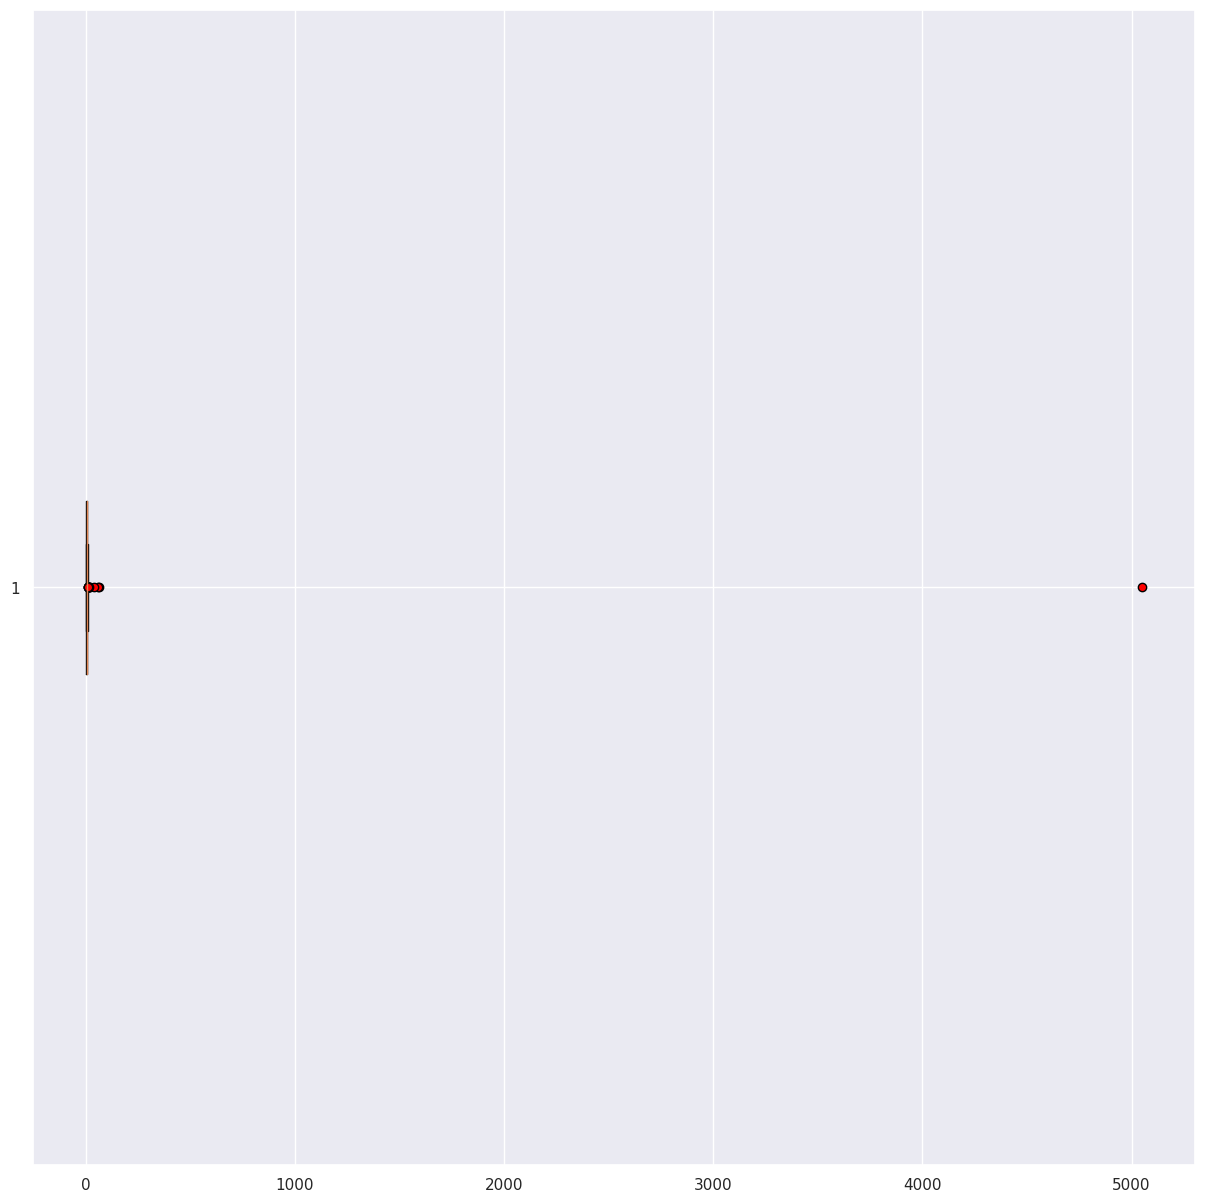

In [29]:
plt.boxplot(x=data['FSH(mIU/mL)'], vert=False, flierprops=red_circle);

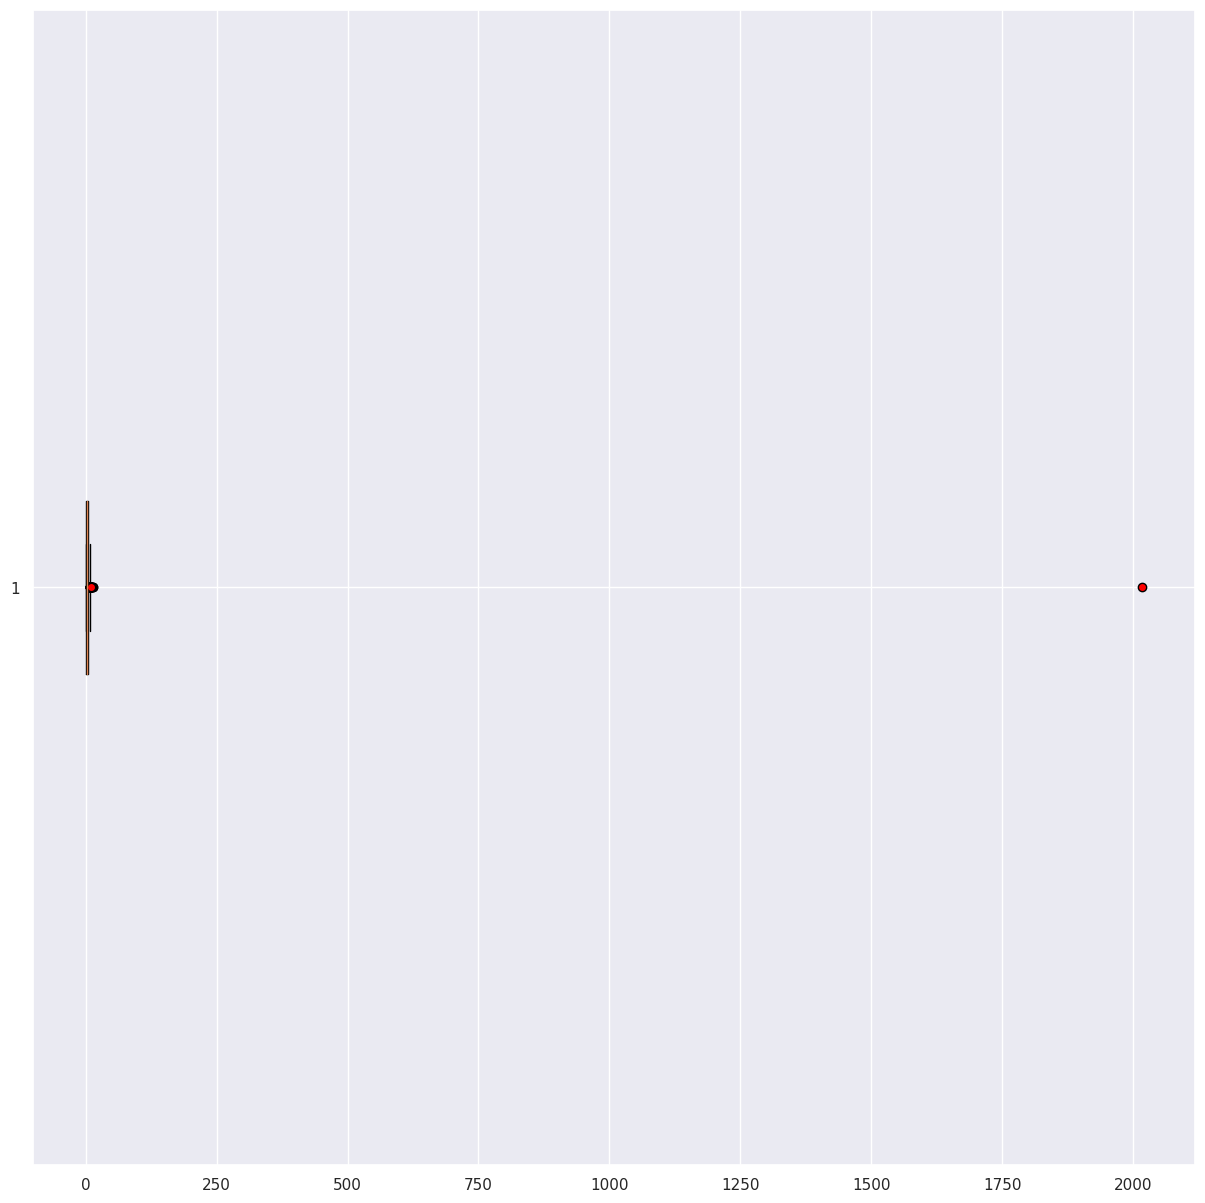

In [30]:
plt.boxplot(x=data['LH(mIU/mL)'], vert=False, flierprops=red_circle);

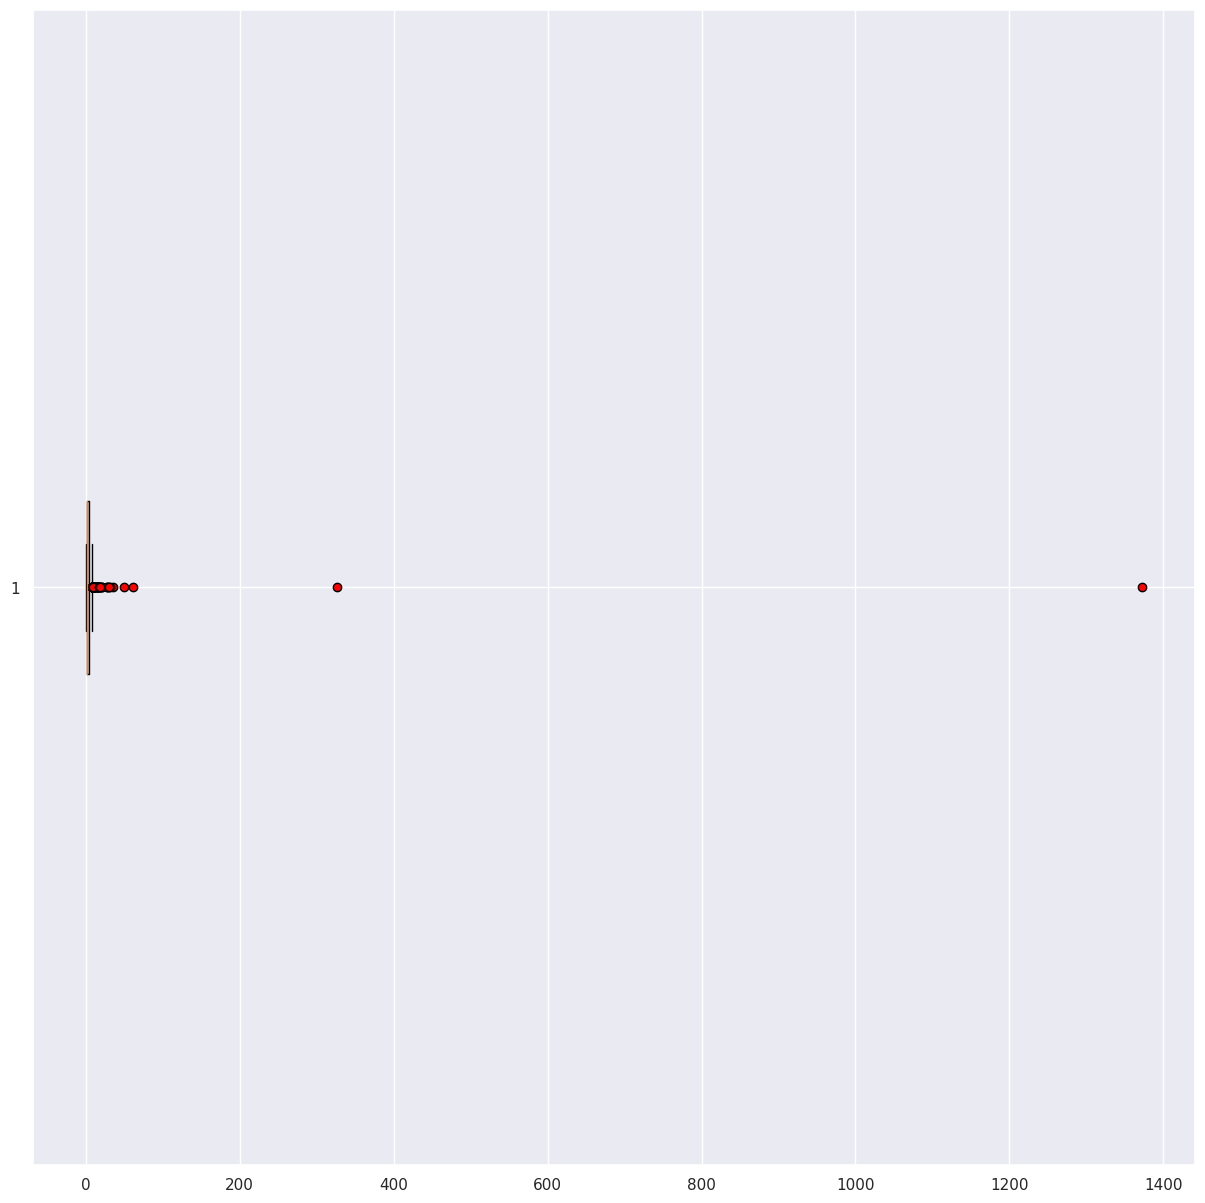

In [31]:
plt.boxplot(x=data['FSH/LH'], vert=False, flierprops=red_circle);

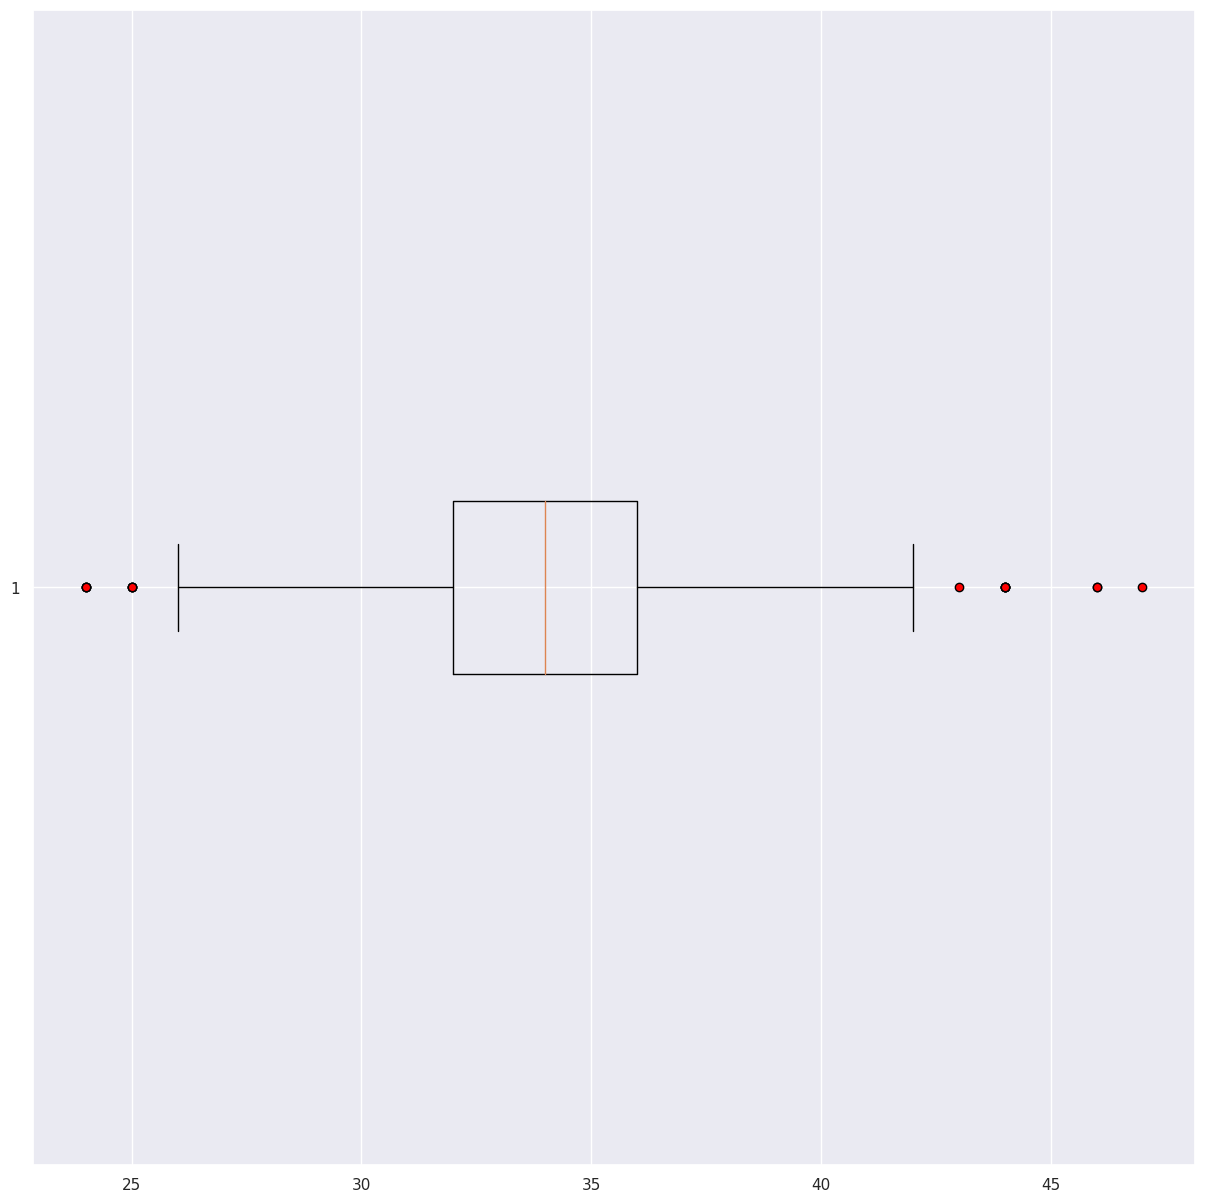

In [32]:
plt.boxplot(x=data['Waist(inch)'], vert=False, flierprops=red_circle);

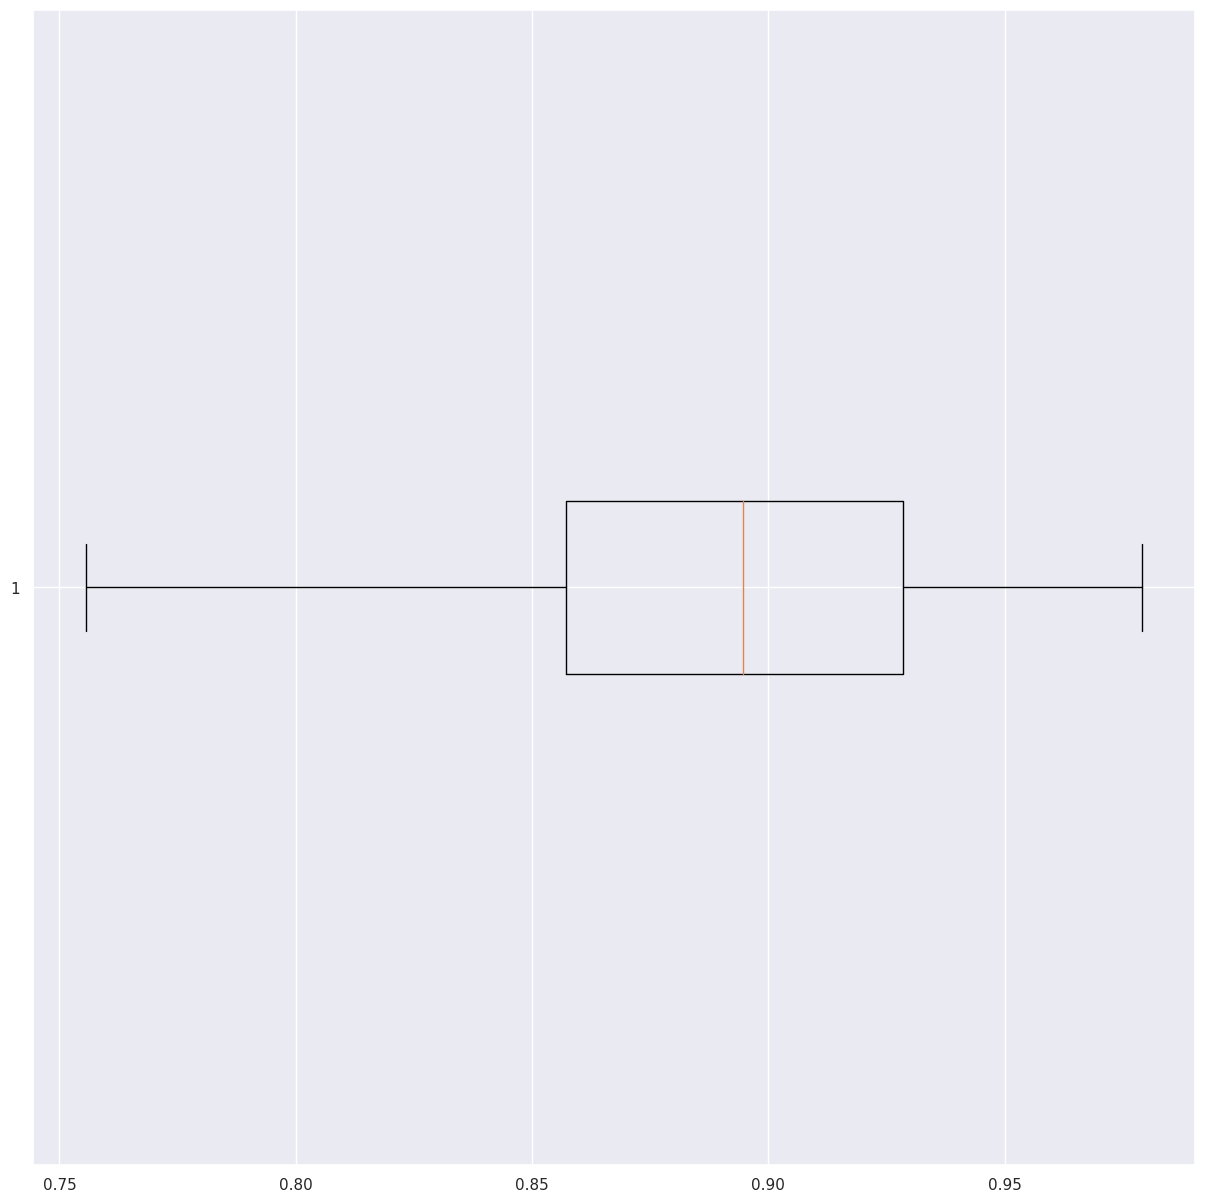

In [33]:
plt.boxplot(x=data['Waist:Hip Ratio'], vert=False, flierprops=red_circle);

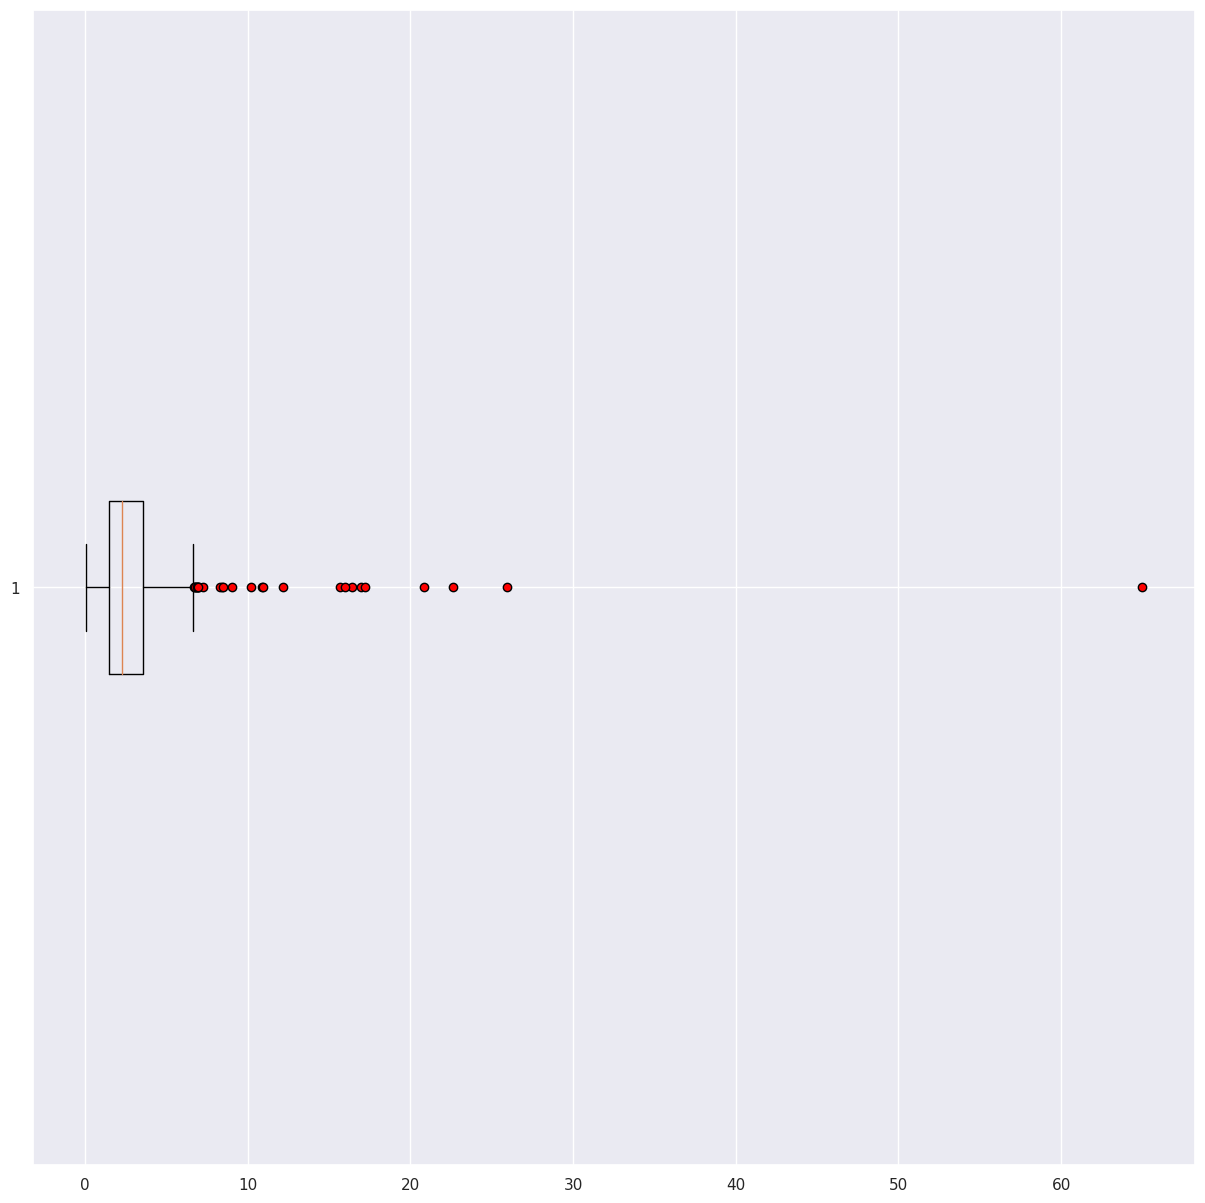

In [34]:
plt.boxplot(x=data['TSH (mIU/L)'], vert=False, flierprops=red_circle);

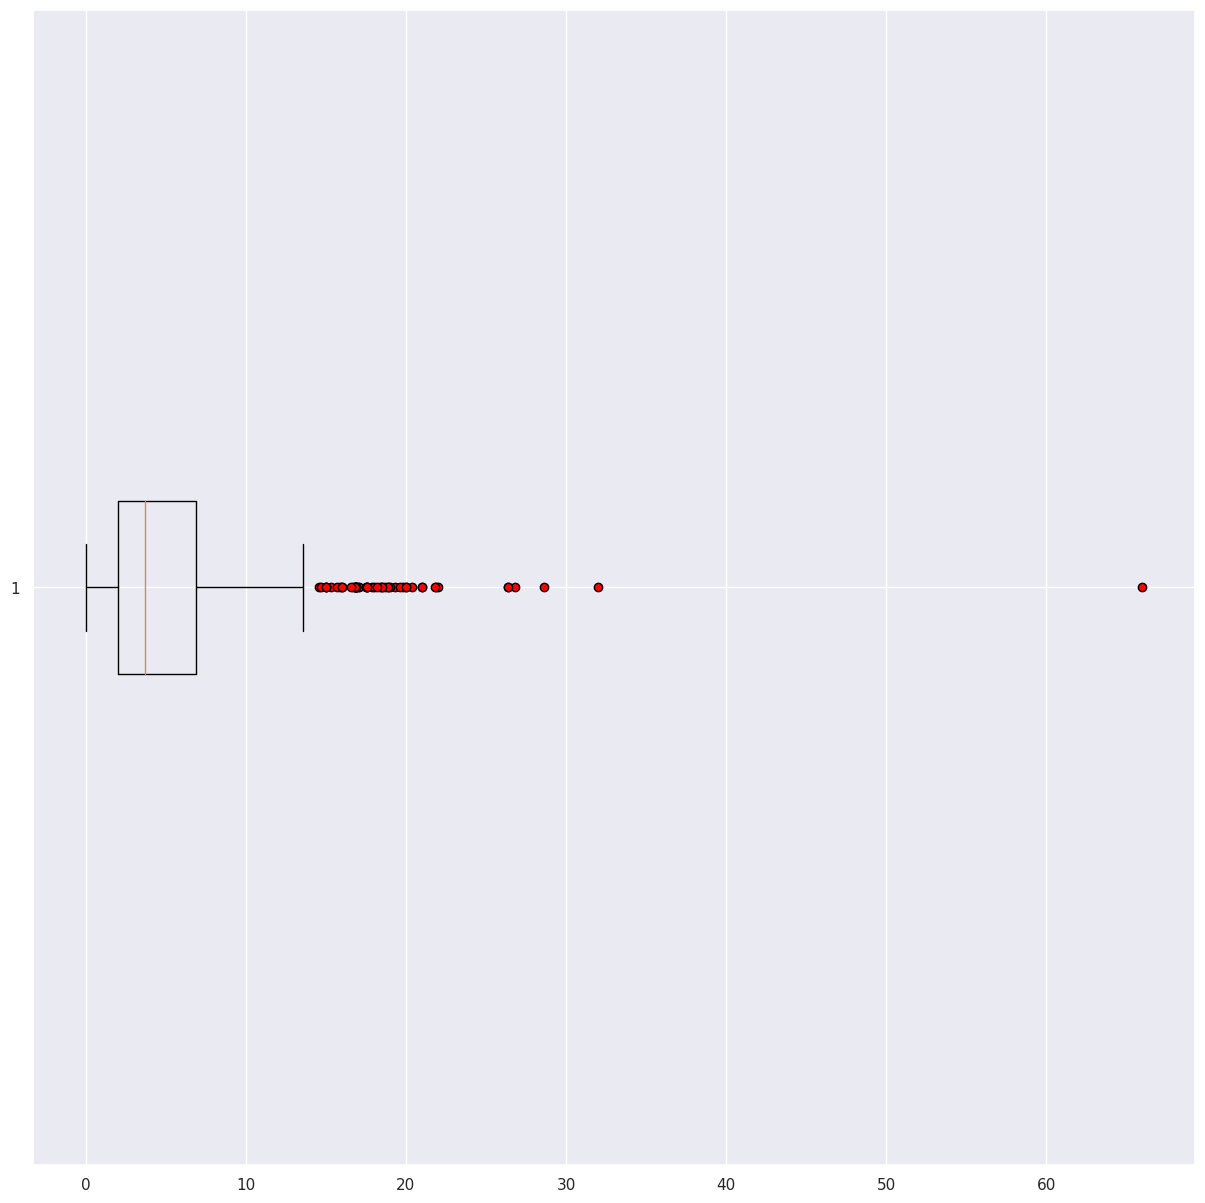

In [35]:
plt.boxplot(x=data['AMH(ng/mL)'], vert=False, flierprops=red_circle);

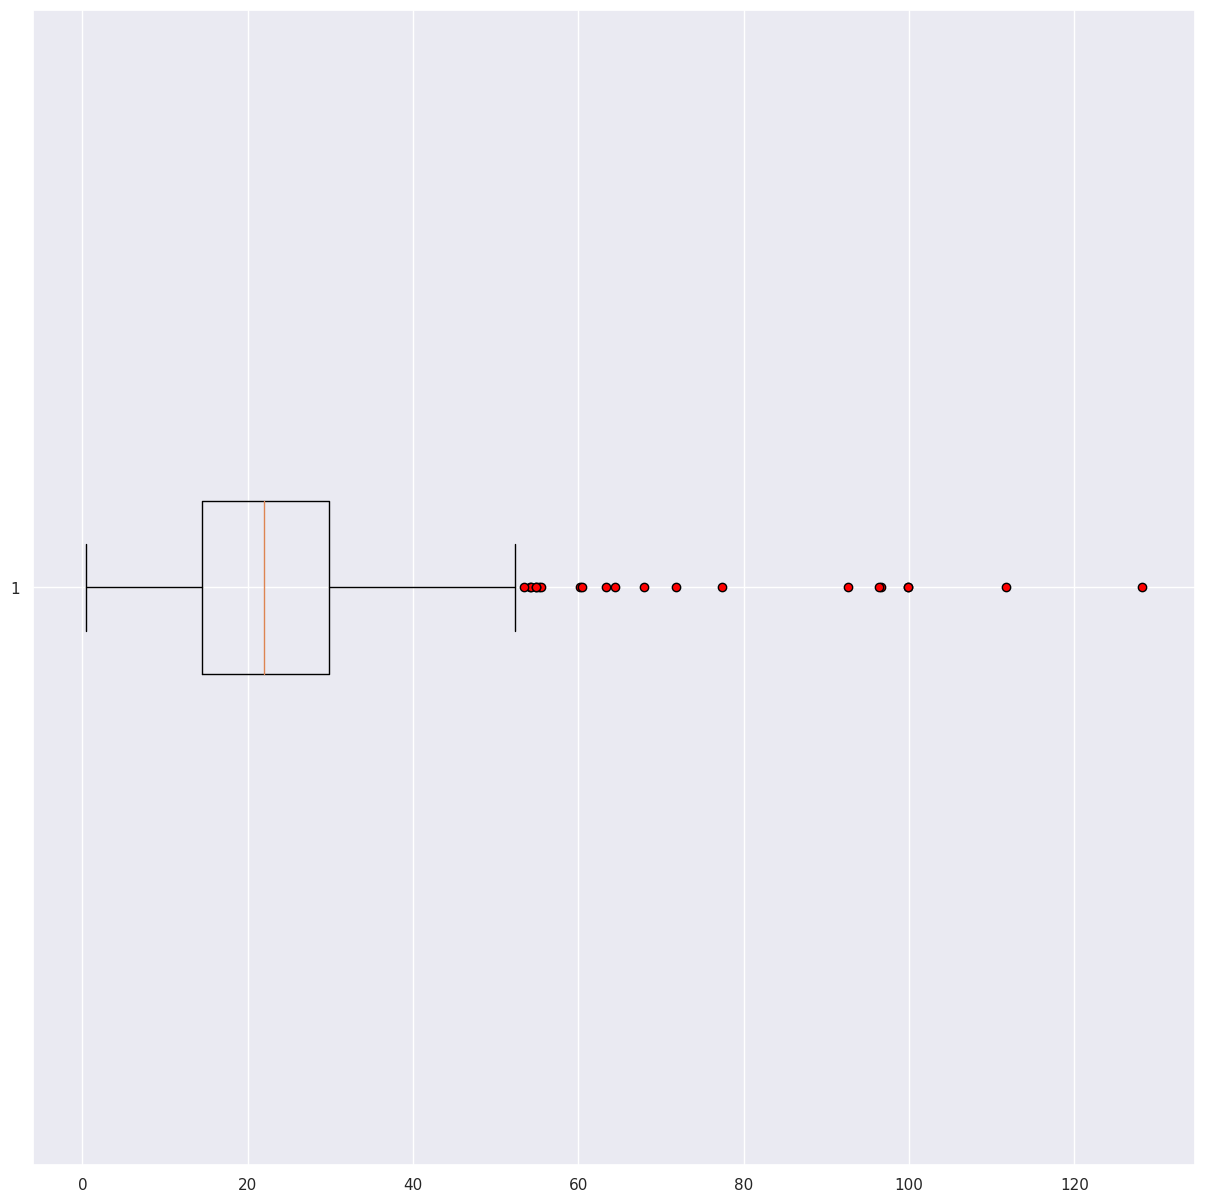

In [36]:
plt.boxplot(x=data['PRL(ng/mL)'], vert=False, flierprops=red_circle);

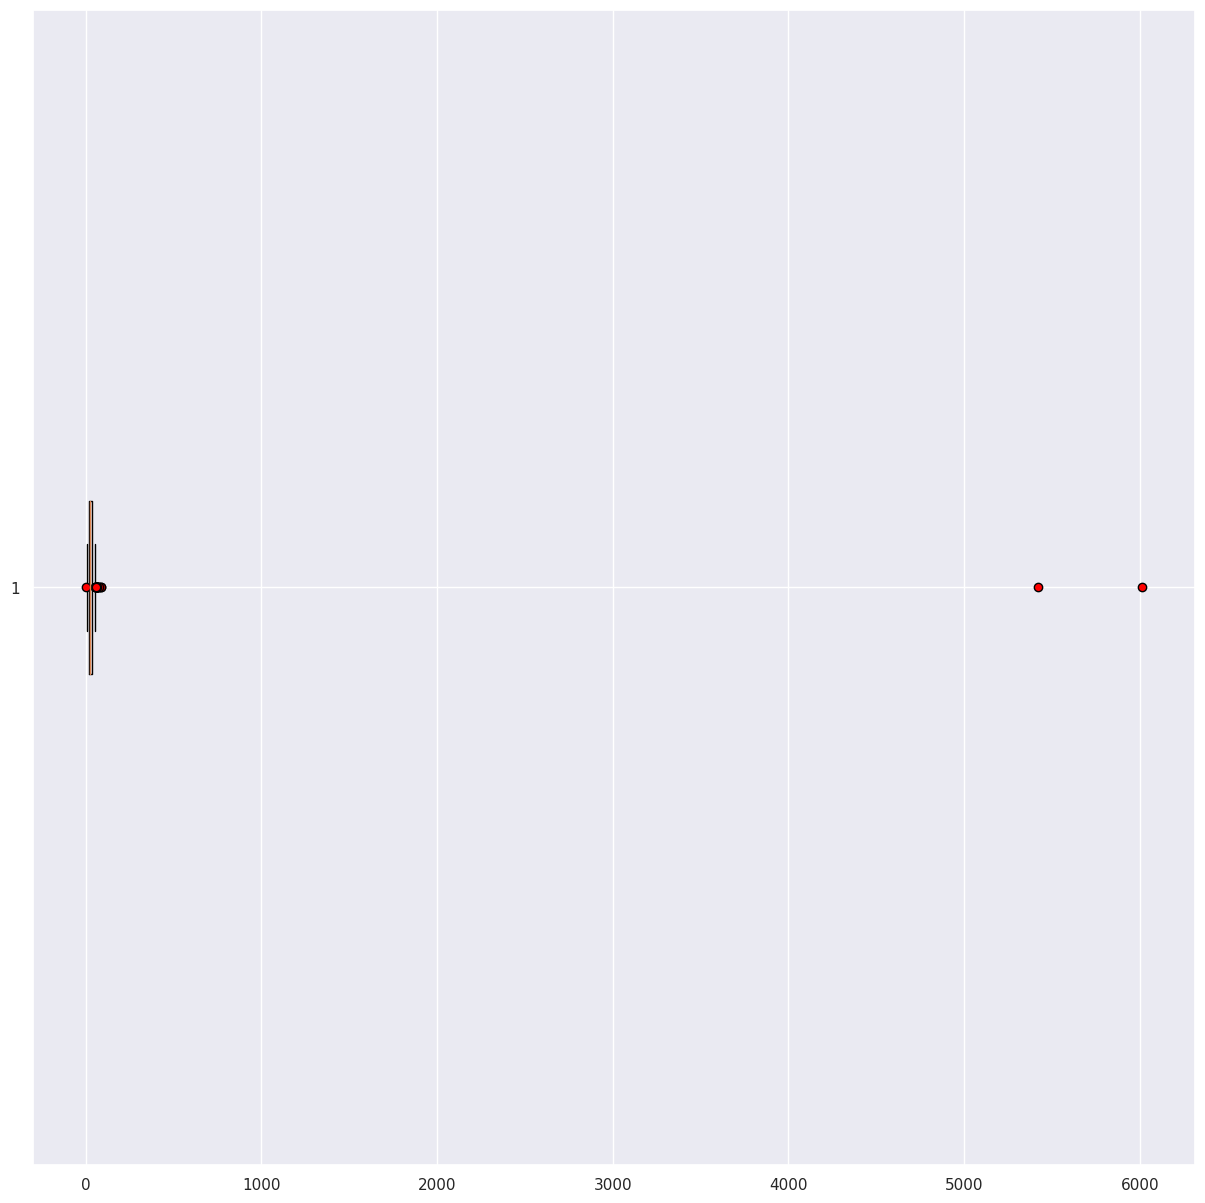

In [37]:
plt.boxplot(x=data['Vit D3 (ng/mL)'], vert=False, flierprops=red_circle);

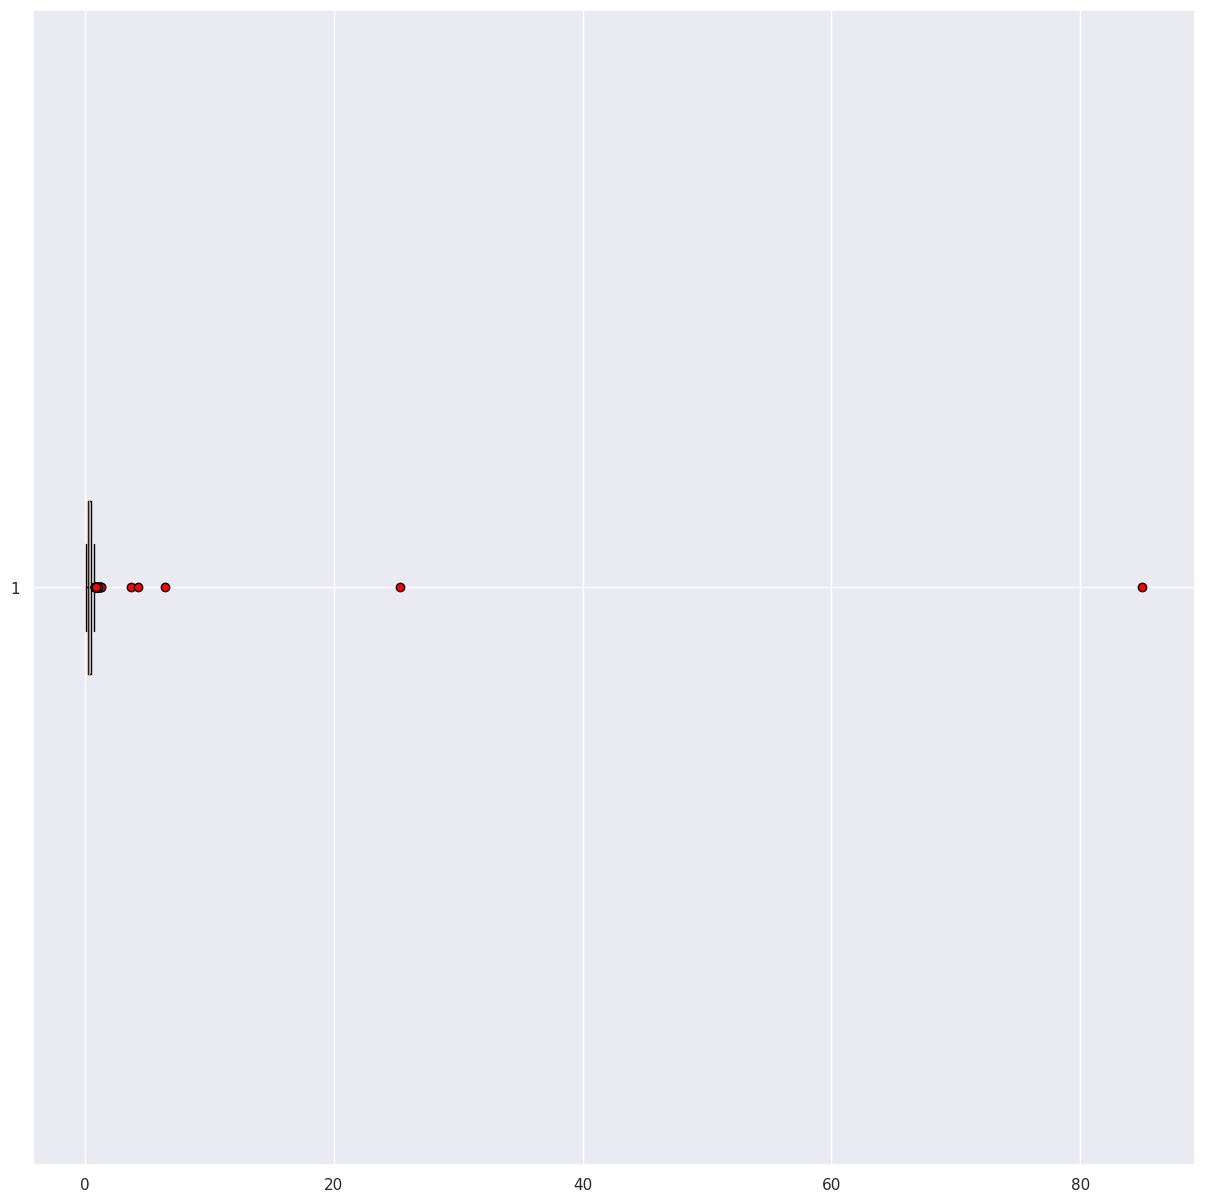

In [38]:
plt.boxplot(x=data['PRG(ng/mL)'], vert=False, flierprops=red_circle);

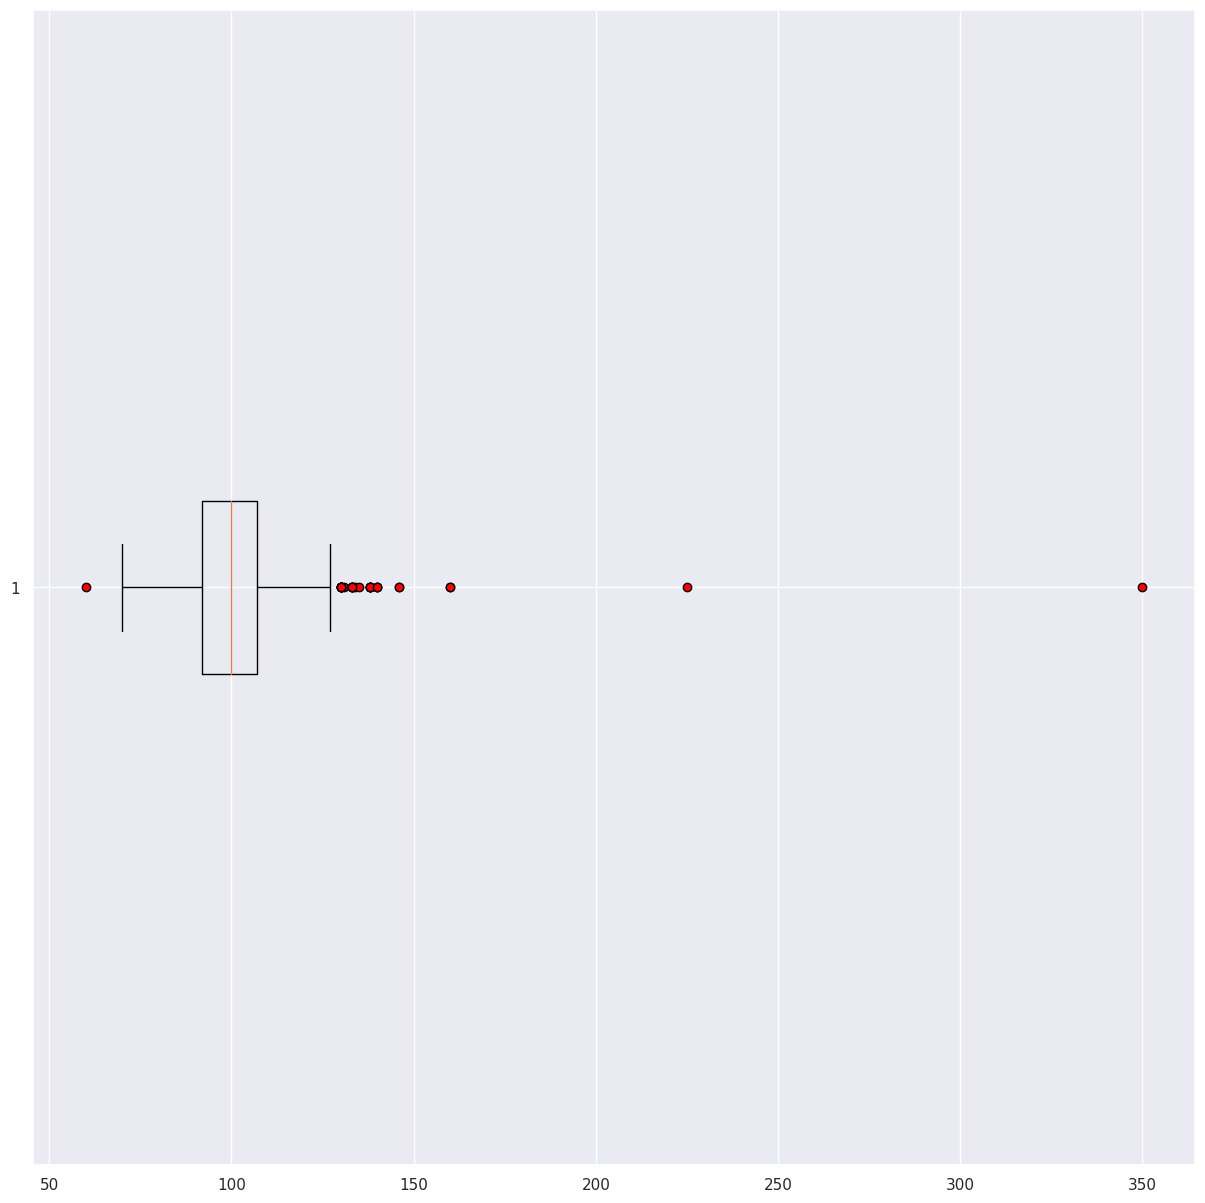

In [39]:
plt.boxplot(x=data['RBS(mg/dl)'], vert=False, flierprops=red_circle);

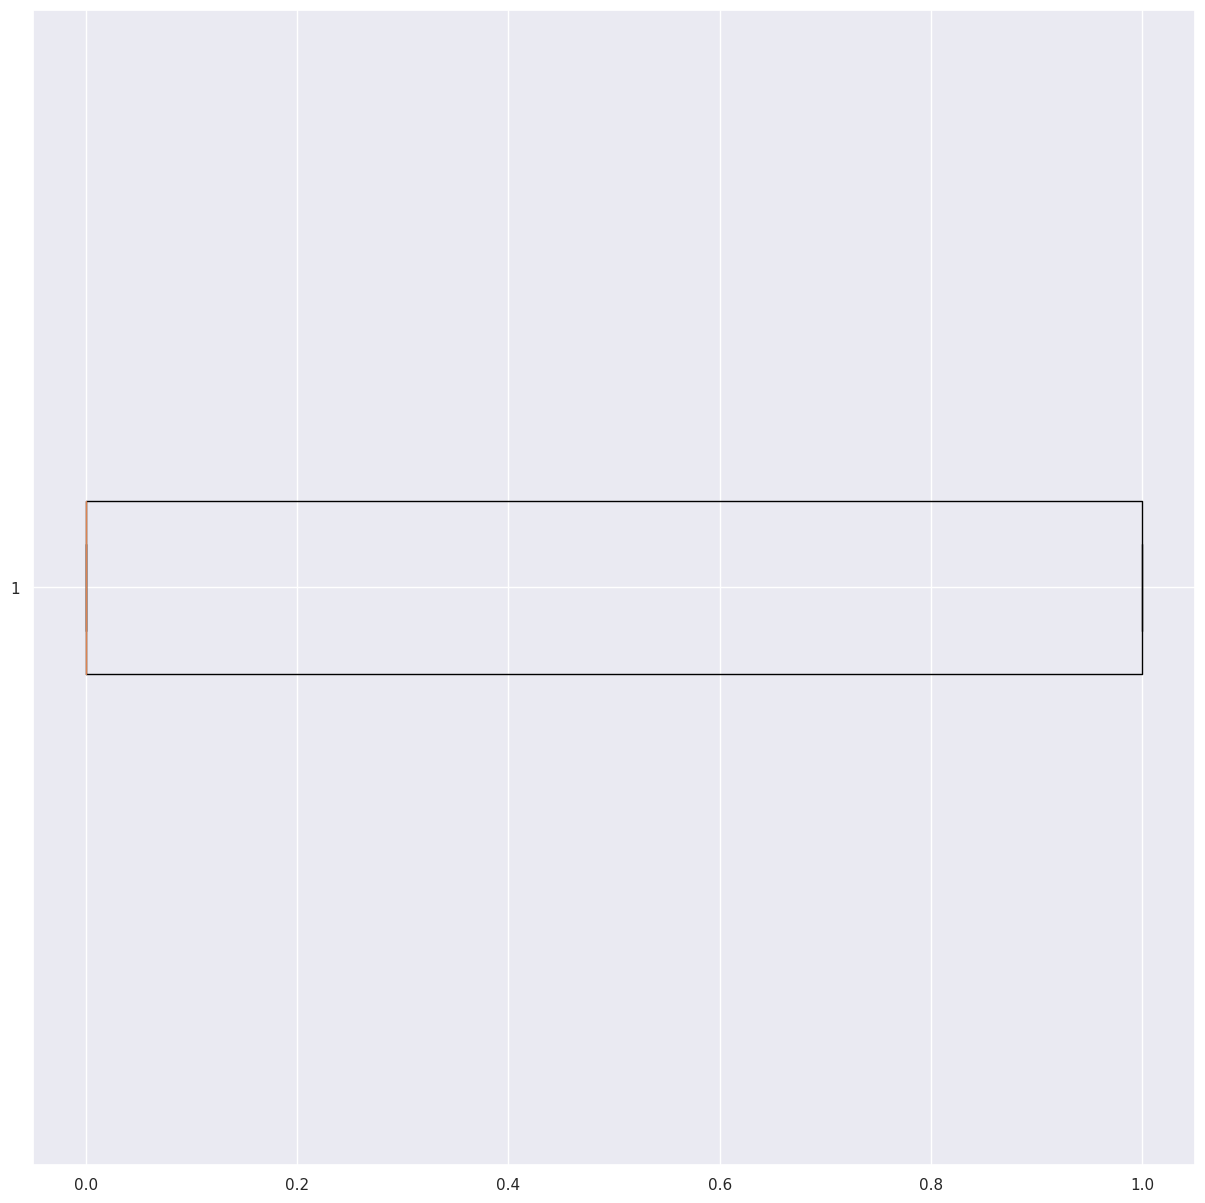

In [40]:
plt.boxplot(x=data['Weight gain(Y/N)'], vert=False, flierprops=red_circle);

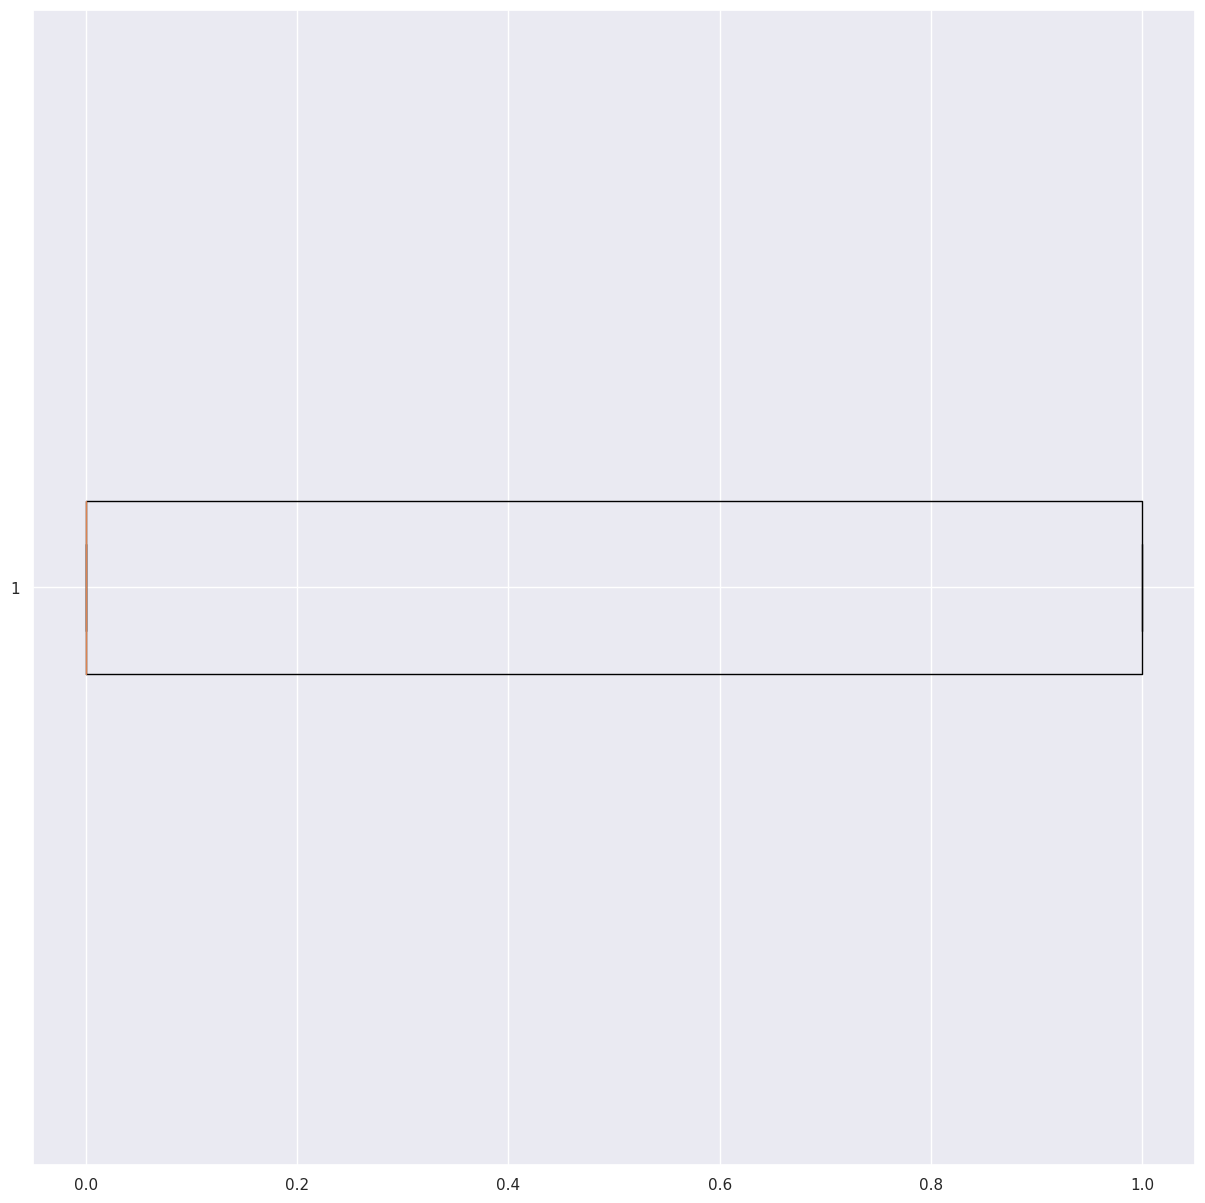

In [41]:
plt.boxplot(x=data['hair growth(Y/N)'], vert=False, flierprops=red_circle);

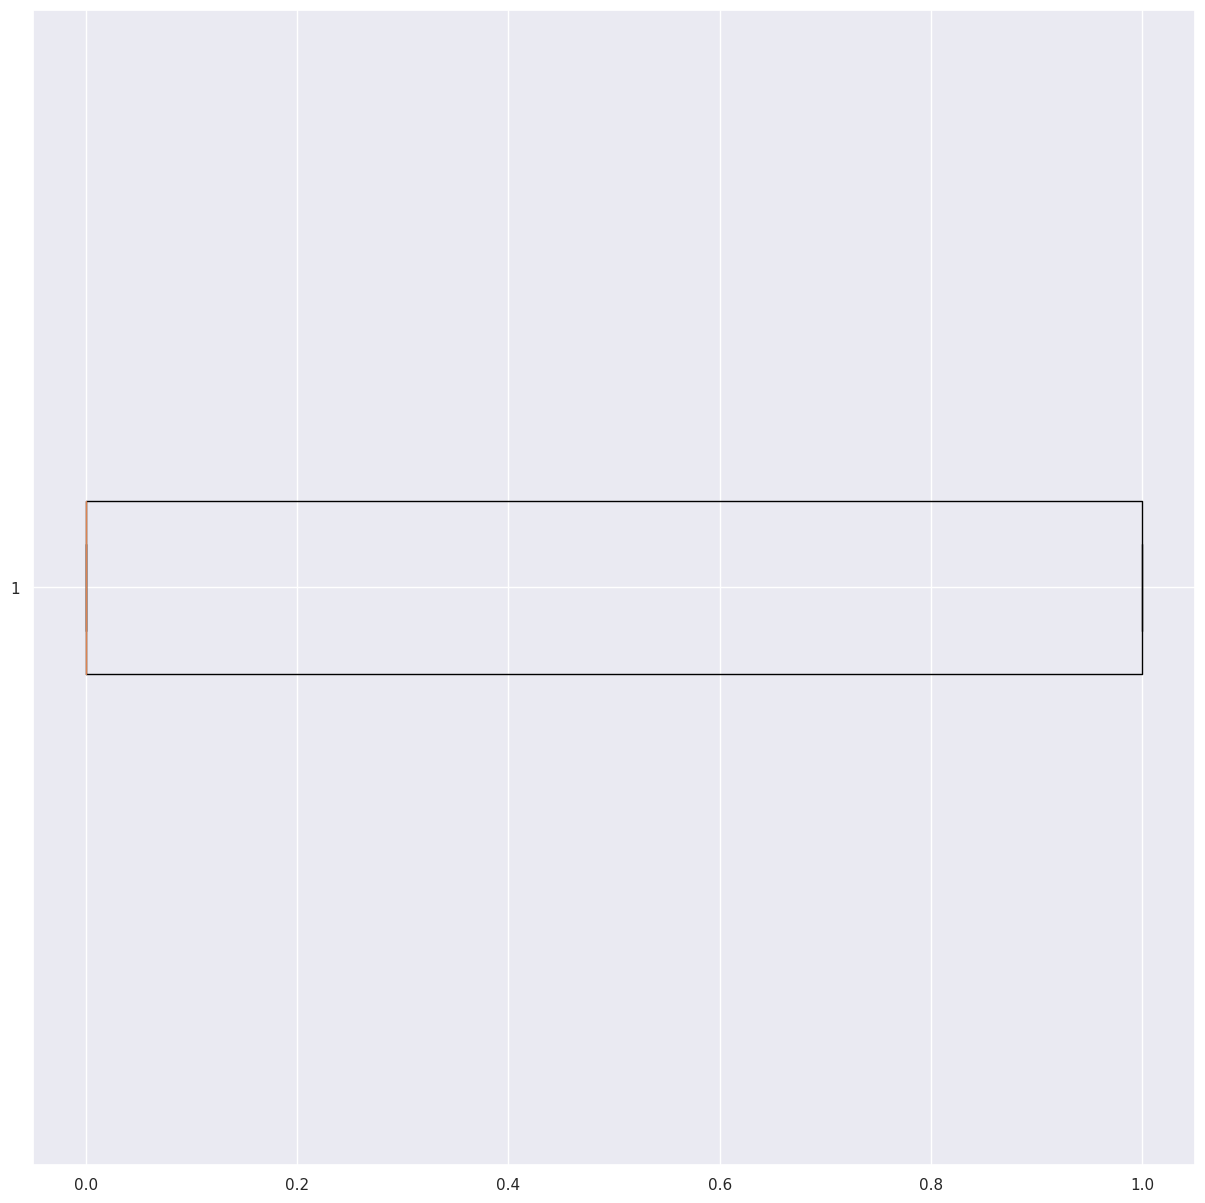

In [42]:
plt.boxplot(x=data['Skin darkening (Y/N)'], vert=False, flierprops=red_circle);

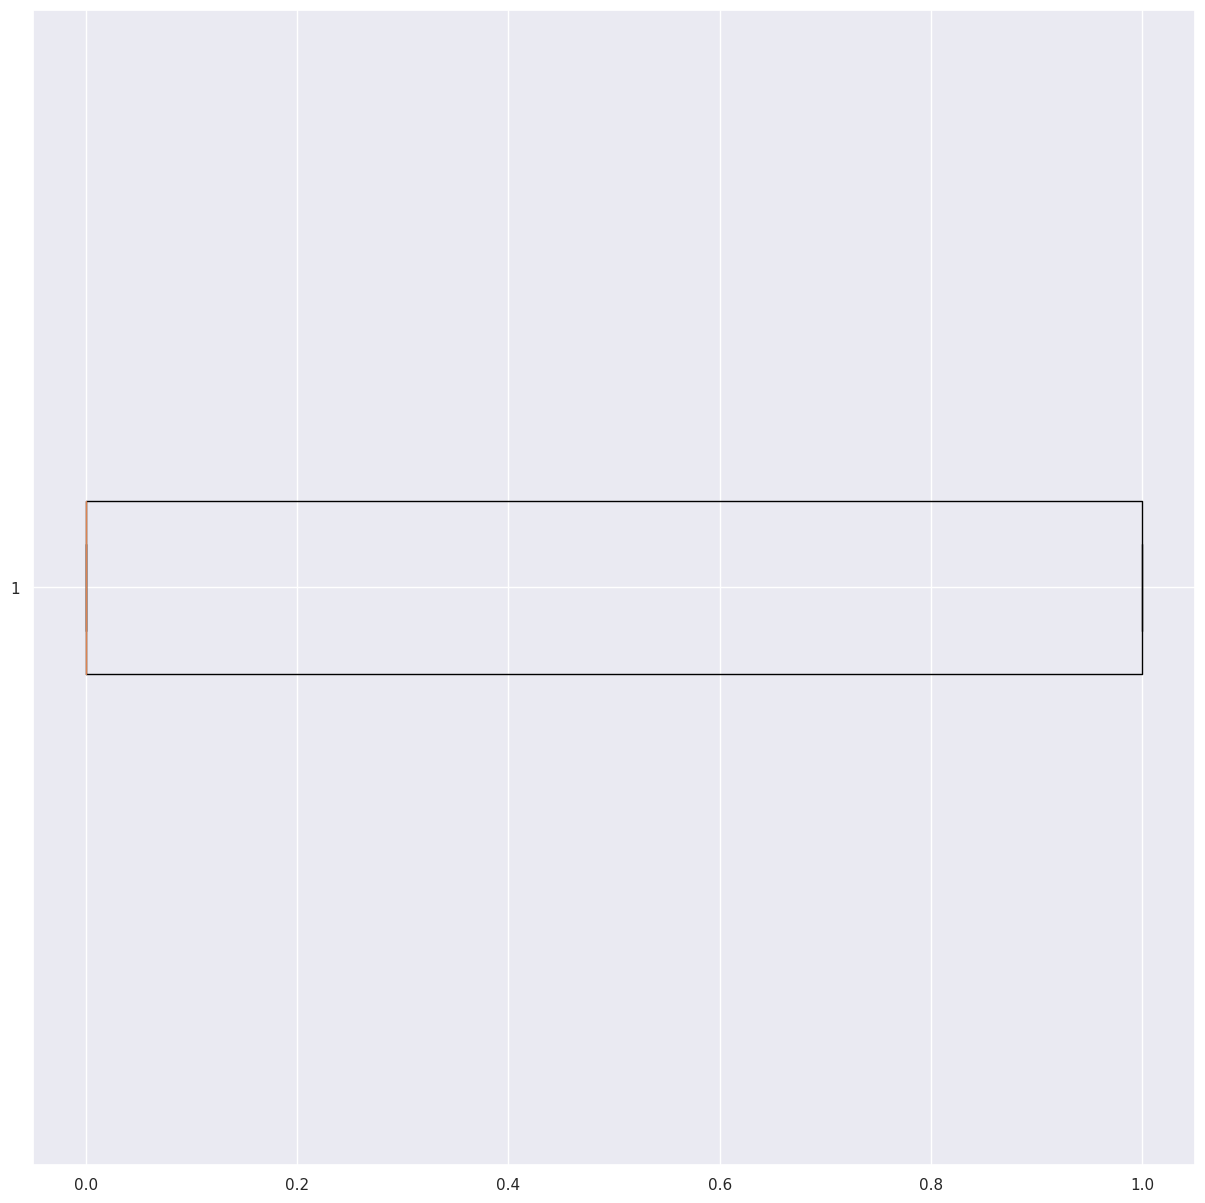

In [43]:
plt.boxplot(x=data['Hair loss(Y/N)'], vert=False, flierprops=red_circle);

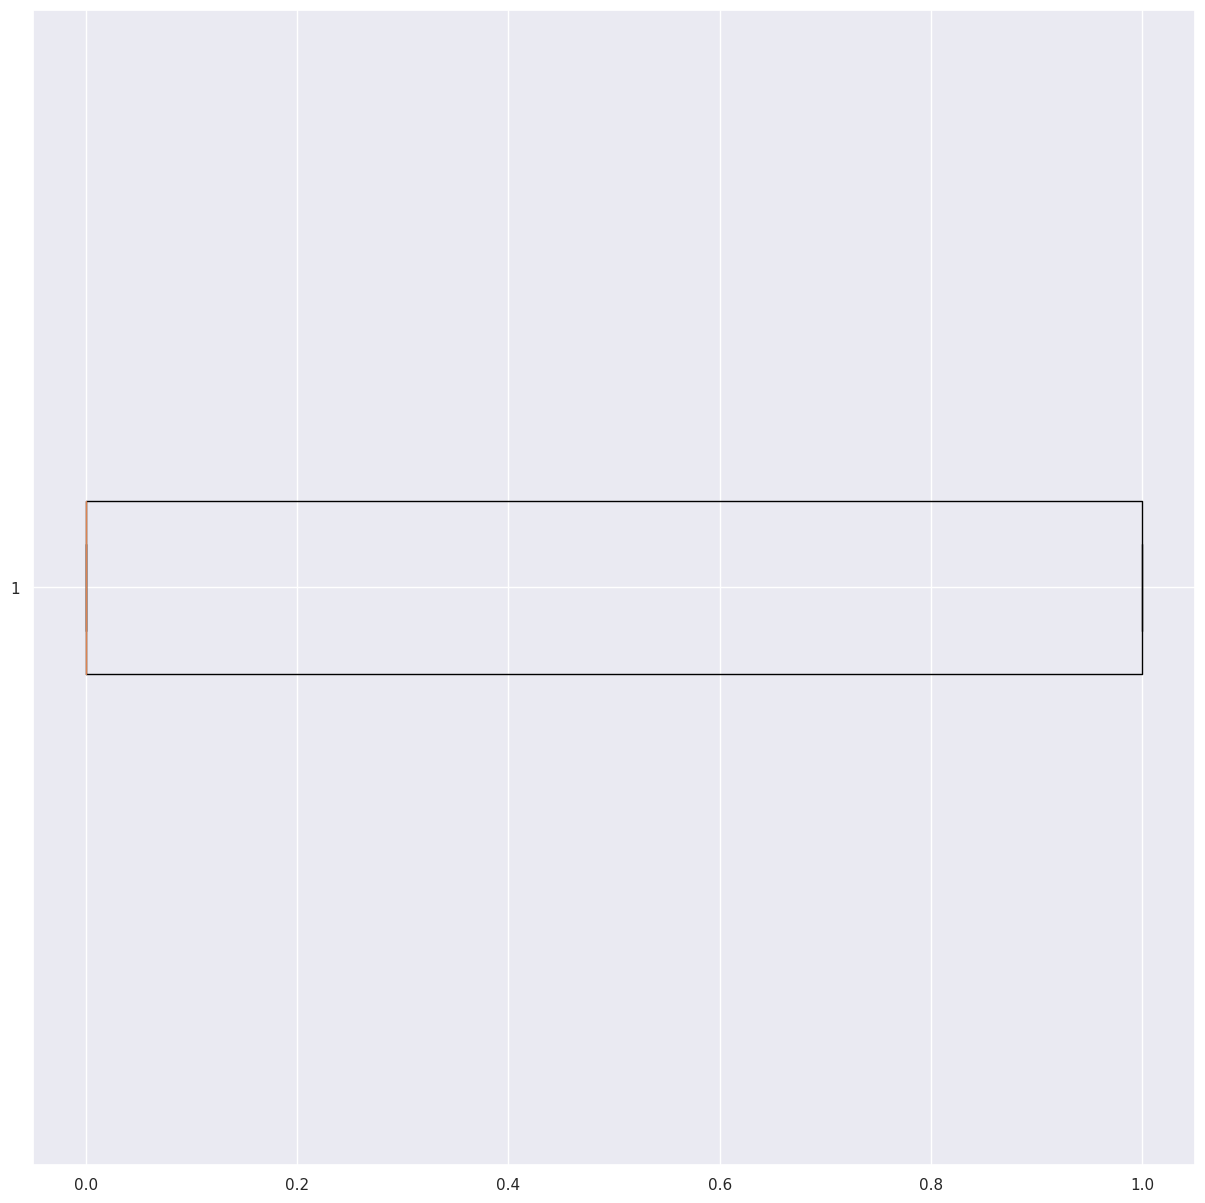

In [44]:
plt.boxplot(x=data['Pimples(Y/N)'], vert=False, flierprops=red_circle);

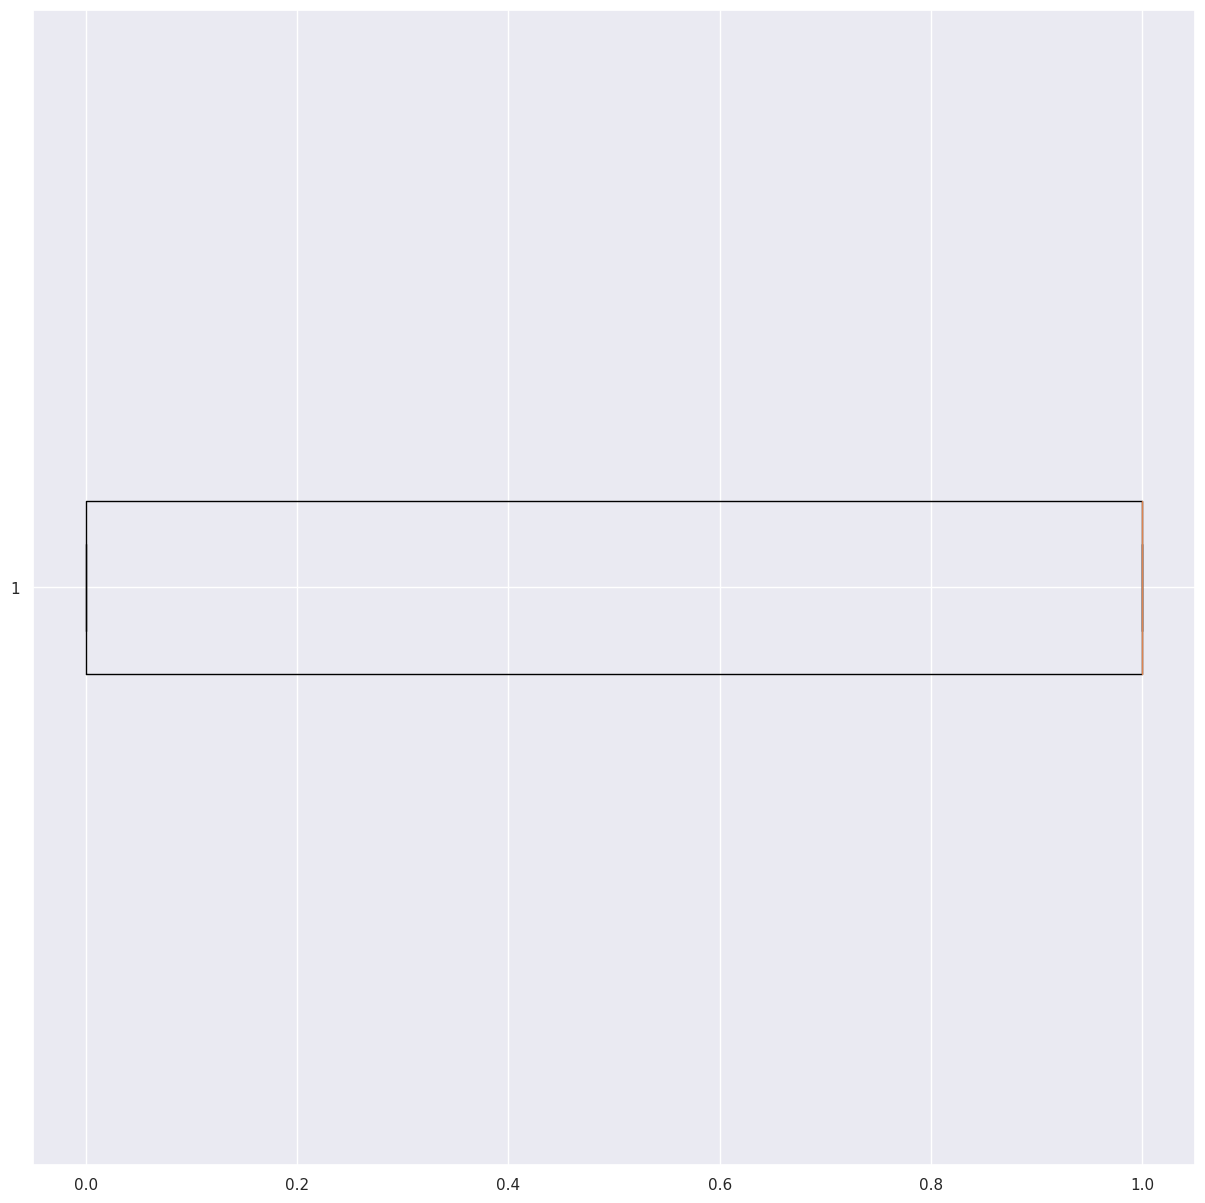

In [45]:
plt.boxplot(x=data['Fast food (Y/N)'], vert=False, flierprops=red_circle);

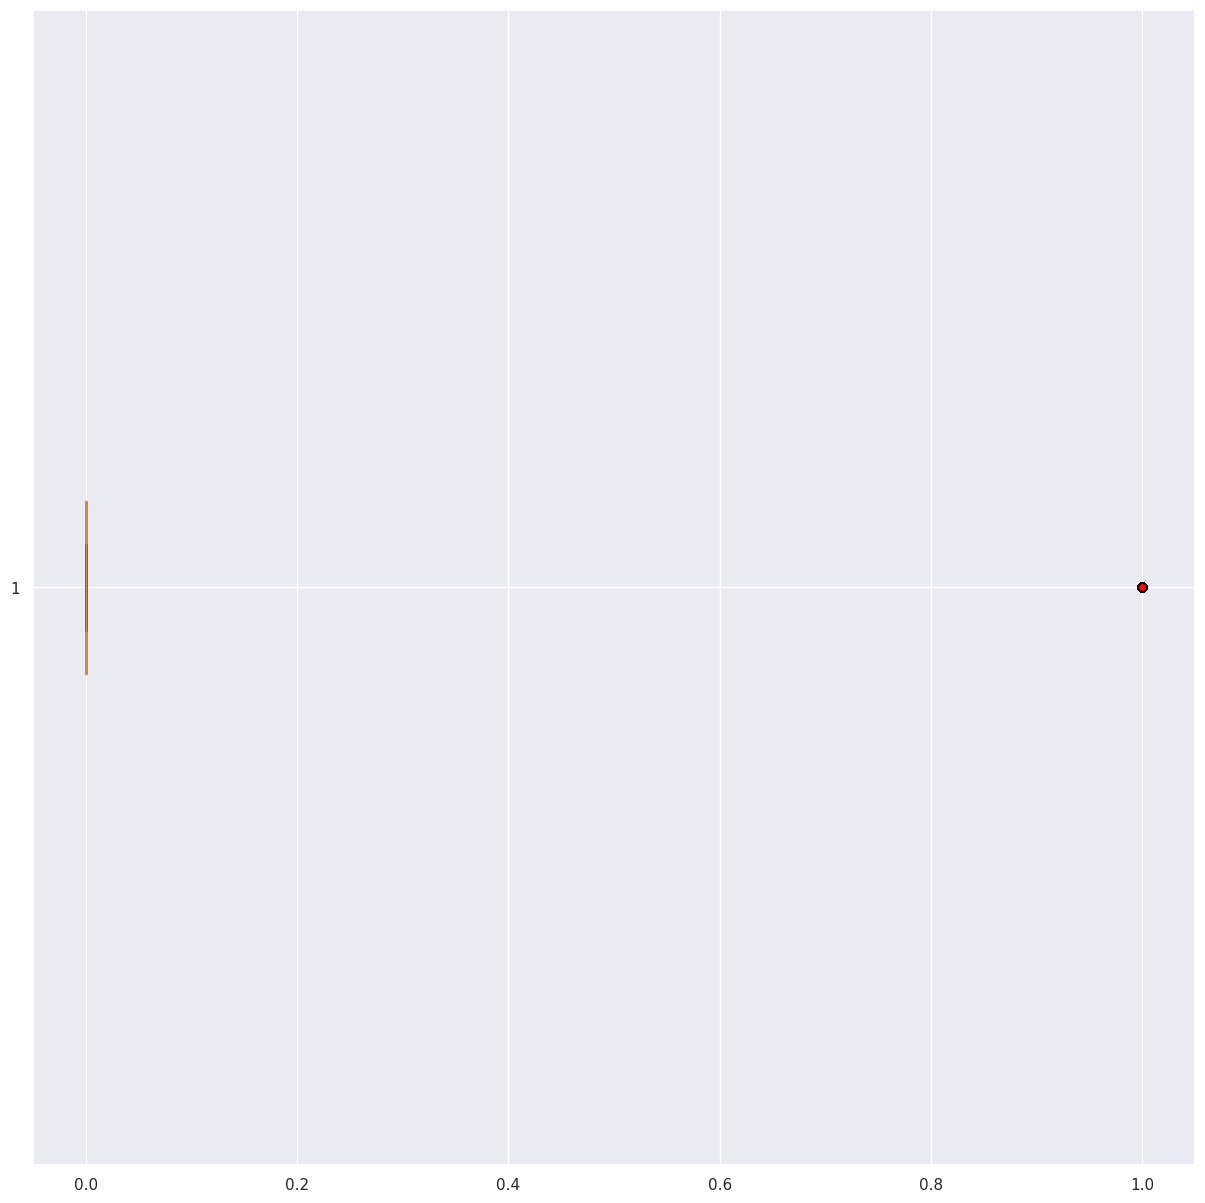

In [46]:
plt.boxplot(x=data['Reg.Exercise(Y/N)'], vert=False, flierprops=red_circle);

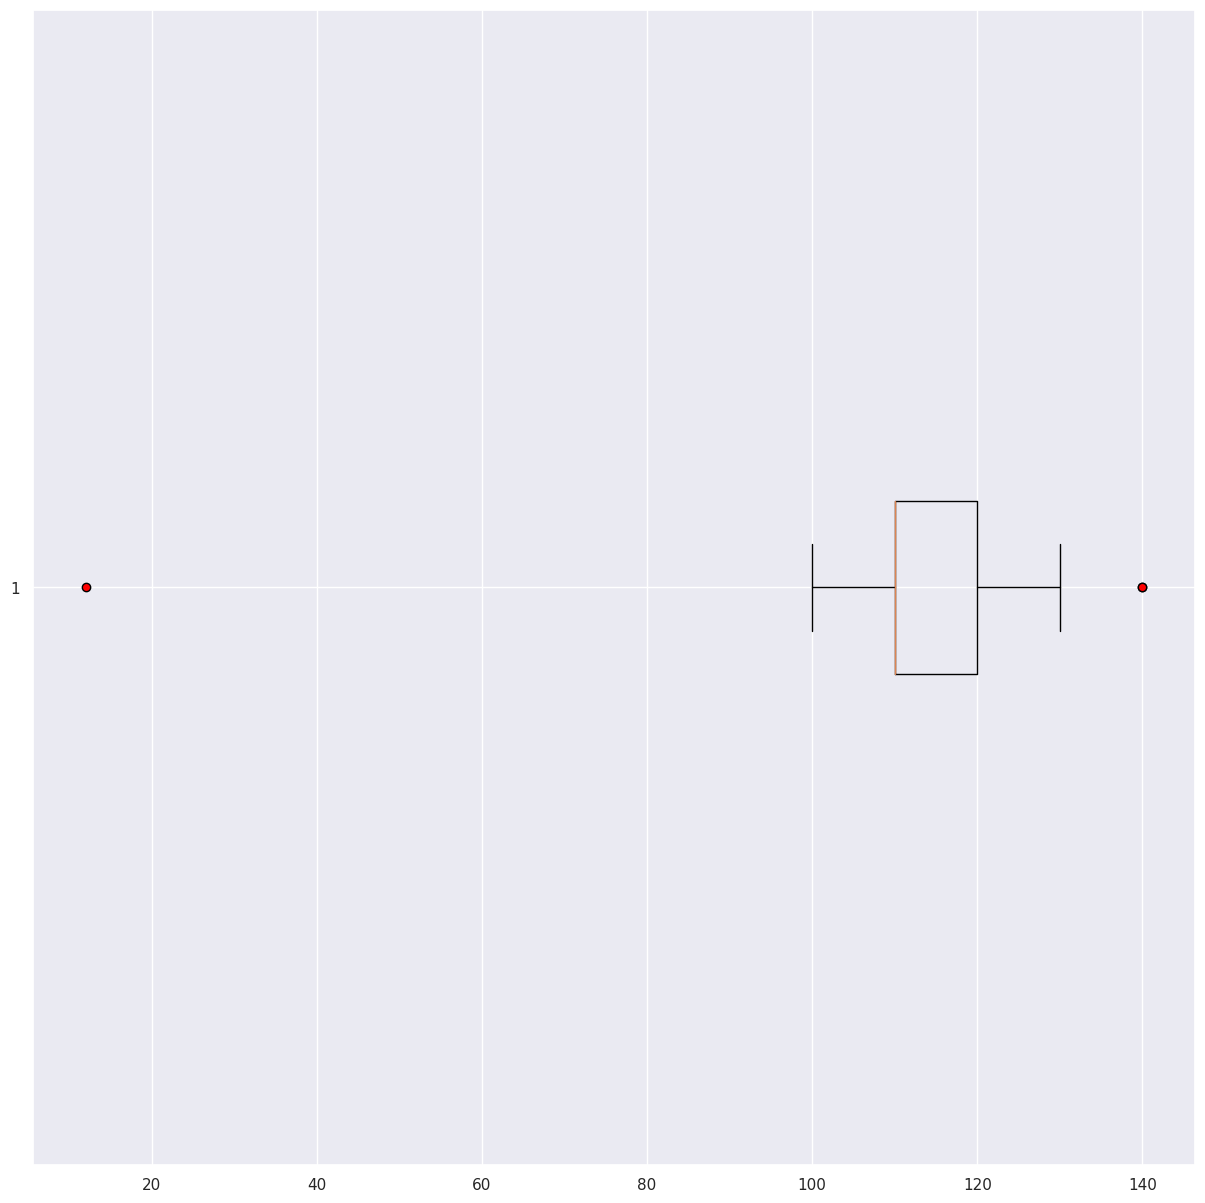

In [47]:
plt.boxplot(x=data['BP _Systolic (mmHg)'], vert=False, flierprops=red_circle);

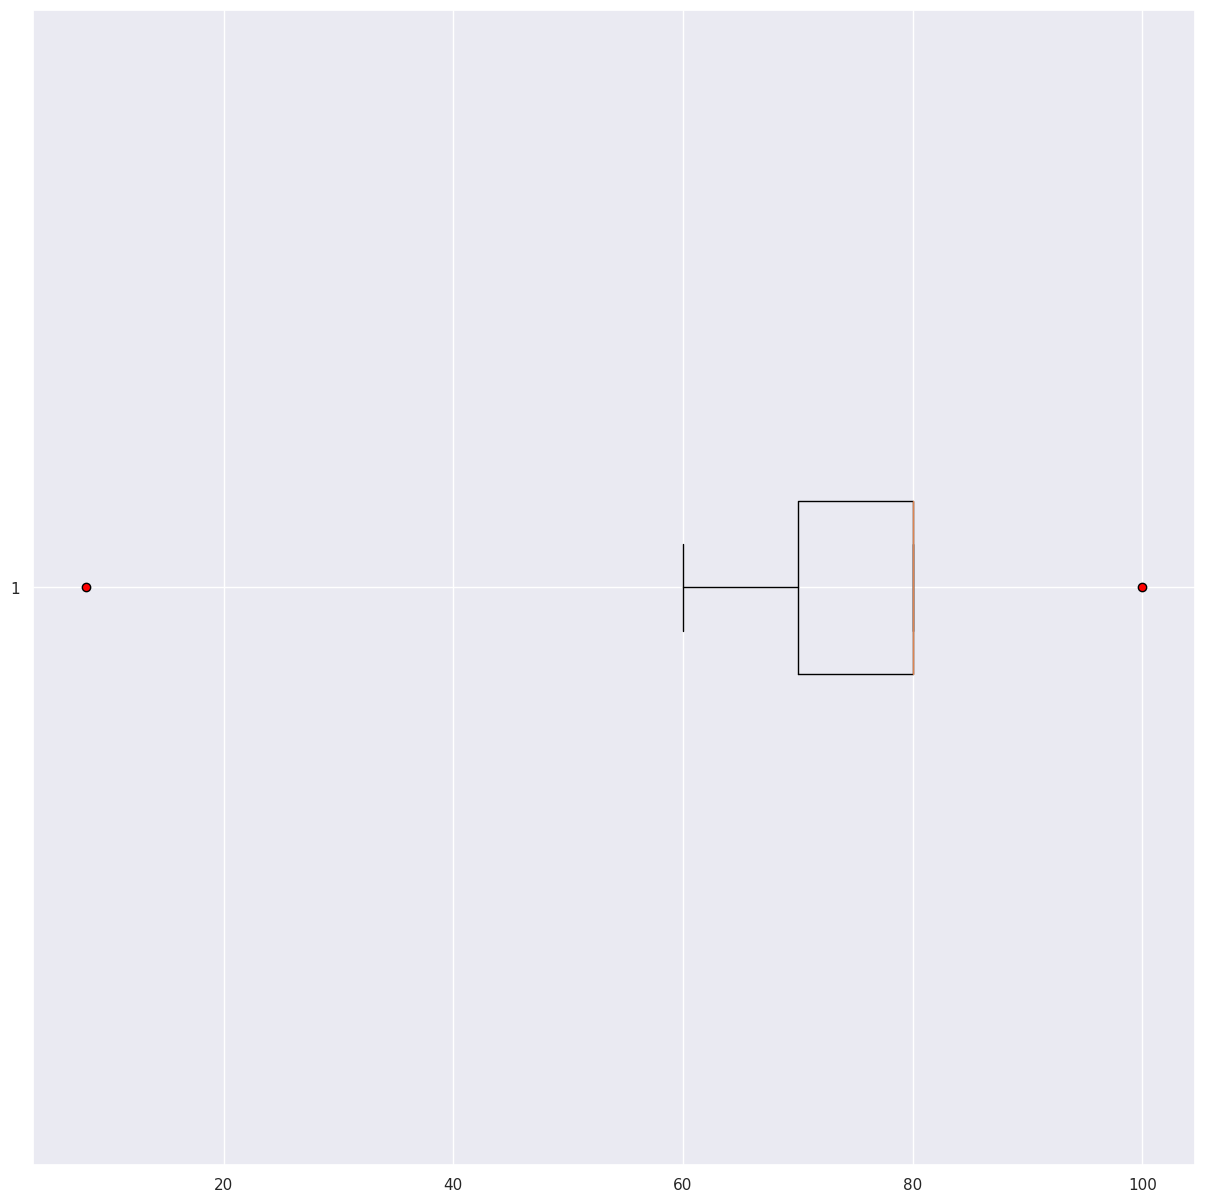

In [48]:
plt.boxplot(x=data['BP _Diastolic (mmHg)'], vert=False, flierprops=red_circle);

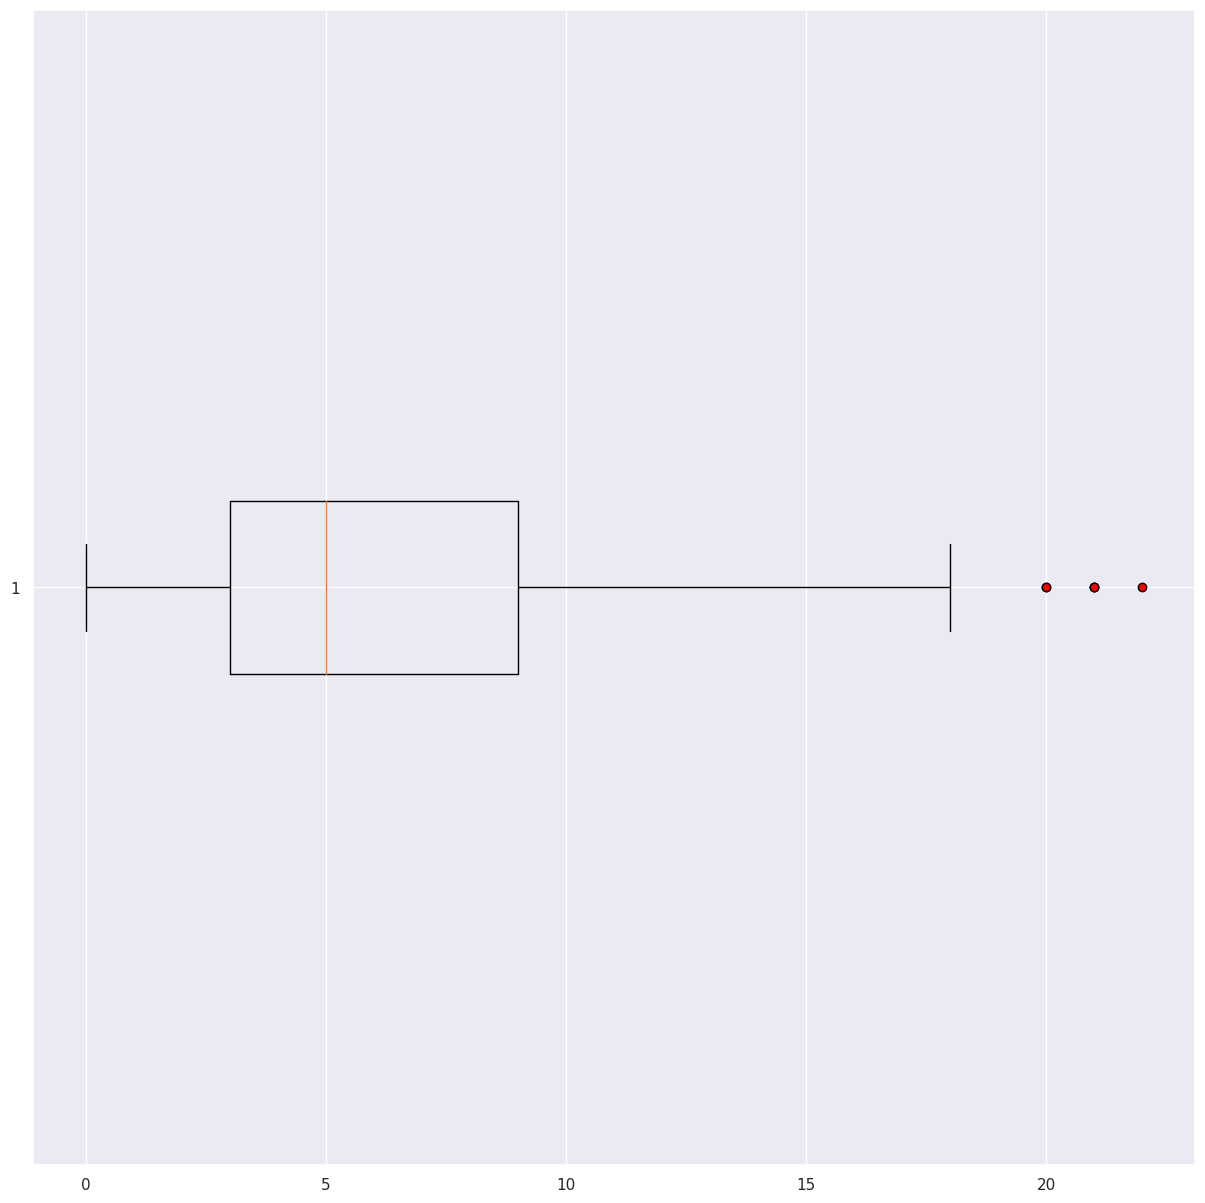

In [49]:
plt.boxplot(x=data['Follicle No. (L)'], vert=False, flierprops=red_circle);

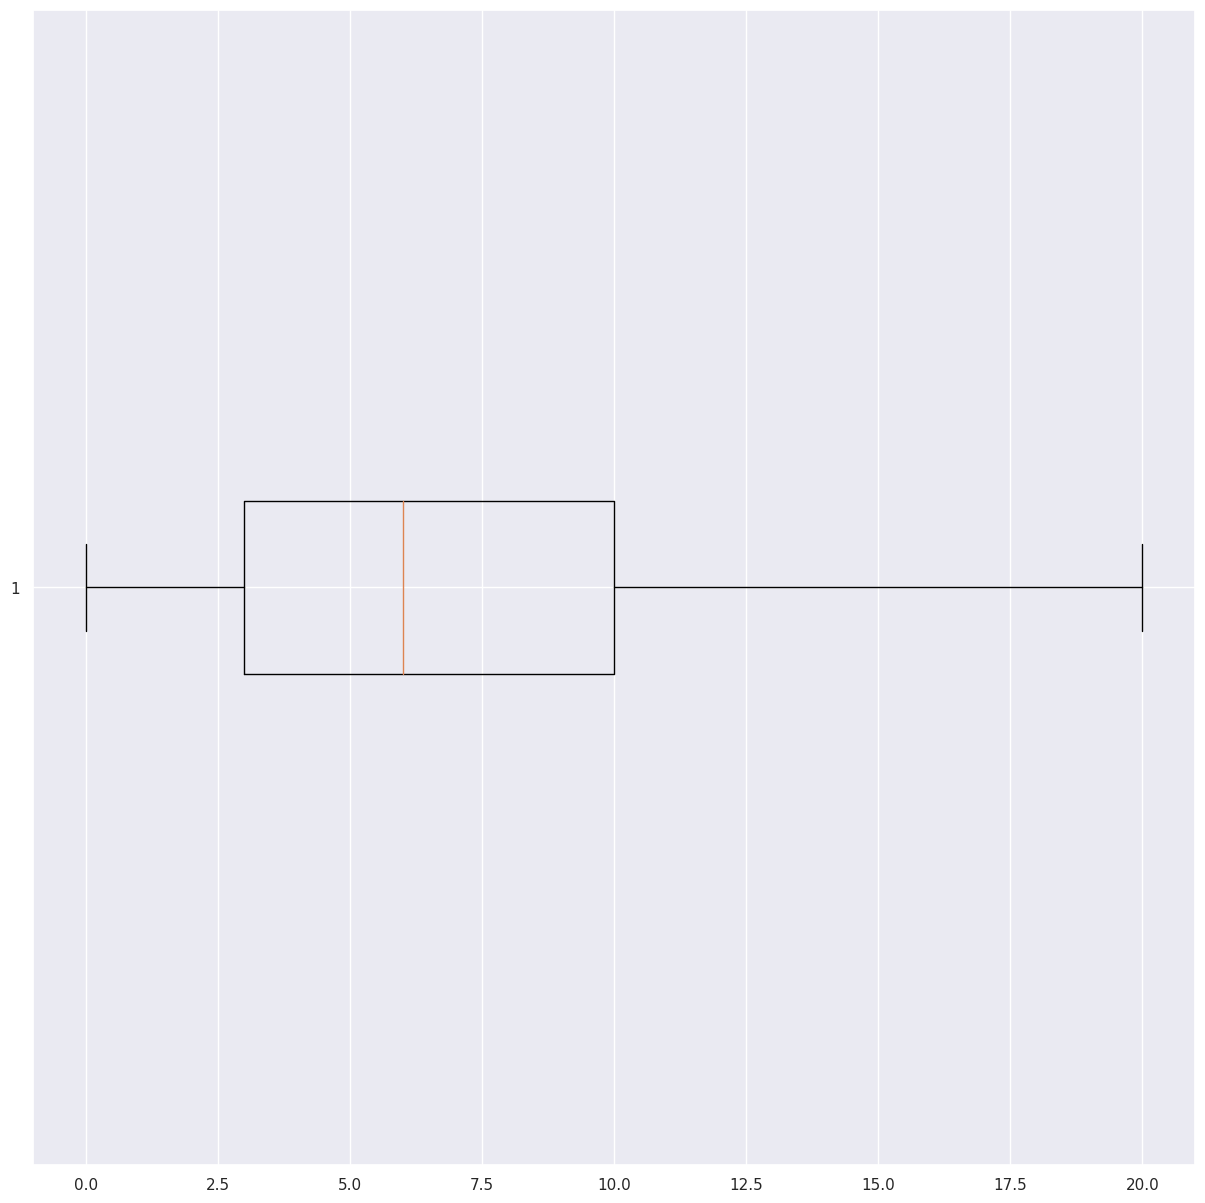

In [50]:
plt.boxplot(x=data['Follicle No. (R)'], vert=False, flierprops=red_circle);

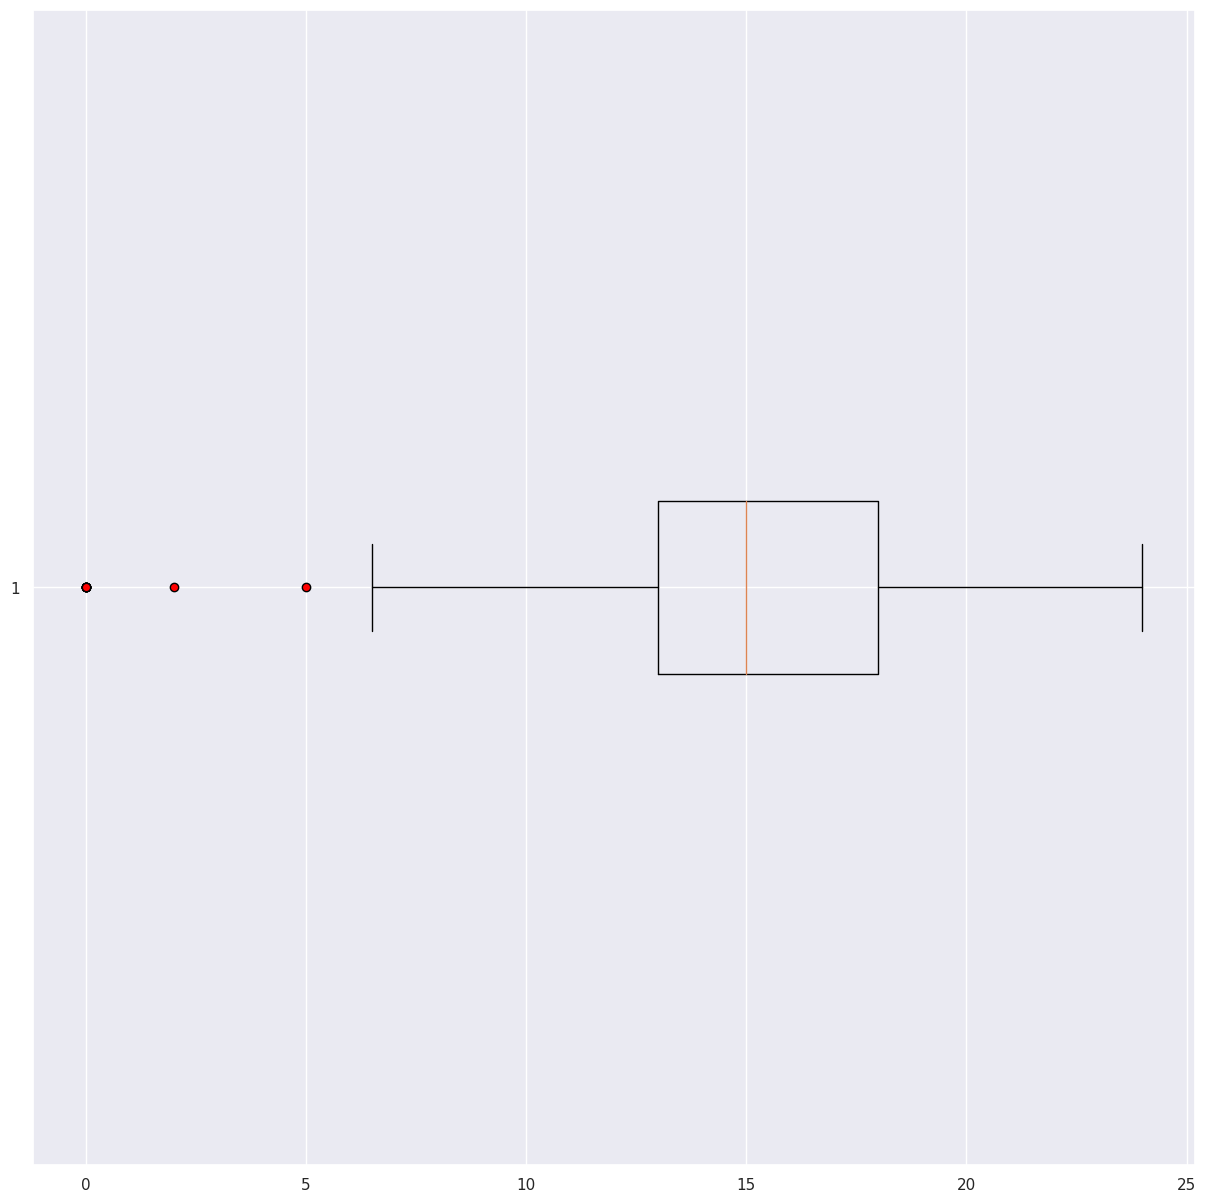

In [51]:
plt.boxplot(x=data['Avg. F size (L) (mm)'], vert=False, flierprops=red_circle);

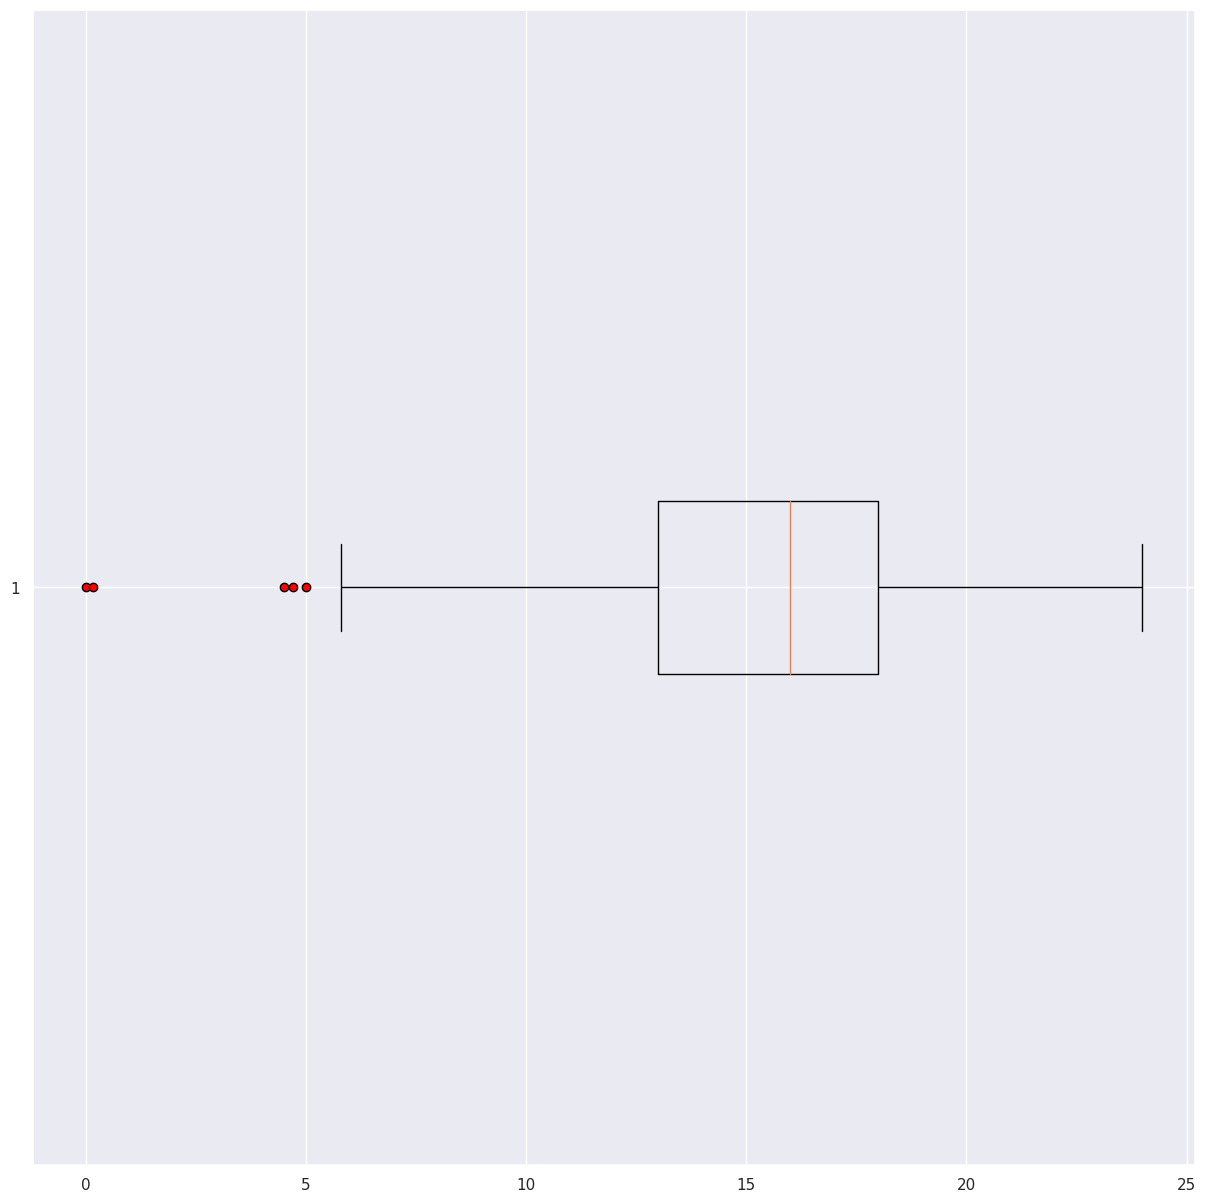

In [52]:
plt.boxplot(x=data['Avg. F size (R) (mm)'], vert=False, flierprops=red_circle);

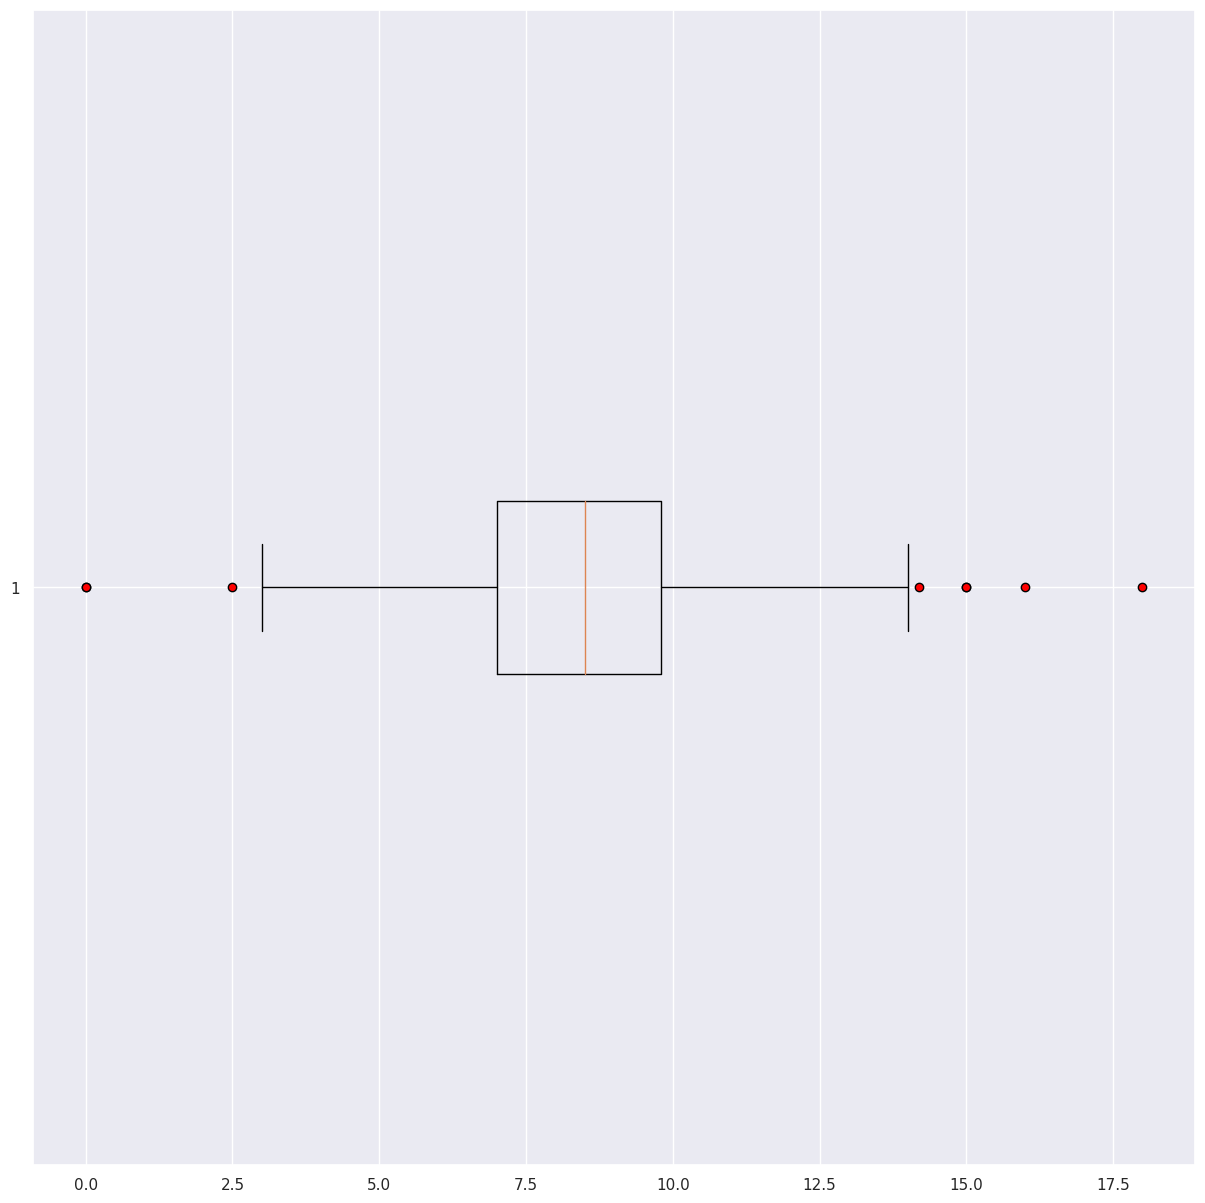

In [53]:
plt.boxplot(x=data['Endometrium (mm)'], vert=False, flierprops=red_circle);

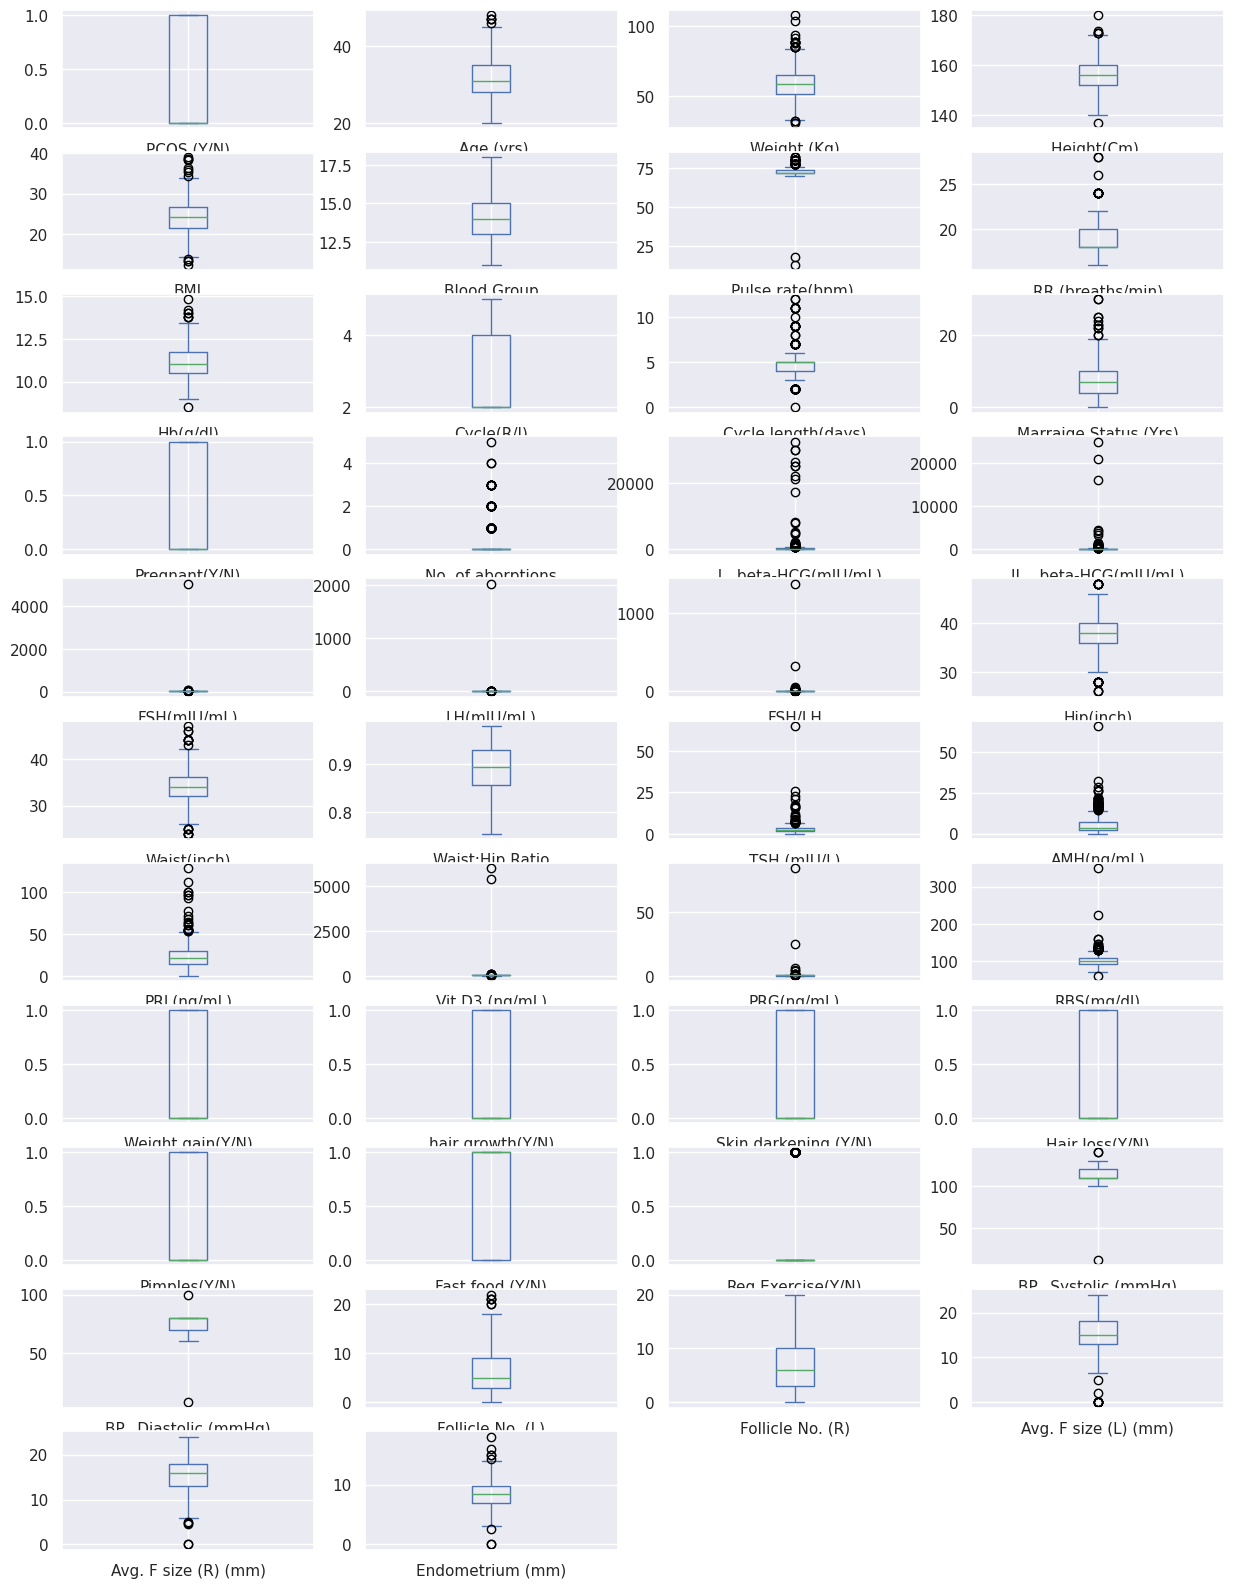

In [54]:
data.plot(kind="box",subplots=True,layout=(11,4),figsize=(15,20));

/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 90.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 81.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 91.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 82.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


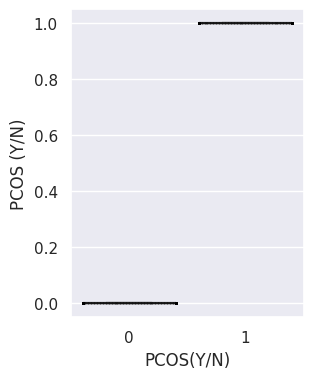

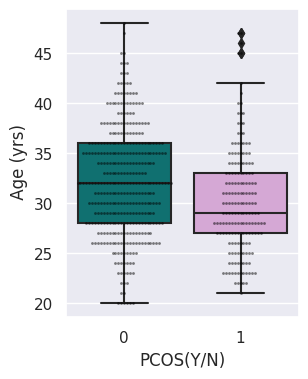

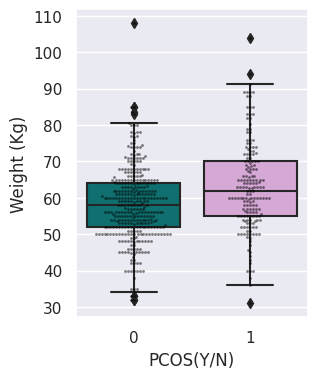

/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 8.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


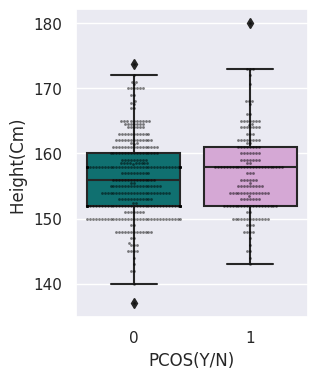

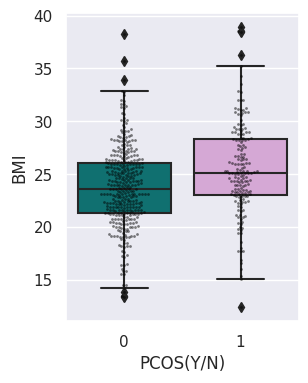

/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 57.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 24.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 58.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 27.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


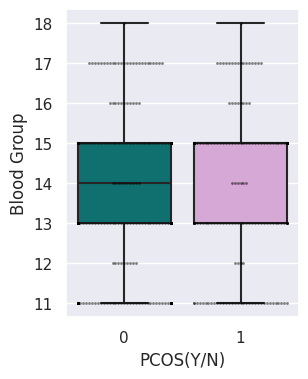

/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 53.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 31.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 55.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 33.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


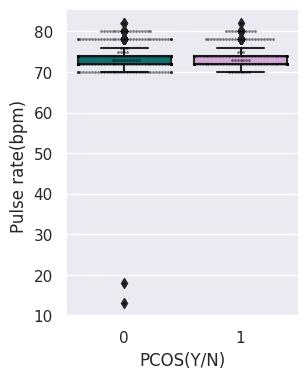

/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 68.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 48.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 69.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 50.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


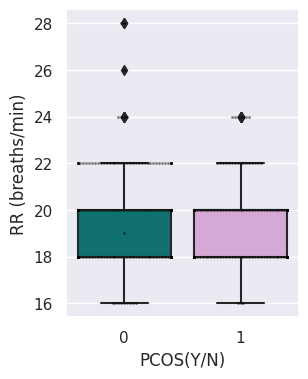

/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


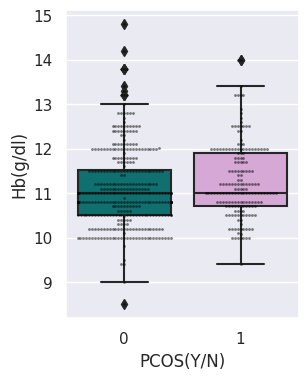

/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 81.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 62.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 83.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 64.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


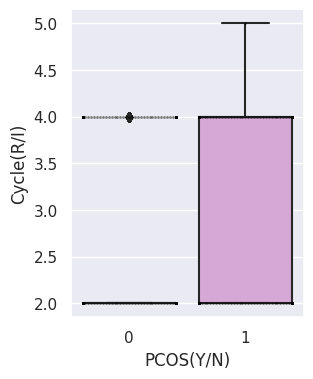

/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 62.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 19.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 63.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 21.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


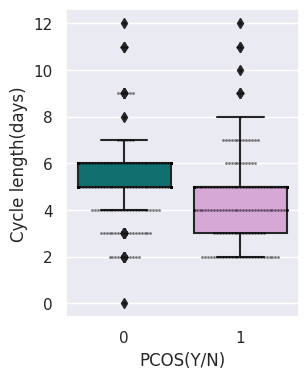

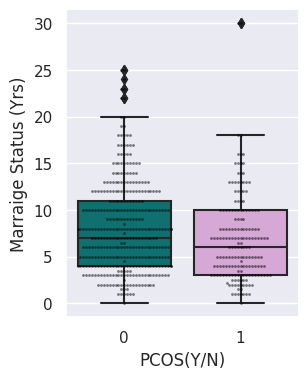

/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 81.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 62.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 83.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 65.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


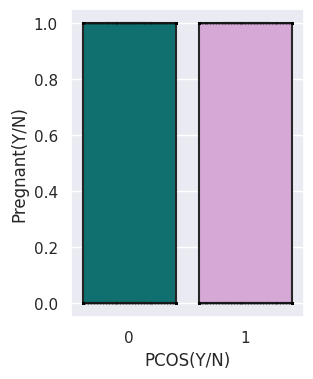

/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 74.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 63.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 75.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 65.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


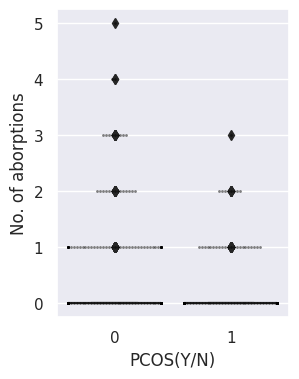

/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 69.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 50.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 70.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 51.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


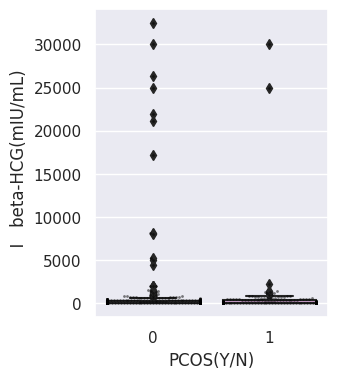

/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 75.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 63.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 75.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 65.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


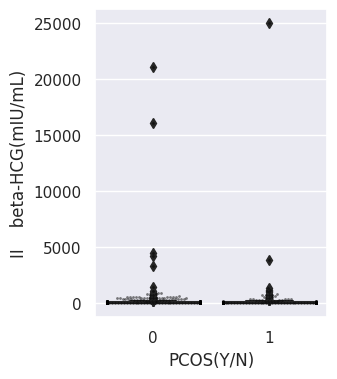

/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 90.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 80.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 90.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 81.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


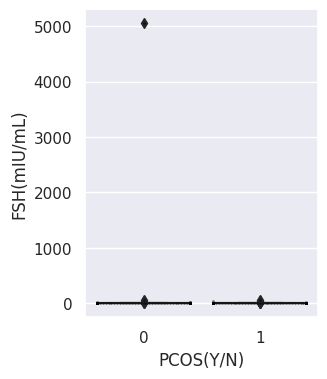

/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 90.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 80.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 91.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 81.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


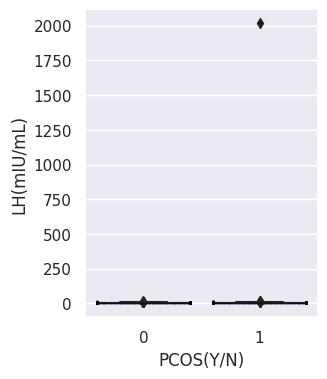

/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 85.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 77.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 85.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 78.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


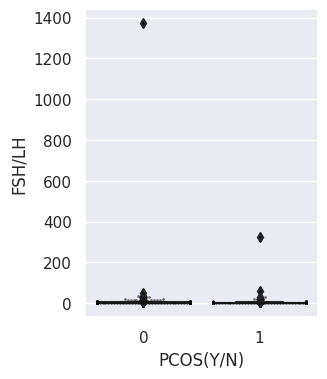

/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 15.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 18.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


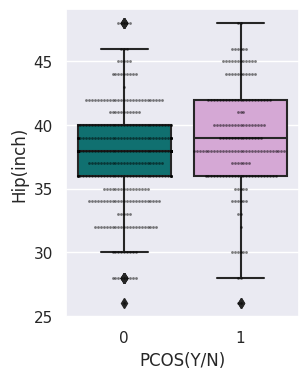

/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 20.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 23.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


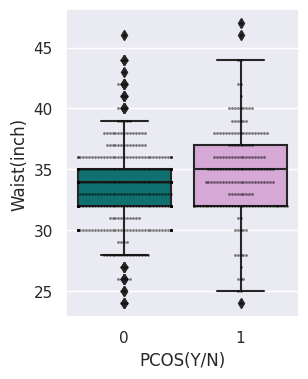

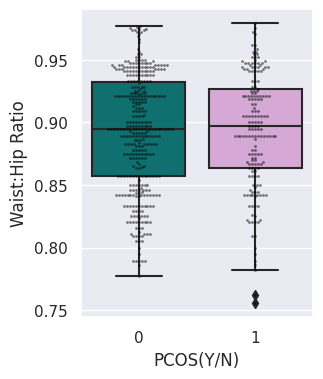

/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 29.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


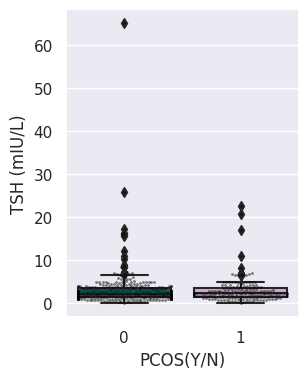

/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 11.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


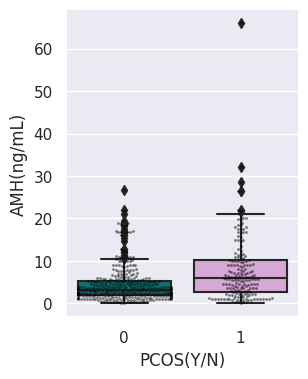

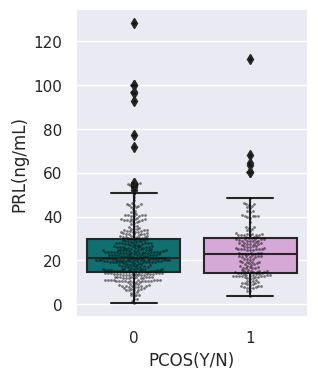

/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 88.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 76.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 89.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 77.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


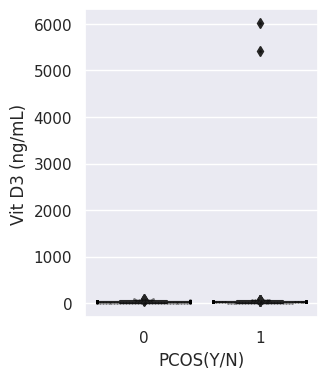

/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 85.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 78.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 85.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 79.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


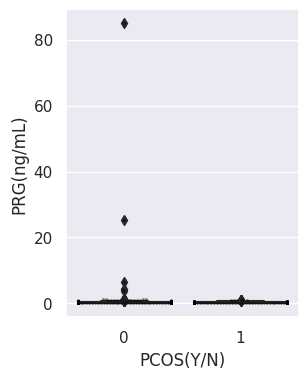

/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 31.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


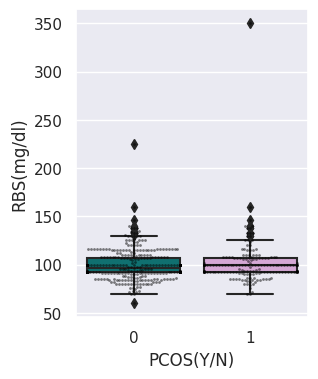

/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 81.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 62.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 83.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 65.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


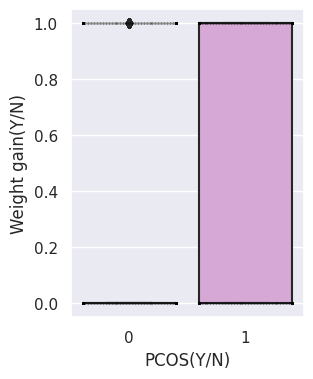

/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 81.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 62.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 83.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 65.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


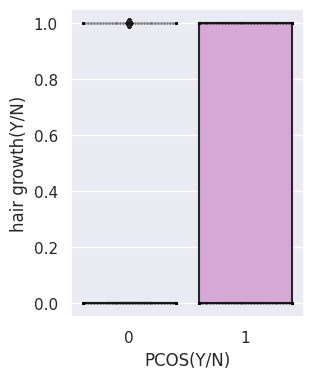

/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 81.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 62.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 83.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 65.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


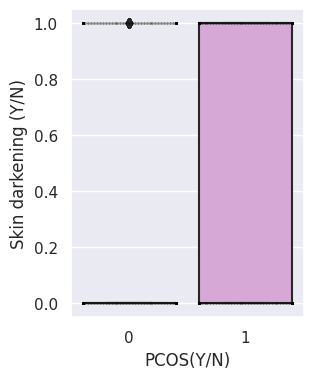

/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 81.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 62.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 83.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 65.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


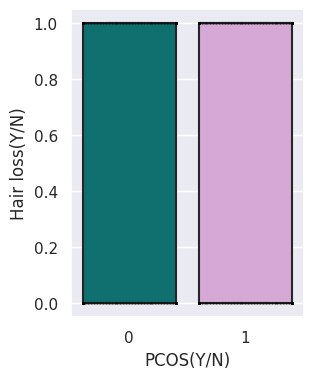

/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 81.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 62.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 83.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 65.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


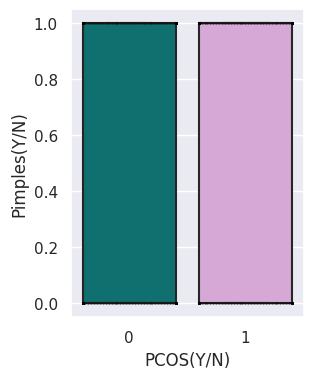

/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 81.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 62.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 83.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 65.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


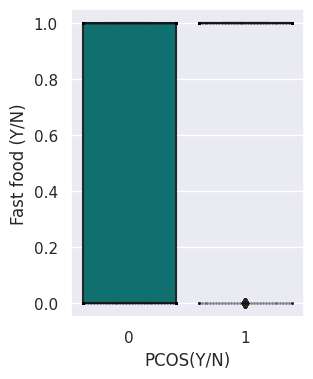

/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 81.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 62.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 83.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 65.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


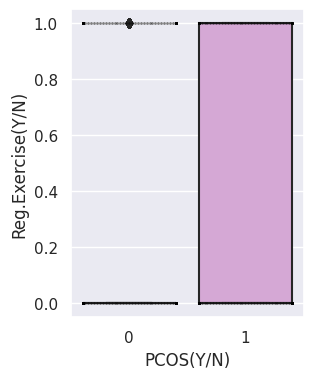

/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 76.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 59.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 78.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 61.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


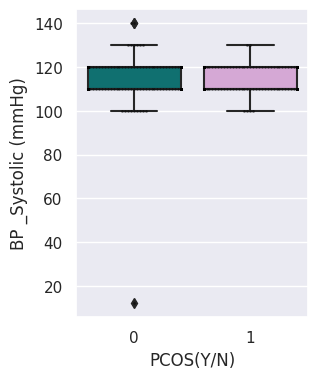

/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 81.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 62.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 82.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 65.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


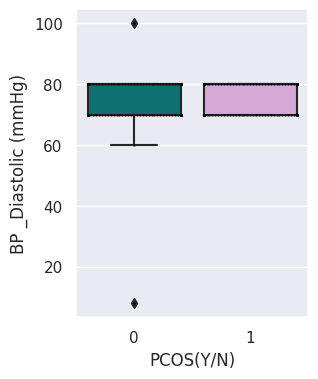

/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 22.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 25.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


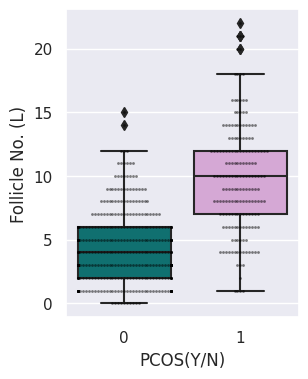

/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 20.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 23.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


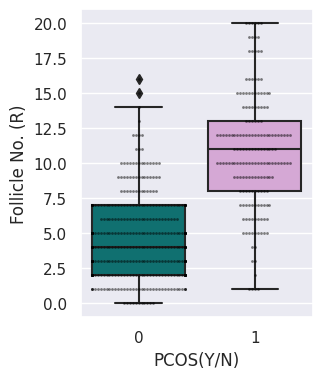

/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 9.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


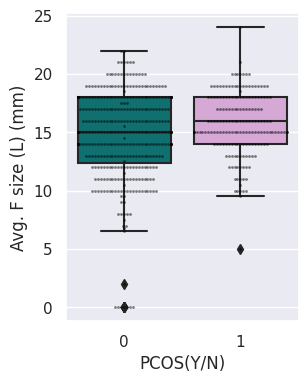

/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 12.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


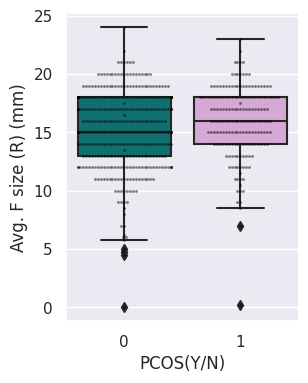

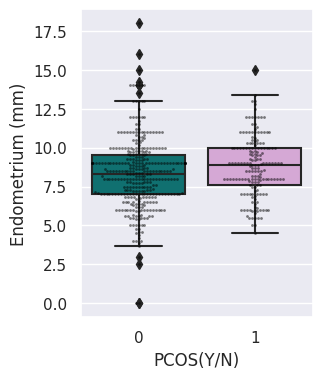

In [17]:
import pandas as pd
import numpy as np
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns
color = ["teal", "plum"]
sns.set(rc={"figure.figsize":(3, 4)})
a = list(data.columns)
for i in a:
    ax = sns.boxplot(x=data["PCOS (Y/N)"], y=data[i],palette=color)
    ax = sns.swarmplot(x=data["PCOS (Y/N)"], y=data[i], size = 2, color="black", alpha=0.5 )
    plt.rcParams["figure.dpi"] = 100
    plt.xlabel("PCOS(Y/N)", size=12)
    plt.ylabel(i, size=12)
    plt.show()

In [17]:
X_new = data

In [18]:
# identify outliers with interquartile range
from numpy.random import seed
from mlxtend.frequent_patterns import apriori, association_rules
from numpy.random import randn
from numpy import percentile
for col in X_new.columns :
    q25, q75 = percentile(X_new[col], 25), percentile(X_new[col], 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off

    # identify outliers
    outliers = [x for x in data[col] if x < lower or x > upper and iqr > 40]
    print("-------"+ col + "------")
    print('Identified outliers: %d' % len(outliers))
    # remove outliers
    outliers_removed = [x for x in X_new[col] if x >= lower and x <= upper]
    X_new = X_new[X_new[col].isin(outliers) == False]
    print(outliers)
    print('Non-outlier observations: in %d' % (len(outliers_removed)))
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

-------PCOS (Y/N)------
Identified outliers: 0
[]
Non-outlier observations: in 541
Percentiles: 25th=0.000, 75th=1.000, IQR=1.000
------- Age (yrs)------
Identified outliers: 0
[]
Non-outlier observations: in 536
Percentiles: 25th=28.000, 75th=35.000, IQR=7.000
-------Weight (Kg)------
Identified outliers: 3
[31.0, 32.0, 32.0]
Non-outlier observations: in 523
Percentiles: 25th=52.000, 75th=65.000, IQR=13.000
-------Height(Cm) ------
Identified outliers: 1
[137.0]
Non-outlier observations: in 532
Percentiles: 25th=152.000, 75th=160.000, IQR=8.000
-------BMI------
Identified outliers: 7
[13.38796706, 12.41788175, 13.49300051, 14.283241, 14.52432825, 14.56815817, 13.85041551]
Non-outlier observations: in 525
Percentiles: 25th=21.834, 75th=26.635, IQR=4.801
-------Blood Group------
Identified outliers: 0
[]
Non-outlier observations: in 533
Percentiles: 25th=13.000, 75th=15.000, IQR=2.000
-------Pulse rate(bpm) ------
Identified outliers: 2
[18, 13]
Non-outlier observations: in 441
Percenti

In [19]:
print((X_new["PCOS (Y/N)"]))

0      0
1      0
2      1
3      0
5      0
      ..
534    0
535    0
537    0
538    0
540    1
Name: PCOS (Y/N), Length: 338, dtype: int64


338


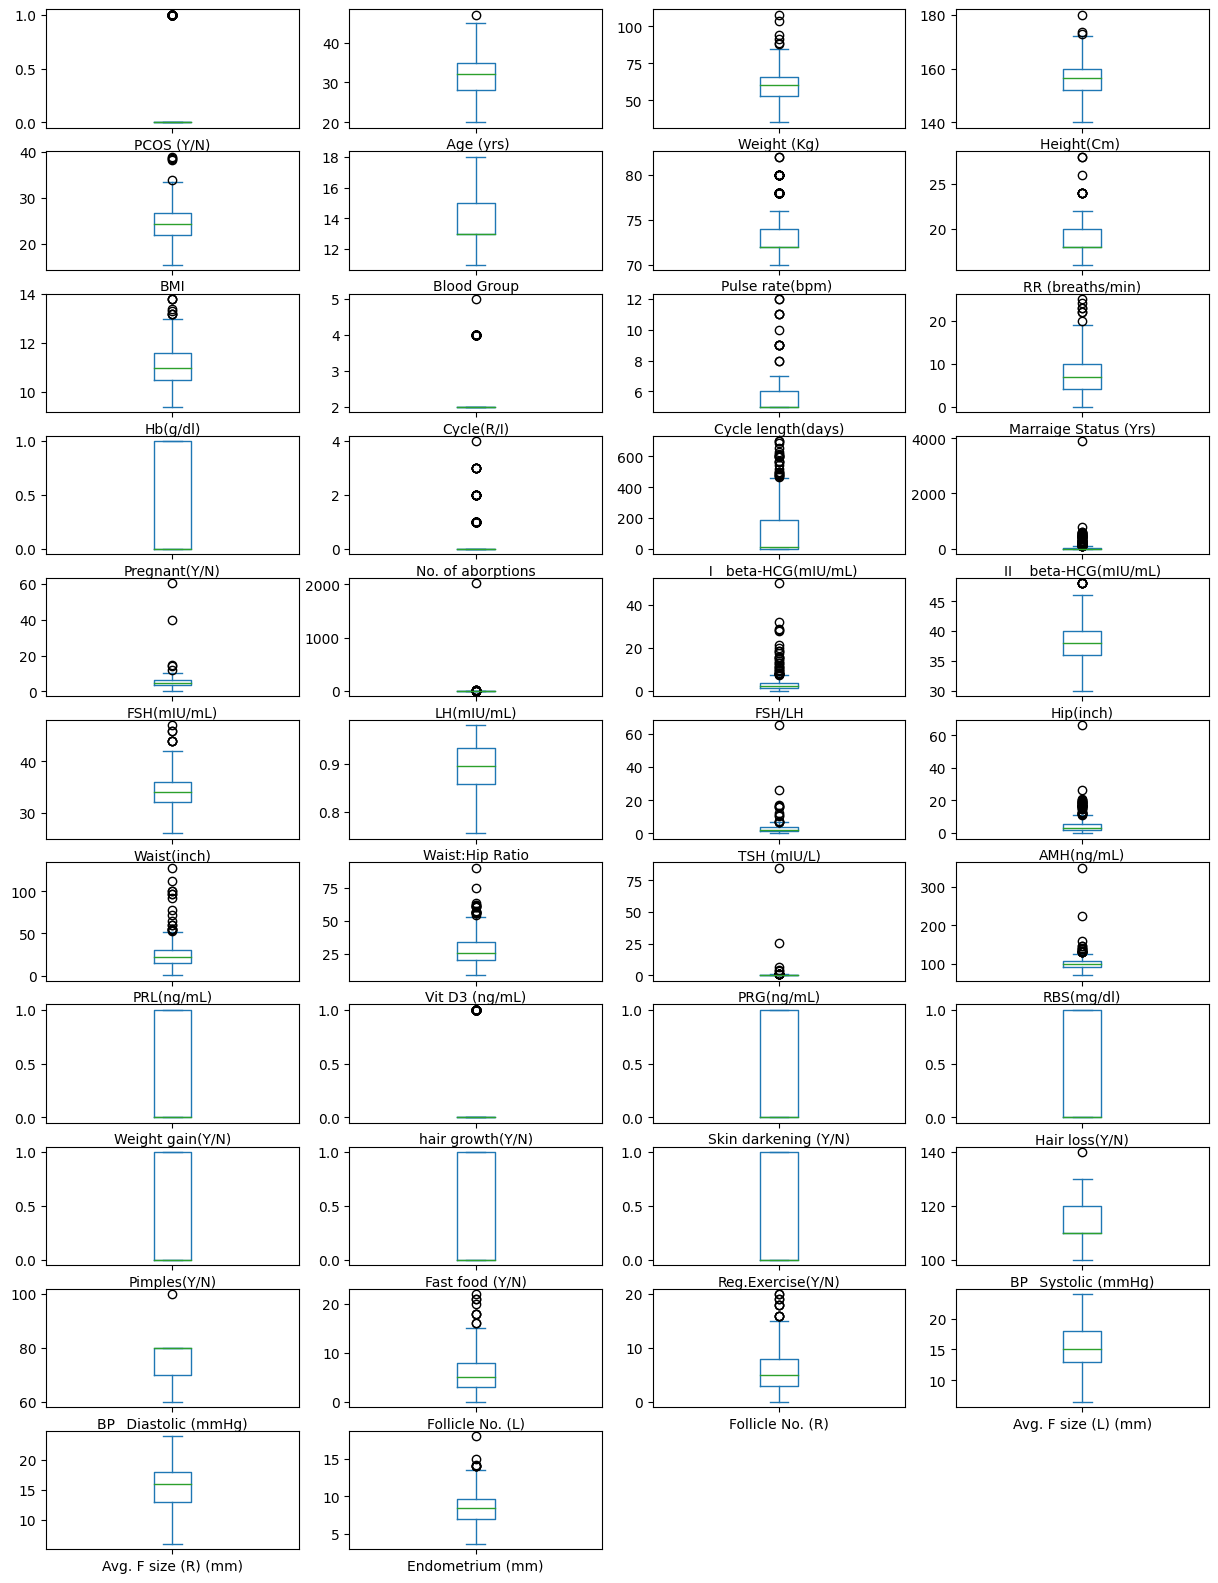

In [20]:
data_New =  X_new
data_New.plot(kind="box",subplots=True,layout=(11,4),figsize=(15,20));
print(len(data_New))

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 87.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 59.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 87.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 62.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

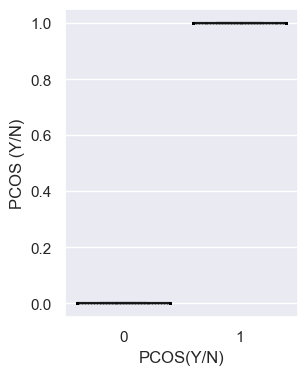

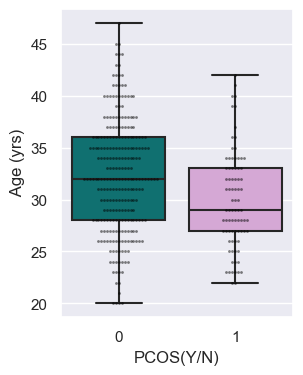

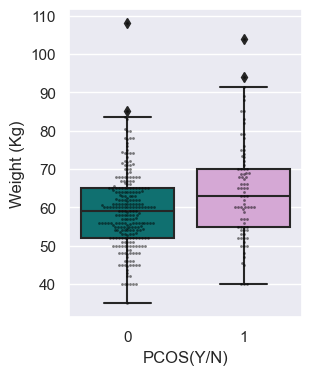

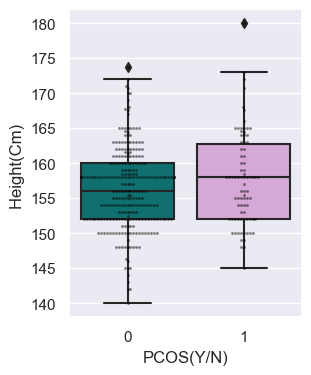

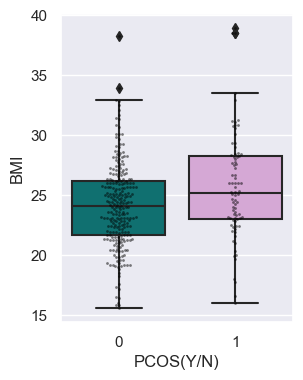

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 46.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 48.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


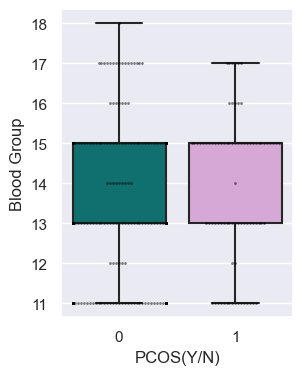

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 46.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 9.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 48.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 12.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, Us

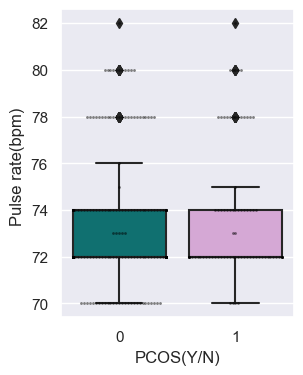

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 57.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 59.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, Use

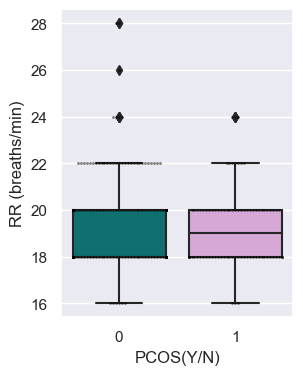

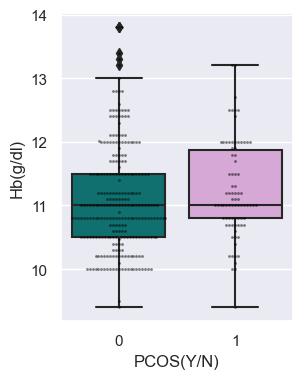

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 80.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 28.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 81.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 30.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

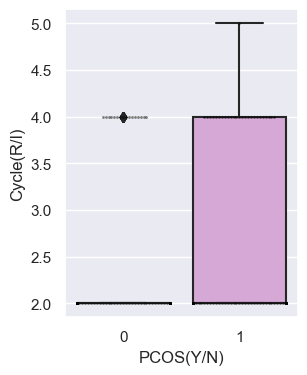

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 69.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 26.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 71.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 29.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

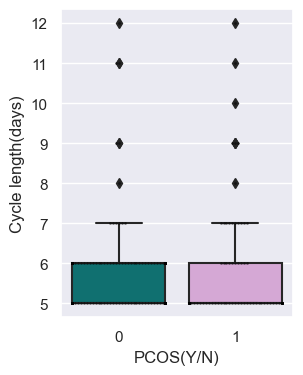

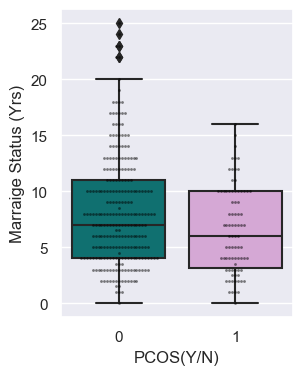

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 74.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 31.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 75.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 34.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

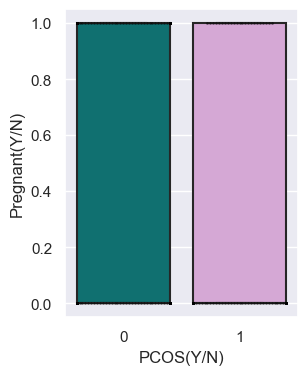

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 68.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 41.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 68.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 43.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

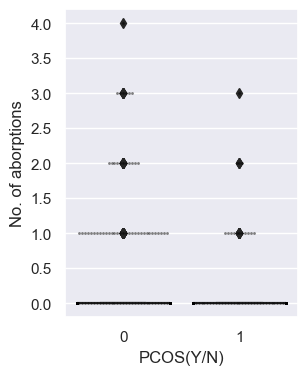

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 35.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 35.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


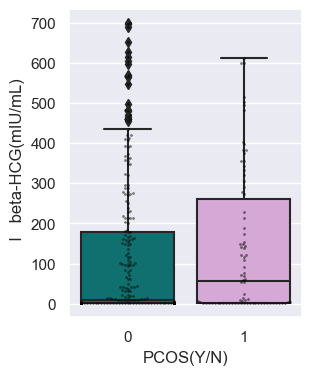

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 59.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 39.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 60.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 41.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

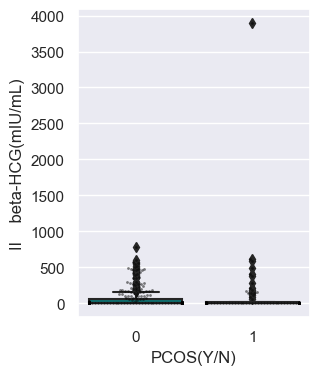

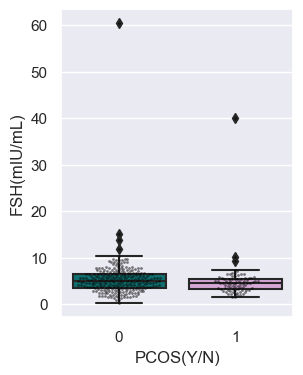

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 87.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 58.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 87.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 61.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

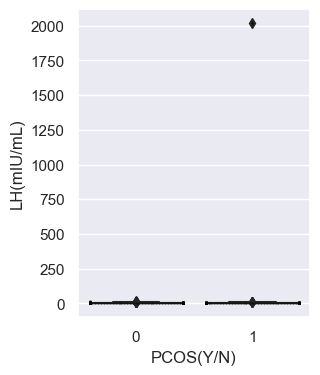

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


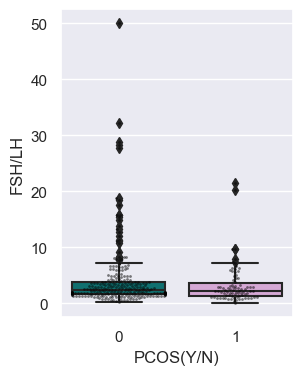

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 10.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


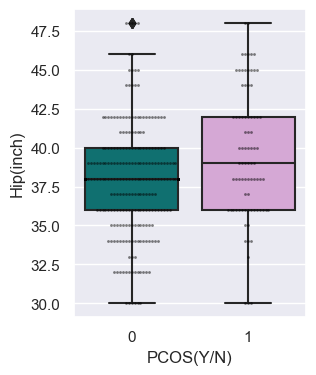

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


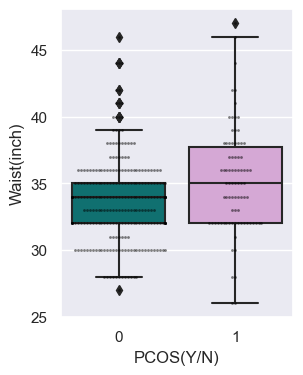

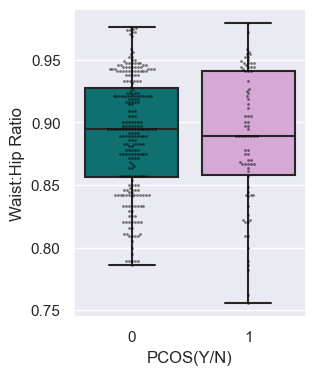

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 14.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


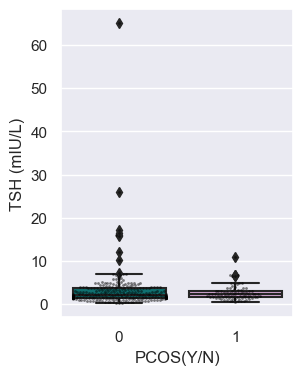

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


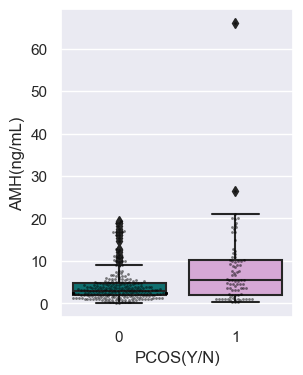

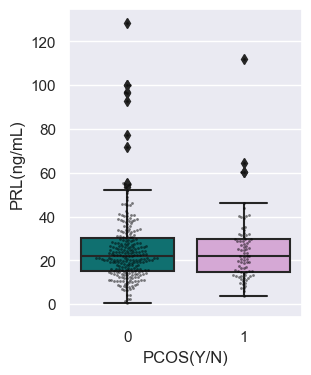

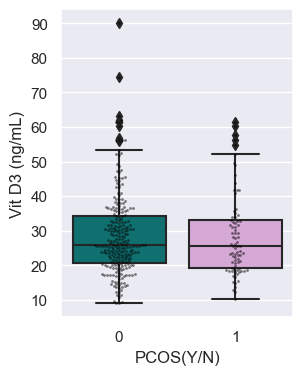

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 81.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 57.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 82.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 59.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

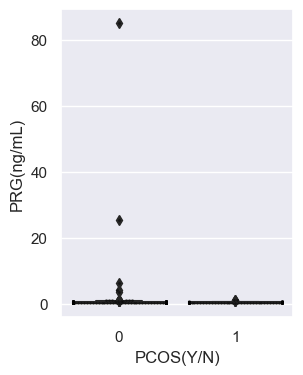

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 25.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 25.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


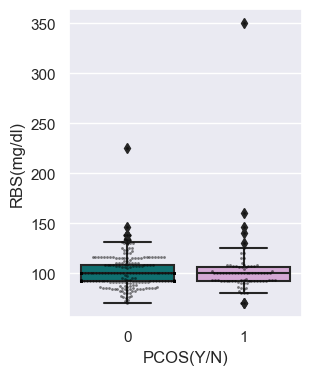

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 74.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 20.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 75.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

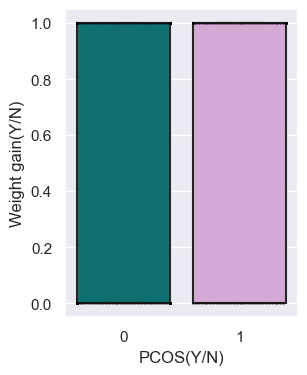

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 74.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 19.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 75.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

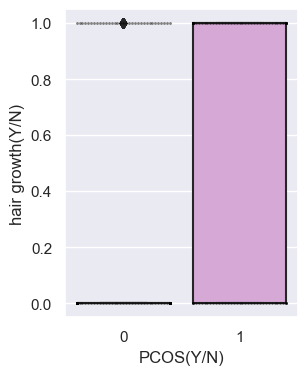

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 74.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 23.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 75.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 25.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

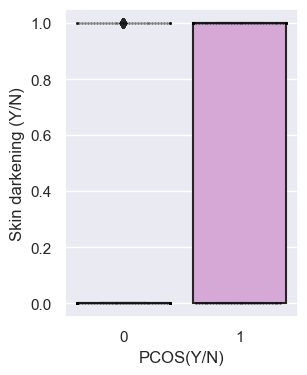

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 74.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 19.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 75.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

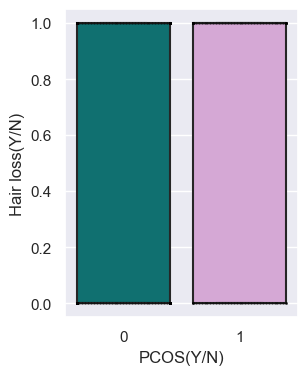

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 74.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 75.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 26.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

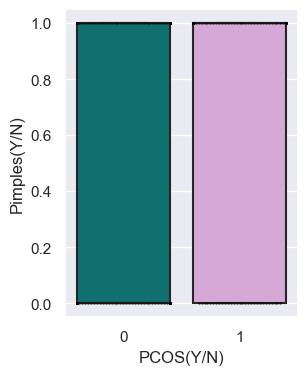

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 74.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 36.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 75.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 39.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

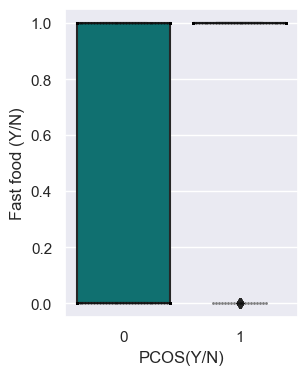

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 74.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 25.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 75.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 28.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

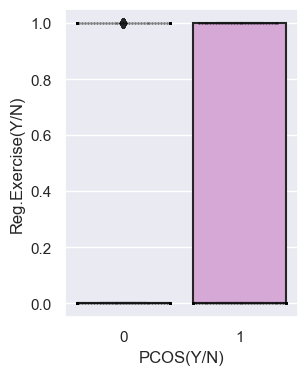

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 71.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 15.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 72.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 20.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

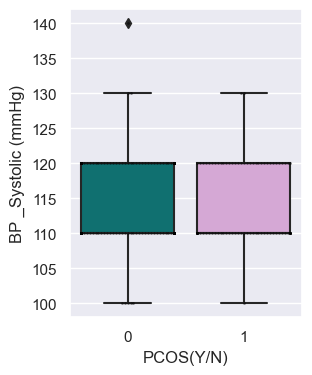

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 73.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 26.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

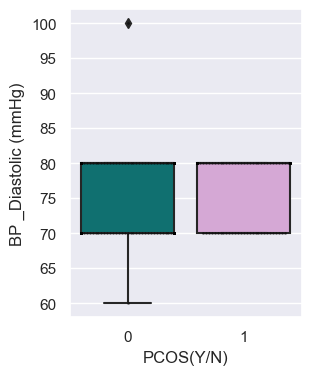

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


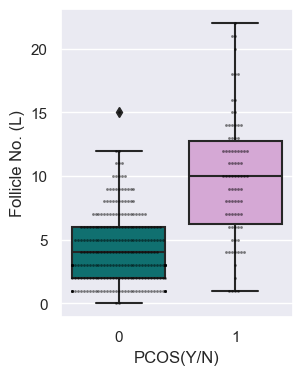

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3543: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


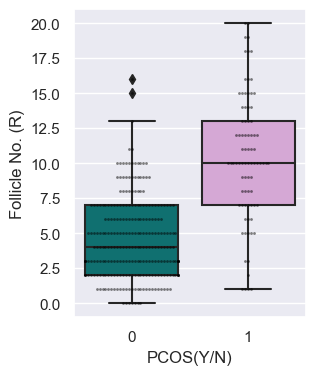

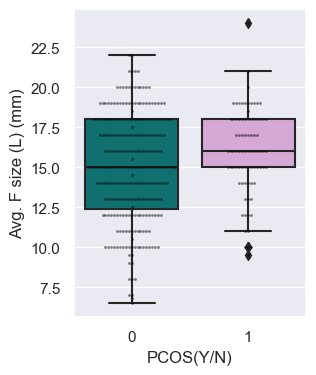

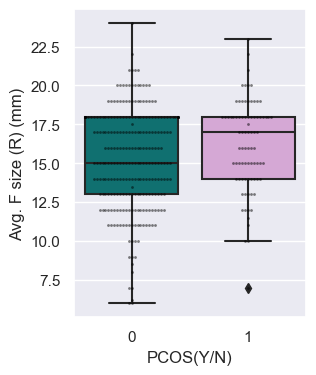

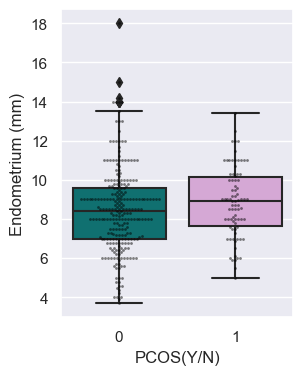

In [21]:
import pandas as pd
import numpy as np
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns
color = ["teal", "plum"]
sns.set(rc={"figure.figsize":(3, 4)})
a = list(data_New.columns)
for i in a:
    ax = sns.boxplot(x=data_New["PCOS (Y/N)"], y=data_New[i],palette=color)
    ax = sns.swarmplot(x=data_New["PCOS (Y/N)"], y=data_New[i], size = 2, color="black", alpha=0.5 )
    plt.rcParams["figure.dpi"] = 100
    plt.xlabel("PCOS(Y/N)", size=12)
    plt.ylabel(i, size=12)
    plt.show()

In [22]:
X=data_New.drop(["PCOS (Y/N)"],axis = 1) #droping out class
y=data_New["PCOS (Y/N)"]
print(len(X))

338


[0.01802006 0.01802653 0.01583745 0.01391125 0.01037751 0.01669155
 0.01360666 0.01406573 0.03443325 0.01457827 0.01765775 0.01044793
 0.00848805 0.01534263 0.01096583 0.01247679 0.01956024 0.01189999
 0.03050261 0.01631533 0.01721617 0.01316352 0.02468425 0.01382918
 0.01135562 0.01332834 0.01529884 0.02976333 0.0783583  0.09050955
 0.01596297 0.02335945 0.04564907 0.01403284 0.01218887 0.01124738
 0.08637908 0.11184126 0.01667243 0.01831225 0.01364186]


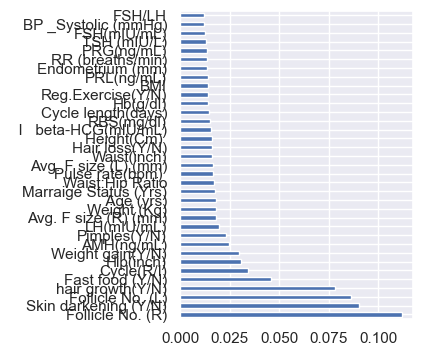

In [23]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(35).plot(kind='barh')
plt.rcParams["figure.figsize"] = (30,30)
plt.show()

In [24]:
from imblearn.over_sampling import RandomOverSampler 
oversample = RandomOverSampler(sampling_strategy=0.7)
X, y = oversample.fit_resample(X, y)
y.value_counts()

0    256
1    179
Name: PCOS (Y/N), dtype: int64

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.pipeline import FeatureUnion
sscaler = MinMaxScaler() #helps us scale the dataset. This makes it easy for the model to train
cols = X.columns
x_scaled = sscaler.fit_transform(X)
X_scaled = pd.DataFrame(x_scaled, columns = cols)
X_scaled

Age (yrs)  Weight (Kg)  Height(Cm)        BMI  Blood Group  \
0      0.296296     0.131507       0.3000  0.160400     0.571429   
1      0.592593     0.410959       0.5375  0.401192     0.571429   
2      0.481481     0.463014       0.6250  0.416173     0.000000   
3      0.629630     0.410959       0.2000  0.604829     0.285714   
4      0.592593     0.535616       0.6250  0.499565     0.571429   
..          ...          ...          ...       ...          ...   
430    0.222222     0.452055       0.6148  0.408853     0.000000   
431    0.111111     0.452055       0.8000  0.318270     0.571429   
432    0.148148     0.342466       0.3000  0.447406     0.000000   
433    0.222222     0.410959       0.4500  0.447406     0.571429   
434    0.444444     0.383562       0.6000  0.337040     0.857143   

     Pulse rate(bpm)   RR (breaths/min)  Hb(g/dl)  Cycle(R/I)  \
0            0.666667          0.500000  0.245455    0.000000   
1            0.333333          0.333333  0.522727    0.000000   
2            0.166667          0.166667  0.545455    0.000000   
3            0.166667          0.333333  0.590909    0.000000   
4            0.666667          1.000000  0.409091    0.000000   
..                ...               ...       ...         ...   
430          0.166667          0.166667  0.590909    0.000000   
431          0.166667          0.000000  0.318182    0.666667   
432          0.333333          0.000000  0.363636    0.000000   
433          0.416667          0.666667  0.250000    0.000000   
434          0.166667          0.166667  0.363636    0.666667   

     Cycle length(days)  ...  Pimples(Y/N)  Fast food (Y/N)  \
0              0.000000  ...           0.0              1.0   
1              0.000000  ...           0.0              0.0   
2              0.000000  ...           1.0              1.0   
3              0.000000  ...           0.0              0.0   
4              0.000000  ...           0.0              0.0   
..                  ...  ...           ...              ...   
430            0.000000  ...           1.0              1.0   
431            0.714286  ...           1.0              0.0   
432            0.000000  ...           1.0              1.0   
433            0.000000  ...           1.0              1.0   
434            0.571429  ...           1.0              1.0   

     Reg.Exercise(Y/N)  BP _Systolic (mmHg)  BP _Diastolic (mmHg)  \
0                  0.0                 0.25                  0.50   
1                  0.0                 0.50                  0.25   
2                  0.0                 0.50                  0.50   
3                  0.0                 0.50                  0.25   
4                  0.0                 0.25                  0.25   
..                 ...                  ...                   ...   
430                0.0                 0.25                  0.25   
431                0.0                 0.25                  0.25   
432                0.0                 0.25                  0.25   
433                0.0                 0.25                  0.50   
434                1.0                 0.25                  0.50   

     Follicle No. (L)  Follicle No. (R)  Avg. F size (L) (mm)  \
0            0.136364              0.15              0.657143   
1            0.136364              0.25              0.485714   
2            0.590909              0.75              0.657143   
3            0.090909              0.10              0.485714   
4            0.409091              0.30              0.542857   
..                ...               ...                   ...   
430          0.545455              0.70              0.714286   
431          1.000000              0.90              0.314286   
432          0.727273              0.70              0.314286   
433          0.454545              0.35              0.200000   
434          0.227273              0.30              0.657143   

     Avg. F size (R) (mm)  Endometrium (m

In [26]:
X_scaled_values = X_scaled.to_numpy() #convert the DataFrame to a numpy array
X_scaled_values

array([[0.2962963 , 0.13150685, 0.3       , ..., 0.65714286, 0.66666667,
        0.33566434],
       [0.59259259, 0.4109589 , 0.5375    , ..., 0.48571429, 0.44444444,
        0.        ],
       [0.48148148, 0.4630137 , 0.625     , ..., 0.65714286, 0.77777778,
        0.44055944],
       ...,
       [0.14814815, 0.34246575, 0.3       , ..., 0.31428571, 0.5       ,
        0.26573427],
       [0.22222222, 0.4109589 , 0.45      , ..., 0.2       , 0.27777778,
        0.34965035],
       [0.44444444, 0.38356164, 0.6       , ..., 0.65714286, 0.83333333,
        0.37062937]])

In [27]:
X_train,X_test, y_train, y_test = train_test_split(X_scaled , y, test_size=0.3) #creating a training split. We divide the data in a train and a test set respectively

In [33]:
#Model Score
import sklearn
import plotly.graph_objects as go
from sklearn.neighbors import KNeighborsClassifier
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, roc_auc_score,accuracy_score
scores = []

#Error Rate
error_rate=[] 

# Accuracy
acc = []
a = []

def print_scores(m):
    res = [roc_auc_score(y_train,m.predict_proba(X_train)[:,1]),roc_auc_score(y_test,m.predict_proba(X_test)[:,1])]
    for r in res:
        print(r)

## Using Odd Number of Neighbours, it is always recommended to use odd neighbours
## Why? because KNN works on majority votes by neighbours
## We do NOT votes to end in a tie, which could happen if we have even number of neighbouts
neighbours = [i for i in range(2,12) if i%2 == 1]
for i in neighbours:
    a.append(i)
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn.fit(X_train, y_train)
    print_scores(knn)
    y_pred = knn.predict(X_test)
    scores.append(knn.score(X_test, y_test))
    error_rate.append(np.mean(y_pred != y_test))
    acc.append(accuracy_score(y_test, y_pred))
    print("prec_score",sklearn.metrics.precision_score(y_test,y_pred,average=None, zero_division=1))
    print("recall_score",sklearn.metrics.recall_score(y_test,y_pred,average=None, zero_division=1))
print("neighbours",a)
print("accuracy",acc)
xpoints = np.array(a)
ypoints = np.array(acc)
trace1 = go.Bar(
                x = xpoints,
                y = ypoints,
                marker = dict(color = 'rgb(0, 128, 128)',
                              line=dict(color='rgb(0,0,0)',width=0.01)))
layout = go.Layout(title = 'Accuracy of KNN varying neighbours' , xaxis = dict(title = 'neighbours'), yaxis = dict(title = '% of Accuracy'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

0.9835750359078905
0.9156177156177158
prec_score [0.86567164 0.890625  ]
recall_score [0.89230769 0.86363636]
0.9603623221980262
0.9061771561771562
prec_score [0.84615385 0.84848485]
recall_score [0.84615385 0.84848485]
0.943775193439281
0.8996503496503496
prec_score [0.77027027 0.85964912]
recall_score [0.87692308 0.74242424]
0.9493119584858454
0.8927738927738929
prec_score [0.72972973 0.80701754]
recall_score [0.83076923 0.6969697 ]
0.9423388778205068
0.8942890442890442
prec_score [0.73333333 0.82142857]
recall_score [0.84615385 0.6969697 ]
neighbours [3, 5, 7, 9, 11]
accuracy [0.8778625954198473, 0.8473282442748091, 0.8091603053435115, 0.7633587786259542, 0.7709923664122137]


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [34]:
kneighbors(X=X_test, n_neighbors=10, return_distance=True)

NameError: name 'kneighbors' is not defined

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from numpy import mean
from sklearn.metrics import accuracy_score
from numpy import std
from pandas import read_csv
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve
import lightgbm as lgb
import sklearn
import plotly.graph_objects as go
acc = []
min_sam_leaf = []

def print_scores(m):
    res = [roc_auc_score(y_train,m.predict_proba(X_train)[:,1]),roc_auc_score(y_test,m.predict_proba(X_test)[:,1])]
    for r in res:
        print(r)
for i in range(5,14):
    rfc = RandomForestClassifier(n_jobs=-1,n_estimators=150,max_features='sqrt',min_samples_leaf=i) #creates a Random forest model
    rfc.fit(X_train, y_train) #trains model on data
    print("train accuracy")
    min_sam_leaf.append(i)
    print_scores(rfc)
    pred_rfc = rfc.predict(X_test) #prediction
    accuracy = accuracy_score(y_test, pred_rfc)
    print(mean_squared_error(y_test, pred_rfc))
    print("precison_score")
    fpr, fnr, thresholds = sklearn.metrics.det_curve(y_test, pred_rfc, pos_label=None, sample_weight=None)
    print("fpr",fpr)
    print("fnr",fnr)
    print("mse",mean_squared_error(y_test, pred_rfc))
    print(sklearn.metrics.precision_score(y_test,pred_rfc,average=None, zero_division=1))
    print("recall_score")
    print(sklearn.metrics.recall_score(y_test,pred_rfc,average=None, zero_division=1))
    print("test accuracy")
    print("metrics")
    acc.append(accuracy*100)
    print(accuracy)
    

# create trace1
trace1 = go.Bar(
                x = min_sam_leaf,
                y = acc,
                marker = dict(color = 'rgb(0, 128, 128)',
                              line=dict(color='rgb(0,0,0)',width=0.07)))
layout = go.Layout(title = 'Accuracy of Random Forest varying min_sam_leaf' , xaxis = dict(title = 'Min_sam_leaf'), yaxis = dict(title = '% of Accuracy'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

train accuracy
0.9983783533336422
0.9836829836829838
0.08396946564885496
precison_score
fpr [1.         0.03076923]
fnr [0.         0.13636364]
mse 0.08396946564885496
[0.875      0.96610169]
recall_score
[0.96923077 0.86363636]
test accuracy
metrics
0.916030534351145
train accuracy
0.996339711810221
0.9762237762237762
0.10687022900763359
precison_score
fpr [1.         0.04615385]
fnr [0.         0.16666667]
mse 0.10687022900763359
[0.84931507 0.94827586]
recall_score
[0.95384615 0.83333333]
test accuracy
metrics
0.8931297709923665
train accuracy
0.9954130565723023
0.9748251748251748
0.08396946564885496
precison_score
fpr [1.         0.03076923]
fnr [0.         0.13636364]
mse 0.08396946564885496
[0.875      0.96610169]
recall_score
[0.96923077 0.86363636]
test accuracy
metrics
0.916030534351145
train accuracy
0.9934207478107769
0.9764568764568765
0.07633587786259542
precison_score
fpr [1.         0.01538462]
fnr [0.         0.13636364]
mse 0.07633587786259542
[0.87671233 0.98275862]
r

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [36]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print(sklearn.metrics.precision_score(y_test,y_pred,average='weighted',zero_division=1))
fpr, fnr, thresholds = sklearn.metrics.det_curve(y_test, y_pred, pos_label=None, sample_weight=None)
print("fpr",fpr)
print("fnr",fnr)
print("mse",mean_squared_error(y_test, pred_rfc))
print("recall_score")
print(sklearn.metrics.recall_score(y_test,y_pred,average='weighted', zero_division=1))

Accuracy of logistic regression classifier on test set: 0.91
Accuracy of logistic regression classifier on test set: 0.82
0.8245547073791348
fpr [1.         0.10769231]
fnr [0.         0.25757576]
mse 0.12213740458015267
recall_score
0.816793893129771


In [37]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import  confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, roc_auc_score,accuracy_score
accDt = []
max_depth = []
for i in range(8,14):
    clf = DecisionTreeClassifier(criterion="gini",max_depth=i,random_state=1)
    max_depth.append(i)
    clf = clf.fit(X_train,y_train)
    print_scores(clf)
    y_pred = clf.predict(X_test)
    print("test score")
    accuracy_score(y_test, y_pred)
    print(sklearn.metrics.precision_score(y_test,y_pred,average='weighted',zero_division=1))
    print("recall_score")
    print(sklearn.metrics.recall_score(y_test,y_pred,average='weighted', zero_division=1))
    accDt.append(accuracy_score(y_test, y_pred)*100)
    print("fpr",fpr)
    print("fnr",fnr)
    print("mse",mean_squared_error(y_test, y_pred))
    
trace1 = go.Bar(
                x = max_depth,
                y = accDt,
                marker = dict(color = 'rgb(0, 128, 128)',
                              line=dict(color='rgb(0,0,0)',width=0.01)))
layout = go.Layout(title = 'Accuracy of Decision Tree varying max_depth' , xaxis = dict(title = 'Max_depth'), yaxis = dict(title = '% of Accuracy'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

1.0
0.9005827505827506
test score
0.9015716839930195
recall_score
0.9007633587786259
fpr [1.         0.10769231]
fnr [0.         0.25757576]
mse 0.09923664122137404
1.0
0.9005827505827506
test score
0.9015716839930195
recall_score
0.9007633587786259
fpr [1.         0.10769231]
fnr [0.         0.25757576]
mse 0.09923664122137404
1.0
0.9005827505827506
test score
0.9015716839930195
recall_score
0.9007633587786259
fpr [1.         0.10769231]
fnr [0.         0.25757576]
mse 0.09923664122137404
1.0
0.9005827505827506
test score
0.9015716839930195
recall_score
0.9007633587786259
fpr [1.         0.10769231]
fnr [0.         0.25757576]
mse 0.09923664122137404
1.0
0.9005827505827506
test score
0.9015716839930195
recall_score
0.9007633587786259
fpr [1.         0.10769231]
fnr [0.         0.25757576]
mse 0.09923664122137404
1.0
0.9005827505827506
test score
0.9015716839930195
recall_score
0.9007633587786259
fpr [1.         0.10769231]
fnr [0.         0.25757576]
mse 0.09923664122137404


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



36          Follicle No. (L)
37          Follicle No. (R)
29      Skin darkening (Y/N)
28          hair growth(Y/N)
22                AMH(ng/mL)
32           Fast food (Y/N)
18                 Hip(inch)
39      Avg. F size (R) (mm)
38      Avg. F size (L) (mm)
27          Weight gain(Y/N)
3                        BMI
1                Weight (Kg)
0                  Age (yrs)
2                Height(Cm) 
15               FSH(mIU/mL)
13      I   beta-HCG(mIU/mL)
17                    FSH/LH
20           Waist:Hip Ratio
23                PRL(ng/mL)
19               Waist(inch)
16                LH(mIU/mL)
9         Cycle length(days)
26                RBS(mg/dl)
8                 Cycle(R/I)
40          Endometrium (mm)
31              Pimples(Y/N)
5           Pulse rate(bpm) 
33         Reg.Exercise(Y/N)
24            Vit D3 (ng/mL)
21               TSH (mIU/L)
7                   Hb(g/dl)
25                PRG(ng/mL)
10     Marraige Status (Yrs)
4                Blood Group
35      BP _Di

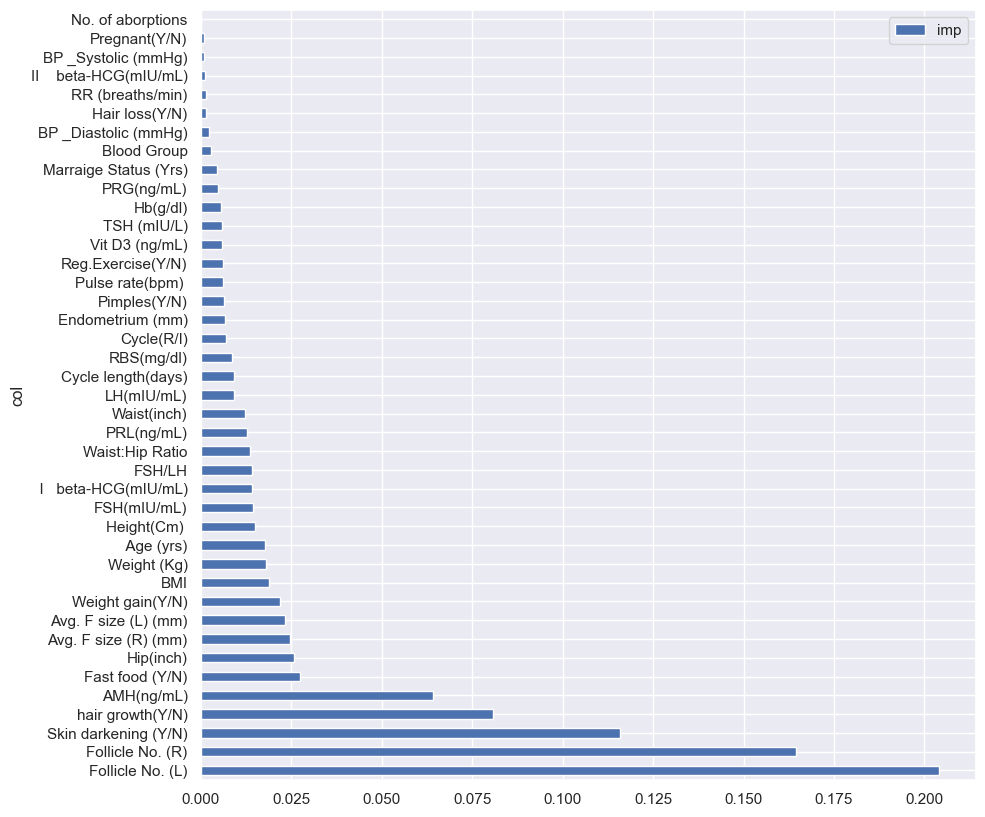

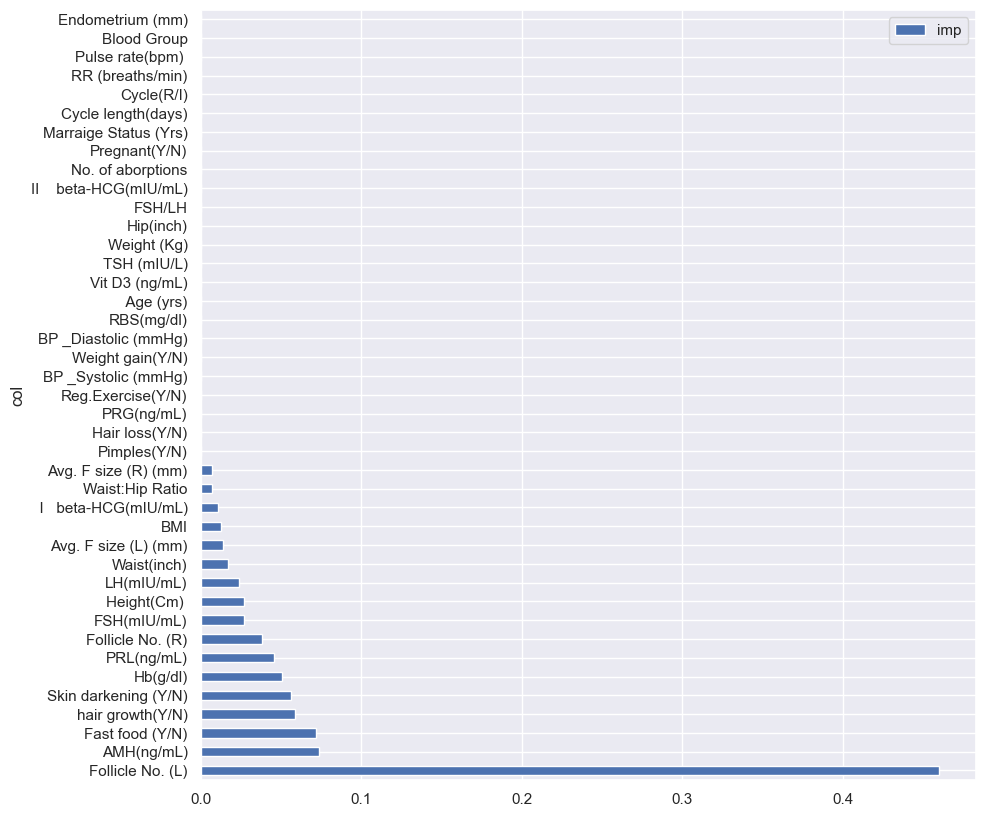

In [38]:

rfc.fit(X_train, y_train)
def get_fi(m, df):
    return pd.DataFrame({'col': df.columns, 'imp': m.feature_importances_}).sort_values('imp',ascending=False)

#lets get the feature importances for training set
fi = get_fi(rfc,X_scaled)
print(fi['col'])
def plot_fi(df):
    df.plot('col','imp','barh',figsize=(10,10))
    
plot_fi(fi)

clf.fit(X_train, y_train)
def get_di(m, df):
    return pd.DataFrame({'col': df.columns, 'imp': m.feature_importances_}).sort_values('imp',ascending=False)
#lets get the feature importances for training set
di = get_di(clf,X_scaled)
print(di['col'])
def plot_di(df):
    df.plot('col','imp','barh',figsize=(10,10))
    
plot_di(di)


Feature: 0, Score: -0.76313, Feature: PCOS (Y/N)
Feature: 1, Score: 0.21436, Feature:  Age (yrs)
Feature: 2, Score: 0.37931, Feature: Weight (Kg)
Feature: 3, Score: -0.01655, Feature: Height(Cm) 
Feature: 4, Score: 0.15380, Feature: BMI
Feature: 5, Score: 0.84415, Feature: Blood Group
Feature: 6, Score: -0.33845, Feature: Pulse rate(bpm) 
Feature: 7, Score: 0.44939, Feature: RR (breaths/min)
Feature: 8, Score: 1.24089, Feature: Hb(g/dl)
Feature: 9, Score: -0.55955, Feature: Cycle(R/I)
Feature: 10, Score: -1.06400, Feature: Cycle length(days)
Feature: 11, Score: -0.37833, Feature: Marraige Status (Yrs)
Feature: 12, Score: 0.03823, Feature: Pregnant(Y/N)
Feature: 13, Score: 0.87424, Feature: No. of aborptions
Feature: 14, Score: -0.08051, Feature:   I   beta-HCG(mIU/mL)
Feature: 15, Score: -0.25782, Feature: II    beta-HCG(mIU/mL)
Feature: 16, Score: 1.37633, Feature: FSH(mIU/mL)
Feature: 17, Score: -0.49599, Feature: LH(mIU/mL)
Feature: 18, Score: 0.08125, Feature: FSH/LH
Feature: 19, S

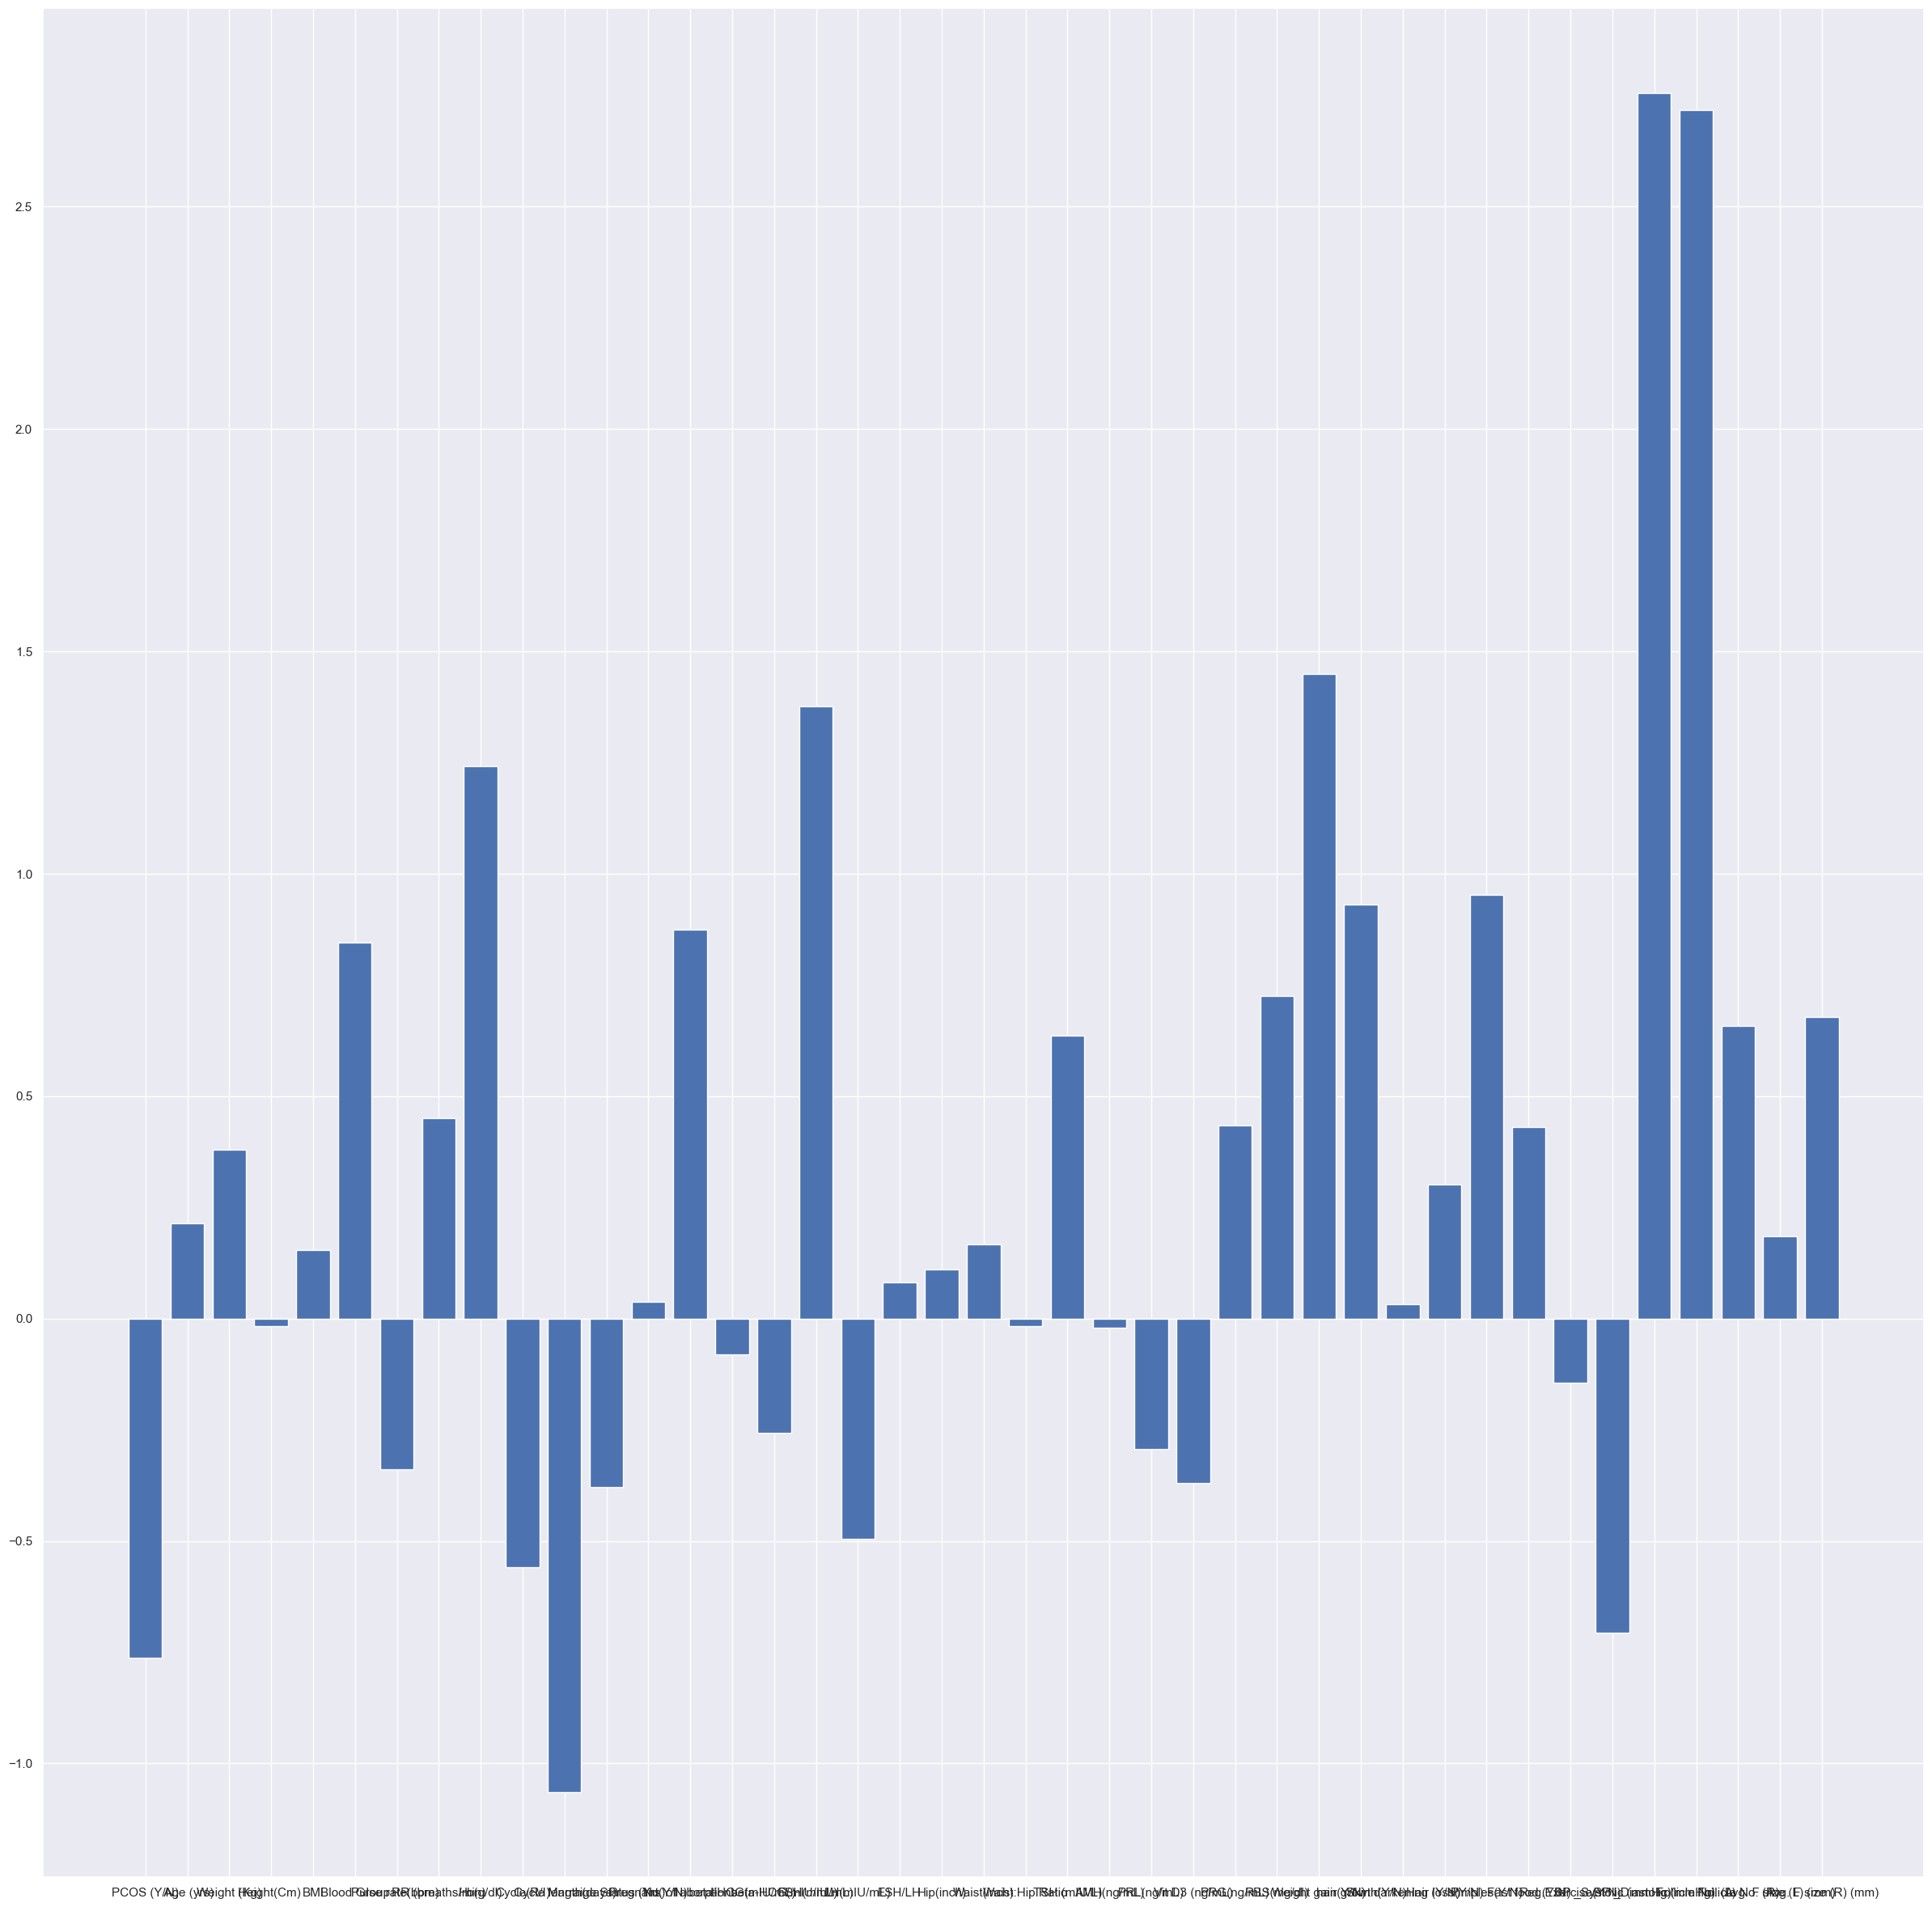

In [43]:
from matplotlib import pyplot
importance = logreg.coef_[0]
# summarize feature importance
a = []
b = []
c = []
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f, Feature: %s' % (i,v,data.columns[i]))
    a.append(v)
    b.append(i)
    c.append(data.columns[i])
# plot feature importance
print(a)
print(b)
pyplot.bar([data.columns[x] for x in range(len(importance))], importance)
pyplot.show()

In [44]:
import numpy as np

tp = np.array(a)
fp = np.array(b)
lp = np.array(c)
combined = np.transpose((tp,fp,lp))
combined

columnIndex = 0
# Sort 2D numpy array by 2nd Column
sortedArr = combined[combined[:,columnIndex].argsort()]
largest_indices = sortedArr[::-1][:41]
print('Sorted 2D Numpy Array')
dataset = pd.DataFrame({'Index': largest_indices[:, 1], 'Feature': largest_indices[:, 2]})
print(dataset)


Sorted 2D Numpy Array
   Index                 Feature
0     36    BP _Diastolic (mmHg)
1     37        Follicle No. (L)
2     28        Weight gain(Y/N)
3     16             FSH(mIU/mL)
4      8                Hb(g/dl)
5     32            Pimples(Y/N)
6     29        hair growth(Y/N)
7     13       No. of aborptions
8      5             Blood Group
9     27              RBS(mg/dl)
10    40    Avg. F size (R) (mm)
11    38        Follicle No. (R)
12    22             TSH (mIU/L)
13     7        RR (breaths/min)
14    26              PRG(ng/mL)
15    33         Fast food (Y/N)
16     2             Weight (Kg)
17    31          Hair loss(Y/N)
18     1               Age (yrs)
19    39    Avg. F size (L) (mm)
20    20             Waist(inch)
21     4                     BMI
22    19               Hip(inch)
23    18                  FSH/LH
24    12           Pregnant(Y/N)
25    30    Skin darkening (Y/N)
26    10      Cycle length(days)
27     0              PCOS (Y/N)
28    35     BP _Syst

In [45]:
scor = ['accuracy', 'precision','recall']

In [46]:
for i in range(0,len(scor)):
    rfc = RandomForestClassifier(n_jobs=-1,n_estimators=150,max_features='sqrt',min_samples_leaf=12)
    clf = DecisionTreeClassifier(criterion="gini",max_depth=10,random_state=1)
    logreg = LogisticRegression()
    l = [('rf',rfc), ('clf', clf),('lgr',logreg)]
    from sklearn.ensemble import StackingClassifier
    stack_model = StackingClassifier( estimators = l)
    score = cross_val_score(stack_model,X_scaled,y,cv = 5,scoring = scor[i])
    print('score for %s is' % scor[i])
    print(score)


score for accuracy is
[0.93103448 0.90804598 0.88505747 0.94252874 0.88505747]
score for precision is
[0.93939394 0.91428571 0.825      1.         0.80952381]
score for recall is
[0.88571429 0.86111111 0.91666667 0.86111111 0.94444444]


In [67]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Step 1: Train three different models on the same dataset
lr = LinearRegression()
rf = RandomForestClassifier(n_jobs=-1,n_estimators=150,max_features='sqrt',min_samples_leaf=12)
cl = DecisionTreeClassifier(criterion="gini",max_depth=10,random_state=1)
#rf = RandomForestRegressor()
#gb = GradientBoostingRegressor()

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
cl.fit(X_train, y_train)

# Step 2: Generate predictions on a validation set or test set
lr_preds = lr.predict(X_test)
rf_preds = rf.predict(X_test)
gb_preds = cl.predict(X_test)

# Step 3: Combine the predictions from the three models into a new feature matrix
X_val_stacked = np.hstack([lr_preds.reshape(-1, 1), rf_preds.reshape(-1, 1), gb_preds.reshape(-1, 1)])

# Step 4: Train a new model on the combined feature matrix
stacked_model = LinearRegression()
stacked_model.fit(X_val_stacked, y_test)

# Step 5: Determine the weights of the original models
weights = stacked_model.coef_

# Step 6: Get the most important features of the original dataset
rf_importances = rf.feature_importances_
gb_importances = cl.feature_importances_
lr_coefs = np.abs(lr.coef_)

print(rf_importances)

weighted_importances = weights[0]*lr_coefs + weights[1]*rf_importances + weights[2]*gb_importances
sorted_indices = np.argsort(weighted_importances)[::-1]
top_features = list(X_train.columns[sorted_indices])
weight = np.sort(np.array(weighted_importances))[::-1]
print(top_features)
print(weight)




[1.85309237e-02 1.63081074e-02 8.65069363e-03 1.15533052e-02
 2.30569005e-03 7.56158535e-03 2.29706542e-03 5.13732681e-03
 1.03368093e-02 5.56066899e-03 9.88262309e-03 1.55630799e-03
 1.94366938e-04 1.13341292e-02 3.09045995e-03 1.40609139e-02
 1.01713182e-02 1.06837086e-02 1.35969760e-02 2.10756952e-02
 1.73056991e-02 7.09522738e-03 5.58623274e-02 8.17771614e-03
 8.99453425e-03 5.67654070e-03 5.60039914e-03 2.96040467e-02
 6.73102992e-02 1.21710613e-01 2.99458428e-03 5.72129941e-03
 3.53217920e-02 6.27627733e-03 1.49413665e-03 9.90995477e-04
 2.43739154e-01 1.53941406e-01 2.00739424e-02 7.74638640e-03
 1.04739482e-02]
['Weight (Kg)', 'BMI', 'Follicle No. (L)', 'Waist(inch)', 'Hip(inch)', 'Height(Cm) ', 'Waist:Hip Ratio', 'LH(mIU/mL)', 'Follicle No. (R)', 'AMH(ng/mL)', 'Skin darkening (Y/N)', 'hair growth(Y/N)', 'Fast food (Y/N)', 'PRG(ng/mL)', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'FSH/LH', 'Avg. F size (L) (mm)', 'FSH(mIU/mL)', 'BP _Diastolic (mmHg)', '  I   beta-HCG(mIU/mL)', 'PRL

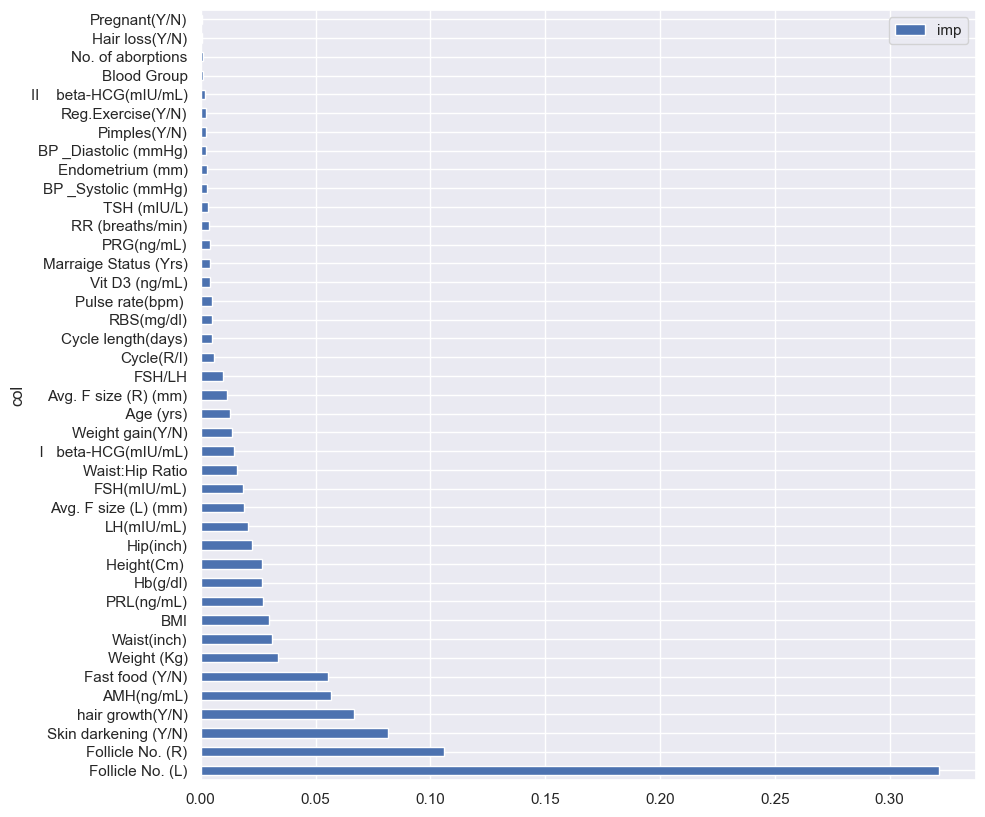

In [65]:
def get_di(top_features, weight):
    return pd.DataFrame({'col': top_features, 'imp': weight}).sort_values('imp',ascending=False)
#lets get the feature importances for training set
di = get_di(top_features,weight)
plot_di(di)

In [72]:
df_new = pd.DataFrame()


for i in range(0,len(top_features)-22):
    df_new[top_features[i]] = X[top_features[i]]

df_new

Weight (Kg)        BMI  Follicle No. (L)  Waist(inch)  Hip(inch)  \
0           44.6  19.300000                 3           30         36   
1           65.0  24.921163                 3           32         38   
2           68.8  25.270891                13           36         40   
3           65.0  29.674945                 2           36         42   
4           74.1  27.217631                 9           38         44   
..           ...        ...               ...          ...        ...   
430         68.0  25.100000                12           38         42   
431         68.0  22.985398                22           34         42   
432         60.0  26.000000                16           32         38   
433         65.0  26.000000                10           35         40   
434         63.0  23.423557                 5           40         46   

     Height(Cm)   Waist:Hip Ratio  LH(mIU/mL)  Follicle No. (R)  AMH(ng/mL)  \
0        152.000         0.833333        3.68                 3        2.07   
1        161.500         0.842105        1.09                 5        1.53   
2        165.000         0.900000        0.88                15        6.63   
3        148.000         0.857143        2.36                 2        1.22   
4        165.000         0.863636        1.07                 6        6.74   
..           ...              ...         ...               ...         ...   
430      164.592         0.904762        2.01                14        0.90   
431      172.000         0.809524        5.48                18        3.20   
432      152.000         0.842105        2.73                14        4.50   
433      158.000         0.875000        7.89                 7        8.90   
434      164.000         0.869565        7.52                 6       21.00   

     Skin darkening (Y/N)  hair growth(Y/N)  Fast food (Y/N)  PRG(ng/mL)  \
0                       0                 0              1.0        0.57   
1                       0                 0              0.0        0.97   
2                       0                 0              1.0        0.36   
3                       0                 0              0.0        0.36   
4                       0                 0              0.0        0.30   
..                    ...               ...              ...         ...   
430                     0                 0              1.0        0.24   
431                     1                 1              0.0        0.39   
432                     1                 0              1.0        0.25   
433                     0                 1              1.0        0.33   
434                     1                 0              1.0        0.68   

     Pulse rate(bpm)   RR (breaths/min)    FSH/LH  Avg. F size (L) (mm)  \
0                  78                22  2.160326                  18.0   
1                  74                20  6.174312                  15.0   
2                  72                18  6.295455                  18.0   
3                  72                20  3.415254                  15.0   
4                  78                28  3.028037                  16.0   
..                ...               ...       ...                   ...   
430                72                18  2.512438                  19.0   
431                72                16  0.806569                  12.0   
432                74                16  2.186813                  12.0   
433                75                24  0.902408                  10.0   
434                72                18  0.667553                  18.0   

     FSH(mIU/mL)  
0           7.95  
1           6.73  
2           5.54  
3           8.06  
4           3.24  
..           ...  
430         5.05  
431         4.42  
432         5.97  
433         7.12  
434         5.02  

[435 rows x 19 columns]

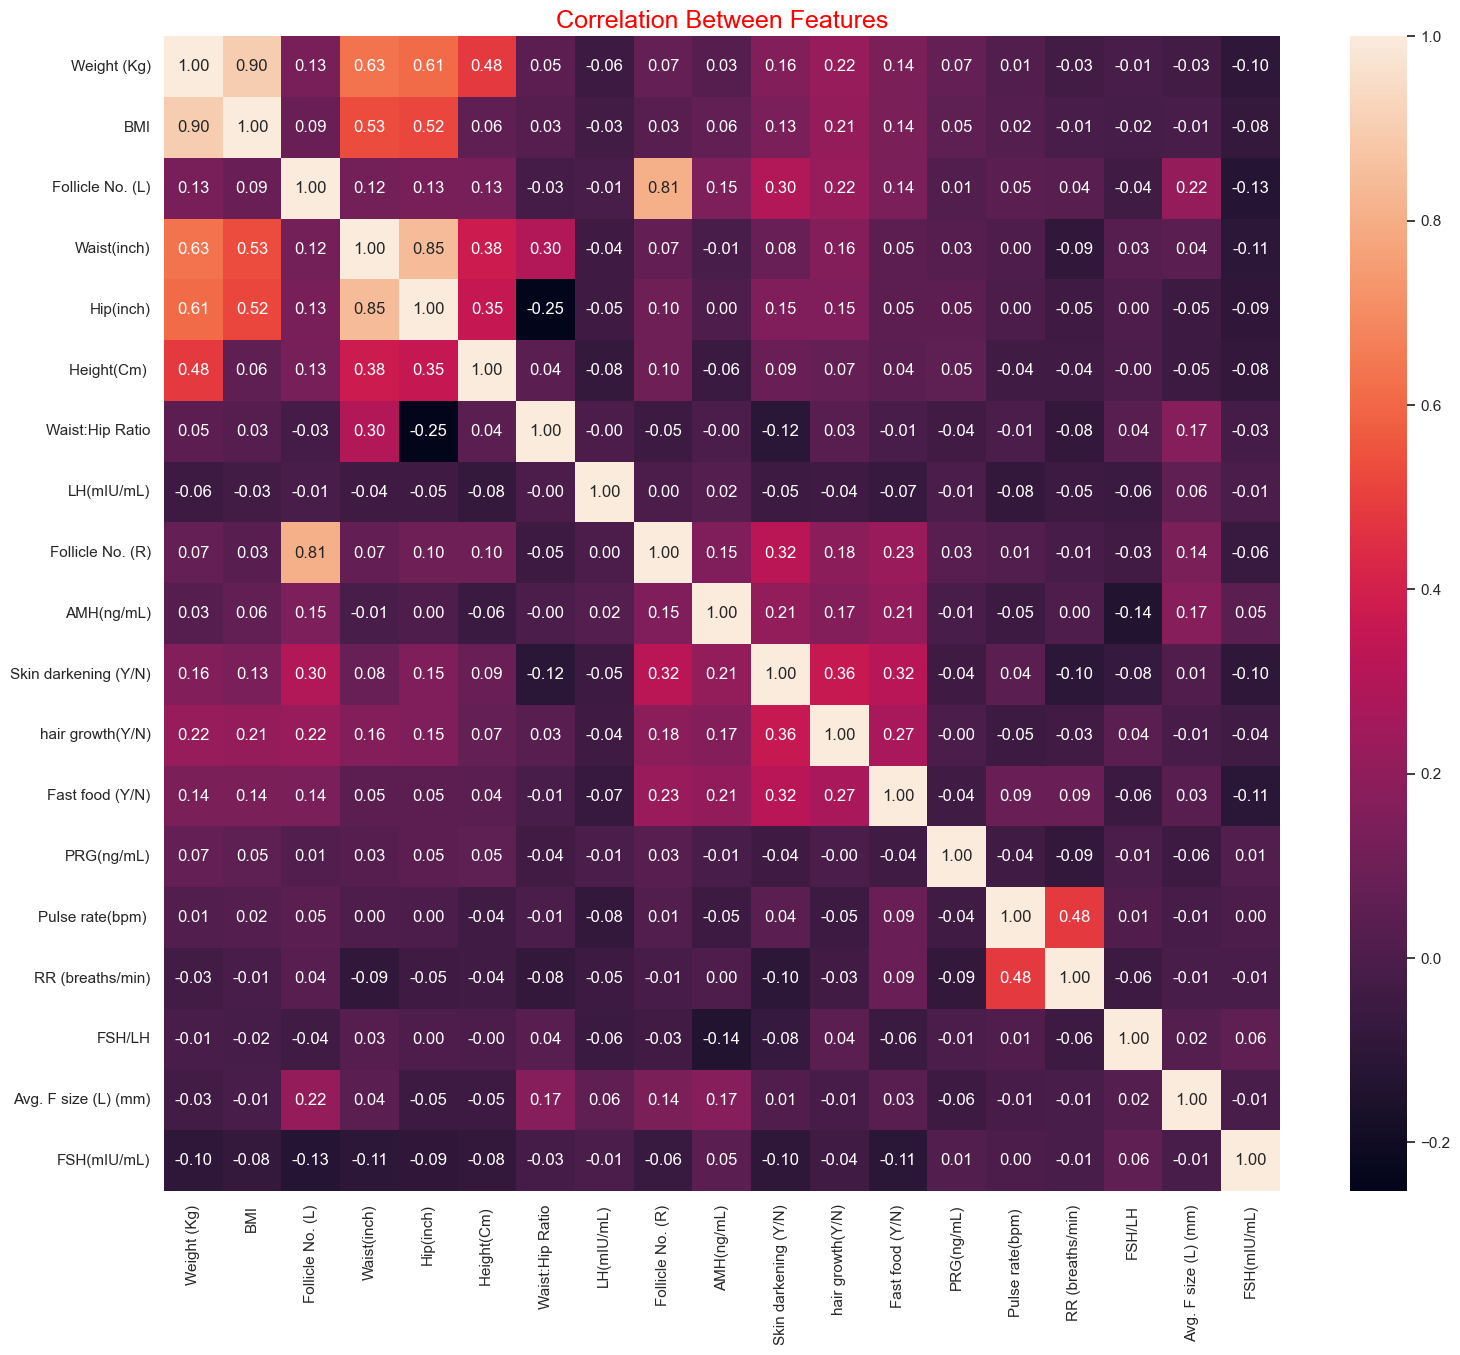

In [73]:

plt.figure(figsize=(18,15))
sns.heatmap(df_new.corr(),annot=True, fmt=".2f")
plt.title("Correlation Between Features",fontsize=18,color="red");


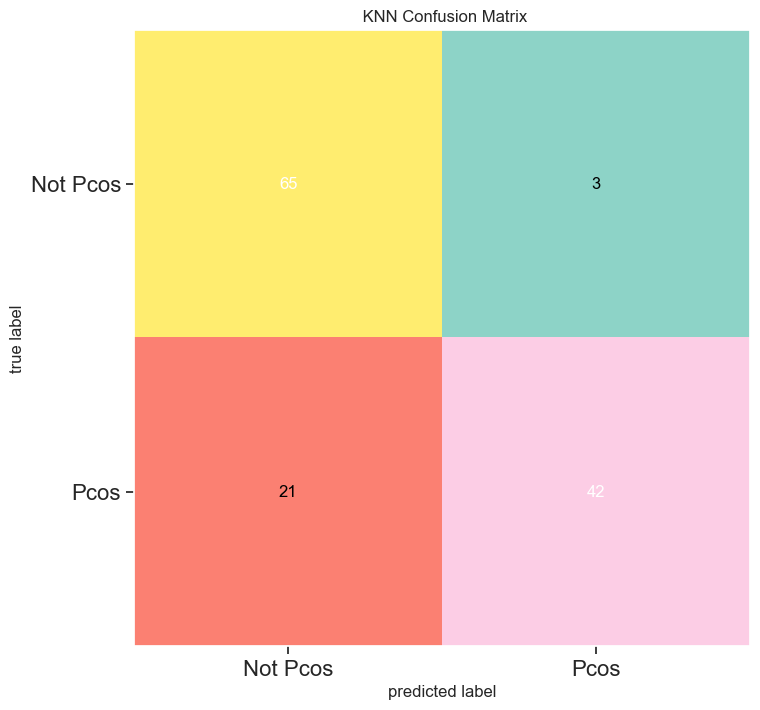

IndexError: list index out of range

In [51]:
from mlxtend.plotting import plot_confusion_matrix
model = [knn]
model_list = ['KNN']
predictions = []
for i in model:
    predictions.append(i.predict(X_test))
for j in range(7):
    cm = confusion_matrix(y_test, predictions[j])
    plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Set3)
    plt.title(" {} Confusion Matrix".format('KNN'))
    plt.xticks(range(2), ["Not Pcos","Pcos"], fontsize=16)
    plt.yticks(range(2), ["Not Pcos","Pcos"], fontsize=16)
    plt.show()

[0.85714286 0.91666667 0.88888889 0.88888889 1.        ]


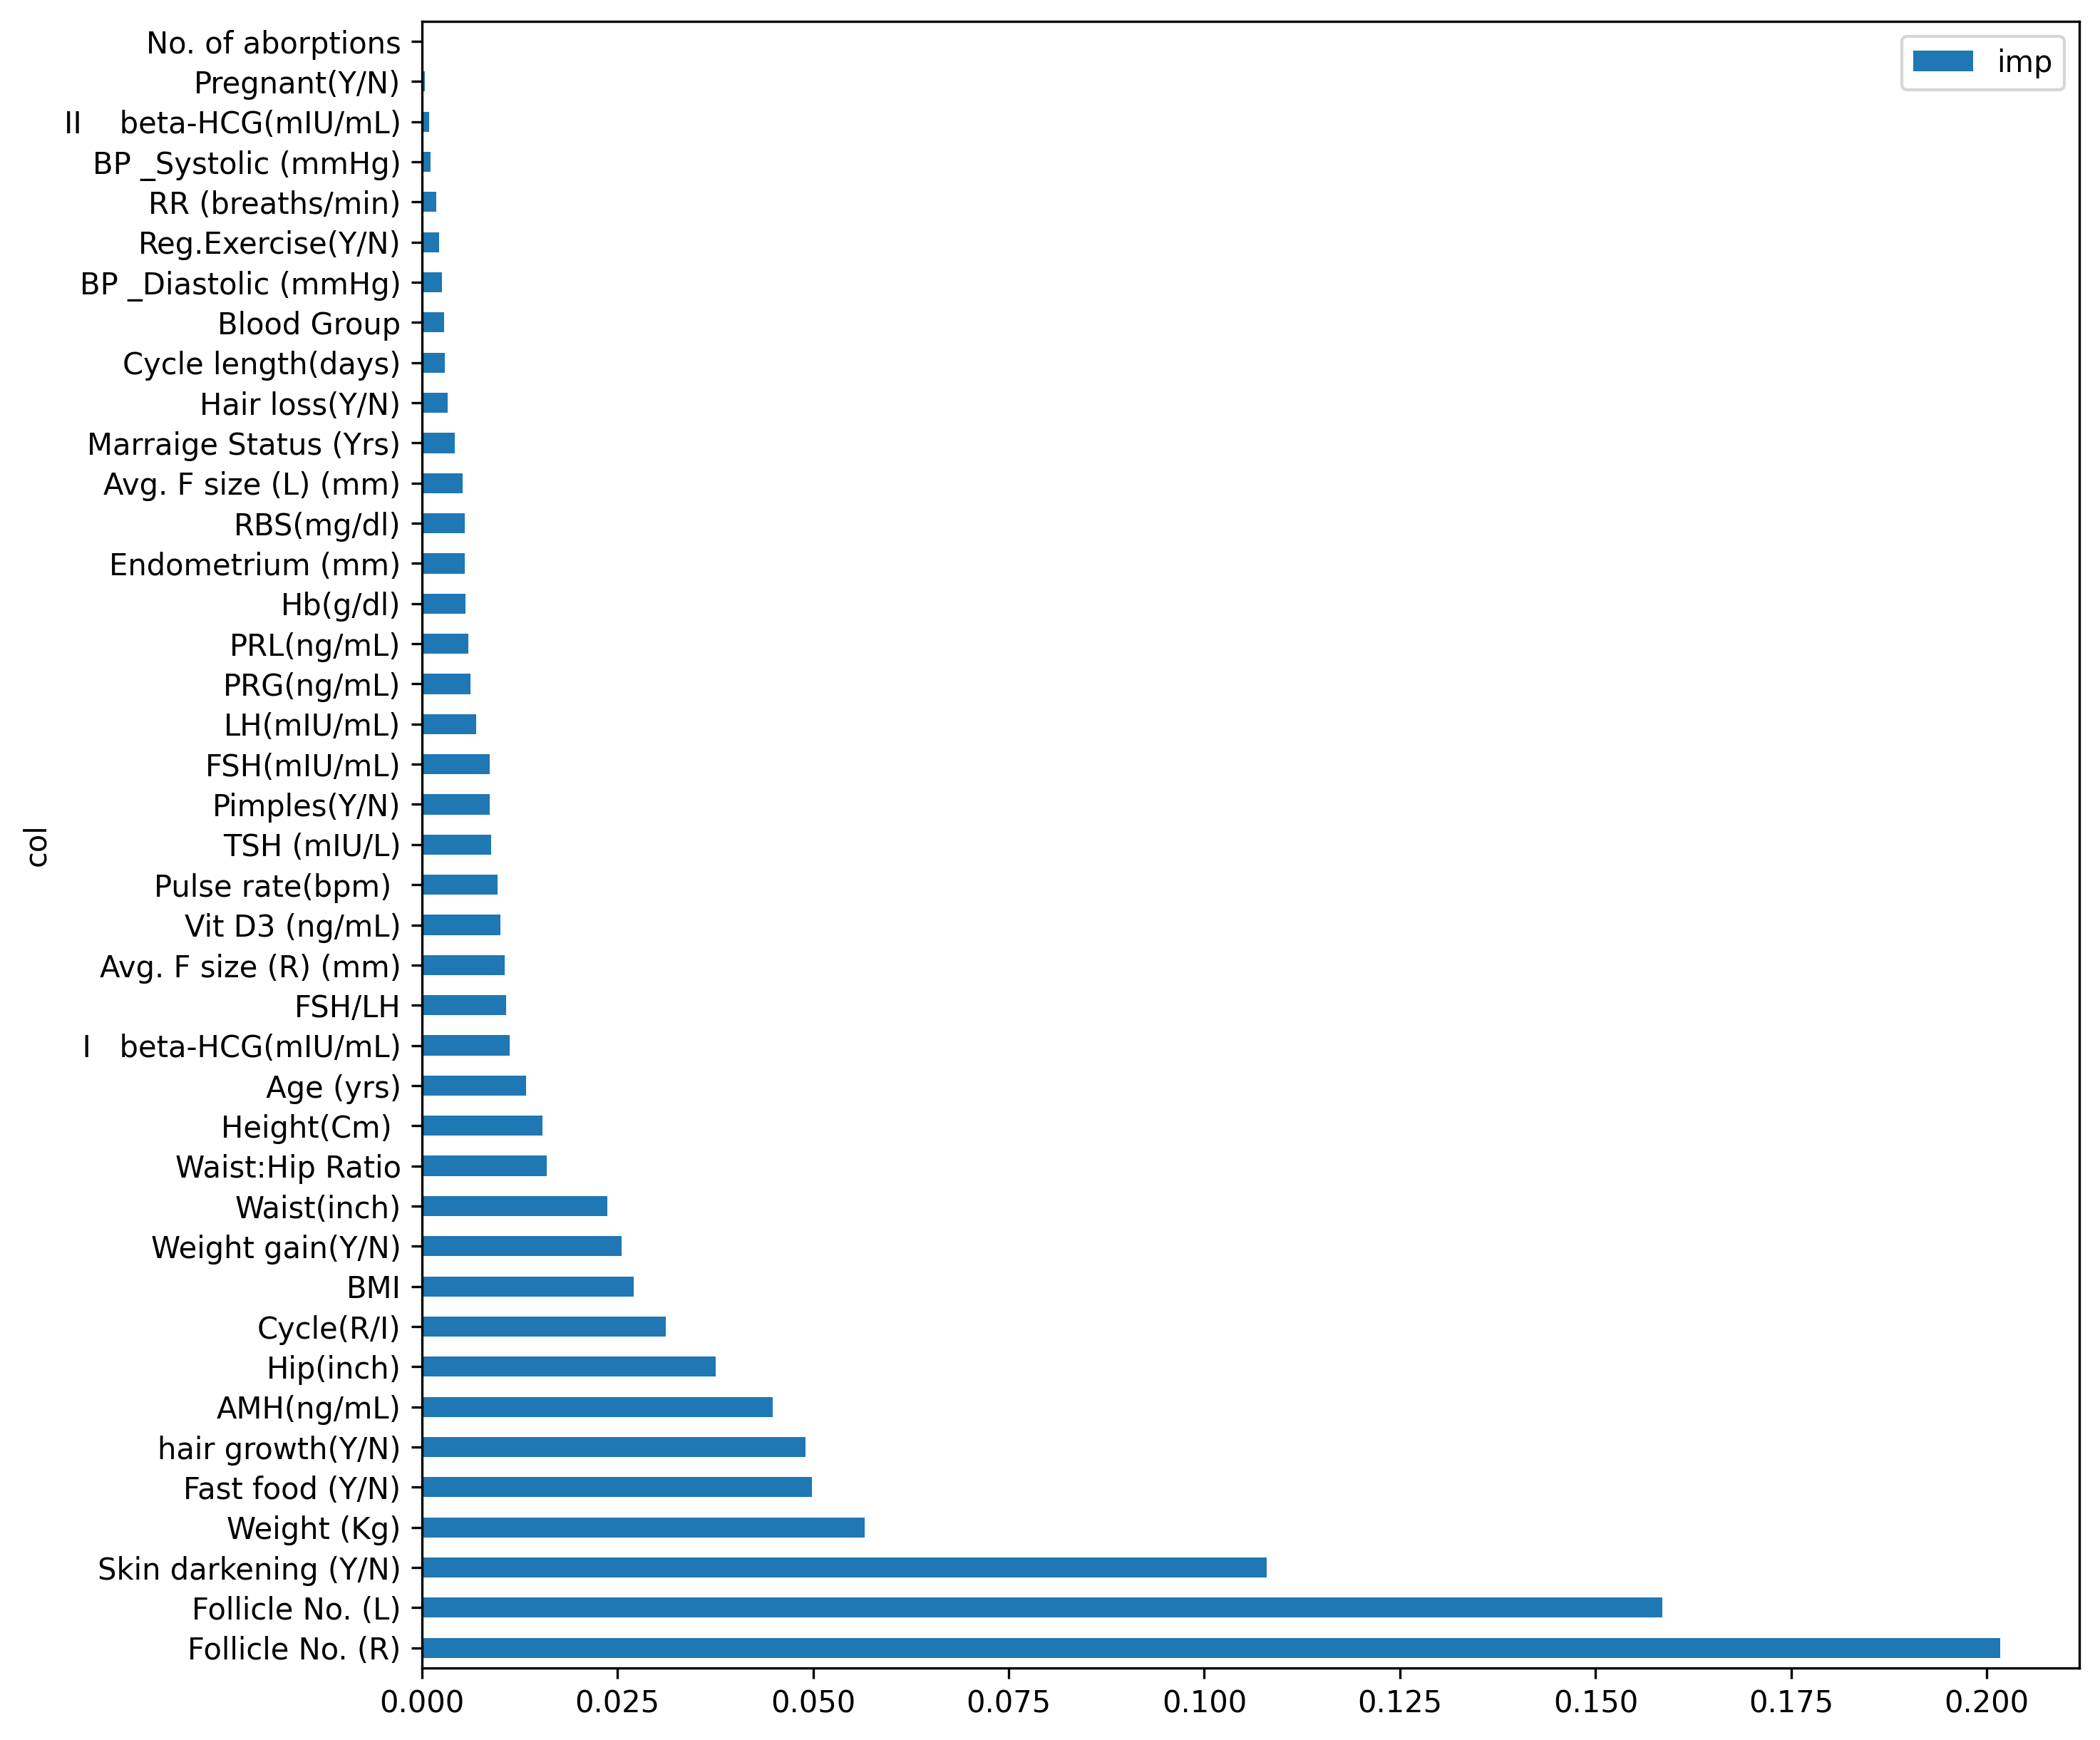

In [46]:
rfc.fit(X_train, y_train)
def get_fi(m, df):
    return pd.DataFrame({'col': df.columns, 'imp': m.feature_importances_}).sort_values('imp',ascending=False)

#lets get the feature importances for training set
fi = get_fi(rfc,X_scaled)
def plot_fi(df):
    df.plot('col','imp','barh',figsize=(10,10))
    
plot_fi(fi)

In [179]:
depth = range(2, 10, 1)
a = []
acc = []
for n in depth:
    clf = DecisionTreeClassifier(criterion="gini",max_depth=n,random_state=0)
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    b = metrics.accuracy_score(y_test, y_pred)
    a.append(n)
    acc.append(b)
    
print(a)
print(acc)

[2, 3, 4, 5, 6, 7, 8, 9]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


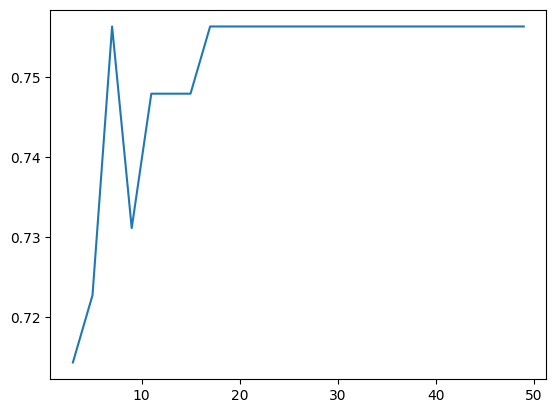

In [97]:
#Model Score
scores = []

#Error Rate
error_rate=[] 

# Accuracy
acc = []
a = []

## Using Odd Number of Neighbours, it is always recommended to use odd neighbours
## Why? because KNN works on majority votes by neighbours
## We do NOT votes to end in a tie, which could happen if we have even number of neighbouts
neighbours = [i for i in range(2,50) if i%2 == 1]
for i in neighbours:
    a.append(i)
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(knn.score(X_test, y_test))
    error_rate.append(np.mean(y_pred != y_test))
    acc.append(accuracy_score(y_test, y_pred))


xpoints = np.array(a)
ypoints = np.array(acc)
plt.plot(xpoints, ypoints)
plt.show()

In [184]:
#### this part is for similarity index find,

rfc = RandomForestClassifier(n_jobs=-1,n_estimators=190,max_features='sqrt',min_samples_leaf=5)
rfc.fit(X_train,y_train)
print_scores(rfc)
from sklearn.metrics import accuracy_score
pred_rfc = rfc.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)

print(accuracy)

1.0
1.0
0.9647058823529412


In [98]:
list(data.columns)


['PCOS (Y/N)',
 ' Age (yrs)',
 'Weight (Kg)',
 'Height(Cm) ',
 'BMI',
 'Blood Group',
 'Pulse rate(bpm) ',
 'RR (breaths/min)',
 'Hb(g/dl)',
 'Cycle(R/I)',
 'Cycle length(days)',
 'Marraige Status (Yrs)',
 'Pregnant(Y/N)',
 'No. of aborptions',
 '  I   beta-HCG(mIU/mL)',
 'II    beta-HCG(mIU/mL)',
 'FSH(mIU/mL)',
 'LH(mIU/mL)',
 'FSH/LH',
 'Hip(inch)',
 'Waist(inch)',
 'Waist:Hip Ratio',
 'TSH (mIU/L)',
 'AMH(ng/mL)',
 'PRL(ng/mL)',
 'Vit D3 (ng/mL)',
 'PRG(ng/mL)',
 'RBS(mg/dl)',
 'Weight gain(Y/N)',
 'hair growth(Y/N)',
 'Skin darkening (Y/N)',
 'Hair loss(Y/N)',
 'Pimples(Y/N)',
 'Fast food (Y/N)',
 'Reg.Exercise(Y/N)',
 'BP _Systolic (mmHg)',
 'BP _Diastolic (mmHg)',
 'Follicle No. (L)',
 'Follicle No. (R)',
 'Avg. F size (L) (mm)',
 'Avg. F size (R) (mm)',
 'Endometrium (mm)']

In [62]:
X_new=data_New.drop(["PCOS (Y/N)","No. of aborptions","Reg.Exercise(Y/N)","Cycle length(days)","Blood Group","Endometrium (mm)"],axis = 1) #droping out class
y_new=data_New["PCOS (Y/N)"]
print(len(X_new))

#X_new=data_New.drop(["PCOS (Y/N)","No. of aborptions","BP _Diastolic (mmHg)","Reg.Exercise(Y/N)","Pregnant(Y/N)","Cycle length(days)"],axis = 1) #droping out class
#y_new=data_New["PCOS (Y/N)"]
#print(len(X))
len(list(X_new.columns))

338


36

In [63]:
from imblearn.over_sampling import RandomOverSampler 
oversample = RandomOverSampler(sampling_strategy=0.7)
X_new, y_new = oversample.fit_resample(X_new, y_new)
y_new.value_counts()

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.pipeline import FeatureUnion
sscaler = MinMaxScaler() #helps us scale the dataset. This makes it easy for the model to train
cols = X_new.columns
x_scaled = sscaler.fit_transform(X_new)
X_scaled = pd.DataFrame(x_scaled, columns = cols)
X_scaled


X_scaled_values = X_scaled.to_numpy() #convert the DataFrame to a numpy array
X_scaled_values
X_train,X_test, y_train, y_test = train_test_split(X_scaled , y_new, test_size=0.3) #creating a training split. We divide the data in a train and a test set respectively


rfc = RandomForestClassifier(n_jobs=-1,n_estimators=150,max_features='sqrt',min_samples_leaf=12) #creates a Random forest model
rfc.fit(X_train, y_train) #trains model on data
print_scores(rfc)
pred_rfc = rfc.predict(X_test) #prediction
accuracy = accuracy_score(y_test, pred_rfc)
print(accuracy)
fpr, fnr, thresholds = sklearn.metrics.det_curve(y_test, pred_rfc, pos_label=None, sample_weight=None)
print("fpr",fpr)
print("fnr",fnr)
print("mse",mean_squared_error(y_test, pred_rfc))




from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
fpr, fnr, thresholds = sklearn.metrics.det_curve(y_test, pred_rfc, pos_label=None, sample_weight=None)
print("fpr",fpr)
print("fnr",fnr)
print("mse",mean_squared_error(y_test, pred_rfc))



clf = DecisionTreeClassifier(criterion="gini",max_depth=9,random_state=1)
clf = clf.fit(X_train,y_train)
print_scores(clf)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)
fpr, fnr, thresholds = sklearn.metrics.det_curve(y_test, pred_rfc, pos_label=None, sample_weight=None)
print("fpr",fpr)
print("fnr",fnr)
print("mse",mean_squared_error(y_test, pred_rfc))


0.9856983240223464
0.94997594997595
0.8778625954198473
fpr [1.         0.09090909]
fnr [0.         0.16666667]
mse 0.12213740458015267
Accuracy of logistic regression classifier on test set: 0.90
Accuracy of logistic regression classifier on test set: 0.85
fpr [1.         0.09090909]
fnr [0.         0.16666667]
mse 0.12213740458015267
1.0
0.835016835016835
fpr [1.         0.09090909]
fnr [0.         0.16666667]
mse 0.12213740458015267


In [64]:
for i in range(0,len(scor)):
    rfc = RandomForestClassifier(n_jobs=-1,n_estimators=150,max_features='sqrt',min_samples_leaf=12)
    clf = DecisionTreeClassifier(criterion="gini",max_depth=10,random_state=2)
    logreg = LogisticRegression()
    l = [('rf',rfc), ('clf', clf),('lgr',logreg)]
    from sklearn.ensemble import StackingClassifier
    stack_model = StackingClassifier( estimators = l)
    score = cross_val_score(stack_model,X_scaled,y_new,cv = 6,scoring = scor[i])
    print('score for %s is' % scor[i])
    print(score)

score for accuracy is
[0.89041096 0.84931507 0.8630137  0.94444444 0.93055556 0.80555556]
score for precision is
[0.92307692 0.82142857 0.79411765 0.90322581 0.96296296 0.72972973]
score for recall is
[0.8        0.8        0.9        0.96551724 0.86666667 0.9       ]


In [50]:
import plotly.graph_objects as go
model_list = ['Decision Tree','Random Forest','Logistic Regression']
cv_result = [98.55,92.37,89.00]
# create trace1
trace1 = go.Bar(
                x = model_list,
                y = cv_result,
                marker = dict(color = 'rgb(0, 128, 128)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(title = 'Accuracy of different Classifier Models' , xaxis = dict(title = 'Classifier Models'), yaxis = dict(title = '% of Accuracy'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/home/sadat103/notebook/jupyter_env/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



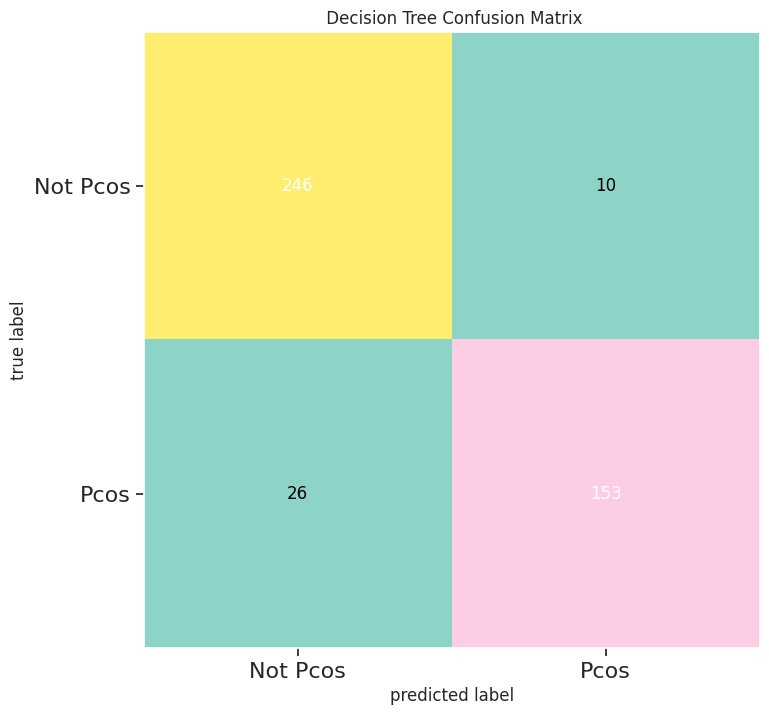

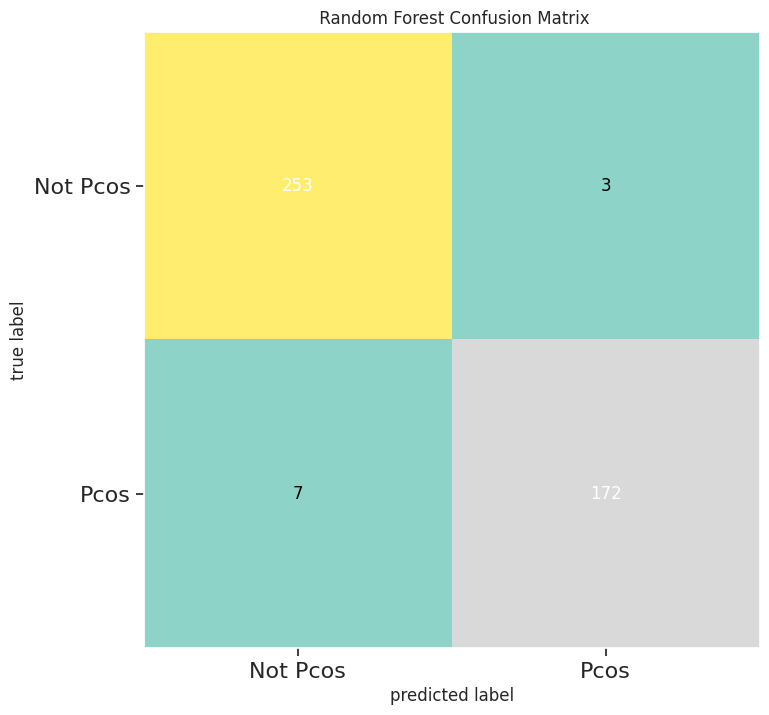

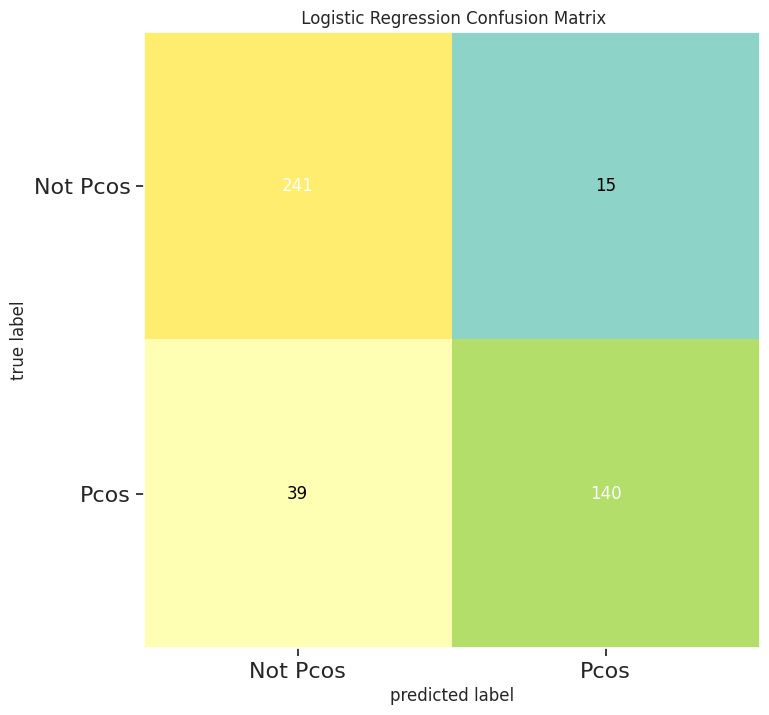

IndexError: list index out of range

In [94]:
from mlxtend.plotting import plot_confusion_matrix
model=[rfc,clf,logreg]
predictions = []
for i in model:
    predictions.append(i.predict(X_scaled))
for j in range(7):
    cm = confusion_matrix(y_new, predictions[j])
    plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Set3)
    plt.title(" {} Confusion Matrix".format(model_list[j]))
    plt.xticks(range(2), ["Not Pcos","Pcos"], fontsize=16)
    plt.yticks(range(2), ["Not Pcos","Pcos"], fontsize=16)
    plt.show()

In [98]:
###### this combination has accuracy of 100% while stacking dt, rf and lg class##### using 36 columns out of 50
rfc = RandomForestClassifier(n_jobs=-1,n_estimators=150,max_features='sqrt',min_samples_leaf=12)
clf = DecisionTreeClassifier(criterion="gini",max_depth=10,random_state=2)
logreg = LogisticRegression()
l = [('rf',rfc), ('clf', clf),('lgr',logreg)]
from sklearn.ensemble import StackingClassifier
stack_model = StackingClassifier( estimators = l)
score = cross_val_score(stack_model,X_scaled,y_new,cv = 6,scoring = scor[i])
print('score for %s is' % scor[i])
print(score)

score for recall is
[0.96666667 0.63333333 0.76666667 0.86206897 0.96666667 0.93333333]


In [116]:
list(data.columns)
len(list(data.columns))

42